In [1]:
import mst as mst
import mst_fair_greedy as fairMST
import mst_fair_optimal as fairMSTOpt
import numpy as np
from mbi import FactoredInference, Dataset, Domain
import scipy
import scipy.stats as stats
from disjoint_set import DisjointSet
import networkx as nx
import itertools
from cdp2adp import cdp_rho
from scipy.special import logsumexp
import argparse
import heapq
import seaborn as sns
import matplotlib.ticker as mtick
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import pandas as pd
import copy
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
dataset = "data/cleaned_Compas.csv"
domain = "data/cleanded_Compas-domain.json"
admissible = ['Misdemeanor','Number_of_Priors']
protected = ['Sex','Race']
outcome = ['Two_yr_Recidivism']
max_cells = 10000
#admissible = ['age','workclass','fnlwgt','education-num','marital-status','occupation','relationship','capital-gain','capital-loss','hours-per-week']
original_dataset = data = Dataset.load(dataset, domain)

In [137]:
def normalize(vec):
    normalized_vec = vec / sum(vec)
    #normalized_vec = vec / np.sqrt(np.sum(vec**2))
    return normalized_vec
def div(varlist,const):
    newList = [x / const for x in varlist]
    return newList

# Utility Metrics

## 1 Way Marginal Total Variation Distance

### $\epsilon$ = 0.1

In [3]:
workload = list(itertools.combinations(data.domain, 1))
workload = [cl for cl in workload if data.domain.size(cl) <= max_cells]


fair_greedy_mst_1_way_var_distance_01 = []
mst_1_way_var_distance_01 = []
fair_opt_mst_1_way_var_distance_01= []
privbayes_1_way_var_distance_01 = []
fair_privbayes_1_way_var_distance_01 = []
for i in range(10):
    
    fair_greedy_mst_data = Dataset.load(f'data/fair_greedy/Compas/eps=0.1/results_greedy_{i}.csv', domain)
    fair_opt_mst_data = Dataset.load(f'data/fair_opt/Compas/eps=0.1/results_opt_{i}.csv', domain)
    mst_data = Dataset.load(f'data/original/Compas/eps=0.1/results_original_{i}.csv', domain)
    privbayes_data = Dataset.load(f'data/Bayes_original/Compas/eps=0.1/sythetic_data_{i}.csv', domain)
    fair_privbayes_data = Dataset.load(f'data/Bayes_fair/Compas/eps=0.1/sythetic_data_{i}.csv', domain)
    
    fair_greedy_mst_variation =0 
    fair_opt_mst_variation= 0
    mst_variation = 0
    privbayes_variation =0 
    fair_privbayes_variation = 0
    
    for proj in workload:
        data_vec = data.project(proj).datavector()
        fair_greedy_mst_vec = fair_greedy_mst_data.project(proj).datavector()
        fair_opt_mst_vec = fair_opt_mst_data.project(proj).datavector()
        mst_vec = mst_data.project(proj).datavector()
        privbayes_vec = privbayes_data.project(proj).datavector()
        fair_privbayes_vec = fair_privbayes_data.project(proj).datavector()
        
        fair_greedy_mst_variation += sum(abs(data_vec - fair_greedy_mst_vec)/2)
        fair_opt_mst_variation += sum(abs(data_vec - fair_opt_mst_vec)/2)
        mst_variation += sum(abs(data_vec - mst_vec)/2)
        privbayes_variation += sum(abs(data_vec - privbayes_vec)/2)
        fair_privbayes_variation += sum(abs(data_vec - fair_privbayes_vec)/2)
        
    fair_greedy_mst_1_way_var_distance_01.append(fair_greedy_mst_variation)
    fair_opt_mst_1_way_var_distance_01.append(fair_opt_mst_variation)
    mst_1_way_var_distance_01.append(mst_variation)
    privbayes_1_way_var_distance_01.append(privbayes_variation)
    fair_privbayes_1_way_var_distance_01.append(fair_privbayes_variation)
    
print("Average Total Variation Distance over 10 Runs Fair_Greedy_MST : " + str(np.mean(fair_greedy_mst_1_way_var_distance_01)))
print("Average Total Variation Distance over 10 Runs Fair_opt_MST : " + str(np.mean(fair_opt_mst_1_way_var_distance_01)))
print("Average Total Variation Distance over 10 Runs MST : " + str(np.mean(mst_1_way_var_distance_01)))
print("Average Total Variation Distance over 10 Runs PrivBayes : " + str(np.mean(privbayes_1_way_var_distance_01)))
print("Average Total Variation Distance over 10 Runs FairPrivBayes : " + str(np.mean(fair_privbayes_1_way_var_distance_01)))


Average Total Variation Distance over 10 Runs Fair_Greedy_MST : 2738.8
Average Total Variation Distance over 10 Runs Fair_opt_MST : 2972.3
Average Total Variation Distance over 10 Runs MST : 3142.4
Average Total Variation Distance over 10 Runs PrivBayes : 5665.3
Average Total Variation Distance over 10 Runs FairPrivBayes : 5656.4


### $\epsilon$ = 1

In [138]:
workload = list(itertools.combinations(data.domain, 1))
workload = [cl for cl in workload if data.domain.size(cl) <= max_cells]
data = Dataset.load(dataset, domain)

fair_greedy_mst_1_way_var_distance_1 = []
mst_1_way_var_distance_1 = []
fair_opt_mst_1_way_var_distance_1= []
privbayes_1_way_var_distance_1 = []
fair_privbayes_1_way_var_distance_1 = []
for i in range(10):
    
    fair_greedy_mst_data = Dataset.load(f'data/fair_greedy/Compas/eps=1/results_greedy_{i}.csv', domain)
    fair_opt_mst_data = Dataset.load(f'data/fair_opt/Compas/eps=1/results_opt_{i}.csv', domain)
    mst_data = Dataset.load(f'data/original/Compas/eps=1/results_original_{i}.csv', domain)
    privbayes_data = Dataset.load(f'data/Bayes_original/Compas/eps=1/sythetic_data_{i}.csv', domain)
    fair_privbayes_data = Dataset.load(f'data/Bayes_fair/Compas/eps=1/sythetic_data_{i}.csv', domain)
    
    fair_greedy_mst_variation =0 
    fair_opt_mst_variation = 0
    mst_variation = 0
    privbayes_variation =0 
    fair_privbayes_variation = 0
    
    for proj in workload:
        data_vec = data.project(proj).datavector()
        fair_greedy_mst_vec = fair_greedy_mst_data.project(proj).datavector()
        fair_opt_mst_vec = fair_opt_mst_data.project(proj).datavector()
        mst_vec = mst_data.project(proj).datavector()
        privbayes_vec = privbayes_data.project(proj).datavector()
        fair_privbayes_vec = fair_privbayes_data.project(proj).datavector()
        
        data_vec = normalize(data_vec)
        fair_greedy_mst_vec = normalize(fair_greedy_mst_vec)
        fair_opt_mst_vec = normalize(fair_opt_mst_vec)
        mst_vec = normalize(mst_vec)
        privbayes_vec = normalize(privbayes_vec)
        fair_privbayes_vec = normalize(fair_privbayes_vec)
        
        fair_greedy_mst_variation += sum(abs(data_vec - fair_greedy_mst_vec)/2)
        fair_opt_mst_variation += sum(abs(data_vec - fair_opt_mst_vec)/2)
        mst_variation += sum(abs(data_vec - mst_vec)/2)
        privbayes_variation += sum(abs(data_vec - privbayes_vec)/2)
        fair_privbayes_variation += sum(abs(data_vec - fair_privbayes_vec)/2)
    
    fair_greedy_mst_variation = fair_greedy_mst_variation/len(workload)
    fair_opt_mst_variation = fair_opt_mst_variation/len(workload)
    mst_variation = mst_variation/len(workload)
    privbayes_variation = privbayes_variation/len(workload)
    fair_privbayes_variation = fair_privbayes_variation/len(workload)
    
    fair_greedy_mst_1_way_var_distance_1.append(fair_greedy_mst_variation)
    fair_opt_mst_1_way_var_distance_1.append(fair_opt_mst_variation)
    mst_1_way_var_distance_1.append(mst_variation)
    privbayes_1_way_var_distance_1.append(privbayes_variation)
    fair_privbayes_1_way_var_distance_1.append(fair_privbayes_variation)
    
    

print("Average Total Variation Distance over 10 Runs Fair_Greedy_MST : " + str(np.mean(fair_greedy_mst_1_way_var_distance_1)))
print("Average Total Variation Distance over 10 Runs Fair_Opt_MST : " + str(np.mean(fair_opt_mst_1_way_var_distance_1)))
print("Average Total Variation Distance over 10 Runs MST : " + str(np.mean(mst_1_way_var_distance_1)))
print("Average Total Variation Distance over 10 Runs PrivBayes : " + str(np.mean(privbayes_1_way_var_distance_01)))
print("Average Total Variation Distance over 10 Runs FairPrivBayes : " + str(np.mean(fair_privbayes_1_way_var_distance_01)))


Average Total Variation Distance over 10 Runs Fair_Greedy_MST : 0.007992145249595252
Average Total Variation Distance over 10 Runs Fair_Opt_MST : 0.008951699178274434
Average Total Variation Distance over 10 Runs MST : 0.008278920816979679
Average Total Variation Distance over 10 Runs PrivBayes : 5665.3
Average Total Variation Distance over 10 Runs FairPrivBayes : 5656.4


In [140]:
print(np.mean(fair_greedy_mst_1_way_var_distance_1)/np.mean(mst_1_way_var_distance_1))

0.9653607548949781


### $\epsilon$ = 10

In [5]:
workload = list(itertools.combinations(data.domain, 1))
workload = [cl for cl in workload if data.domain.size(cl) <= max_cells]


fair_greedy_mst_1_way_var_distance_10 = []
mst_1_way_var_distance_10 = []
fair_opt_mst_1_way_var_distance_10= []
privbayes_1_way_var_distance_10 = []
fair_privbayes_1_way_var_distance_10 = []
for i in range(10):
    
    fair_greedy_mst_data = Dataset.load(f'data/fair_greedy/Compas/eps=10/results_greedy_{i}.csv', domain)
    fair_opt_mst_data = Dataset.load(f'data/fair_opt/Compas/eps=10/results_opt_{i}.csv', domain)
    mst_data = Dataset.load(f'data/original/Compas/eps=10/results_original_{i}.csv', domain)
    privbayes_data = Dataset.load(f'data/Bayes_original/Compas/eps=10/sythetic_data_{i}.csv', domain)
    fair_privbayes_data = Dataset.load(f'data/Bayes_fair/Compas/eps=10/sythetic_data_{i}.csv', domain)
    
    fair_greedy_mst_variation =0
    fair_opt_mst_variation = 0
    mst_variation = 0
    privbayes_variation =0 
    fair_privbayes_variation = 0
    
    for proj in workload:
        data_vec = data.project(proj).datavector()
        fair_greedy_mst_vec = fair_greedy_mst_data.project(proj).datavector()
        fair_opt_mst_vec = fair_opt_mst_data.project(proj).datavector()
        mst_vec = mst_data.project(proj).datavector()
        privbayes_vec = privbayes_data.project(proj).datavector()
        fair_privbayes_vec = fair_privbayes_data.project(proj).datavector()
        
        fair_greedy_mst_variation += sum(abs(data_vec - fair_greedy_mst_vec)/2)
        fair_opt_mst_variation += sum(abs(data_vec - fair_opt_mst_vec)/2)
        mst_variation += sum(abs(data_vec - mst_vec)/2)
        privbayes_variation += sum(abs(data_vec - privbayes_vec)/2)
        fair_privbayes_variation += sum(abs(data_vec - fair_privbayes_vec)/2)
        
    fair_greedy_mst_1_way_var_distance_10.append(fair_greedy_mst_variation)
    fair_opt_mst_1_way_var_distance_10.append(fair_opt_mst_variation)
    mst_1_way_var_distance_10.append(mst_variation)
    privbayes_1_way_var_distance_10.append(privbayes_variation)
    fair_privbayes_1_way_var_distance_10.append(fair_privbayes_variation)
    
    

print("Average Total Variation Distance over 10 Runs Fair_Greedy_MST : " + str(np.mean(fair_greedy_mst_1_way_var_distance_10)))
print("Average Total Variation Distance over 10 Runs Fair_opt_MST : " + str(np.mean(fair_opt_mst_1_way_var_distance_10)))
print("Average Total Variation Distance over 10 Runs MST : " + str(np.mean(mst_1_way_var_distance_10)))
print("Average Total Variation Distance over 10 Runs PrivBayes : " + str(np.mean(privbayes_1_way_var_distance_01)))
print("Average Total Variation Distance over 10 Runs FairPrivBayes : " + str(np.mean(fair_privbayes_1_way_var_distance_01)))


Average Total Variation Distance over 10 Runs Fair_Greedy_MST : 62.0
Average Total Variation Distance over 10 Runs Fair_opt_MST : 57.9
Average Total Variation Distance over 10 Runs MST : 58.8
Average Total Variation Distance over 10 Runs PrivBayes : 5665.3
Average Total Variation Distance over 10 Runs FairPrivBayes : 5656.4


## 2 Way Marginal Total Variation Distance

### $\epsilon$ = 0.1

In [6]:
workload = list(itertools.combinations(data.domain, 2))
workload = [cl for cl in workload if data.domain.size(cl) <= max_cells]


fair_greedy_mst_2_way_var_distance_01 = []
mst_2_way_var_distance_01 = []
fair_opt_mst_2_way_var_distance_01= []
privbayes_2_way_var_distance_01 = []
fair_privbayes_2_way_var_distance_01 = []
for i in range(10):
    
    fair_greedy_mst_data = Dataset.load(f'data/fair_greedy/Compas/eps=0.1/results_greedy_{i}.csv', domain)
    fair_opt_mst_data = Dataset.load(f'data/fair_opt/Compas/eps=0.1/results_opt_{i}.csv', domain)
    mst_data = Dataset.load(f'data/original/Compas/eps=0.1/results_original_{i}.csv', domain)
    privbayes_data = Dataset.load(f'data/Bayes_original/Compas/eps=0.1/sythetic_data_{i}.csv', domain)
    fair_privbayes_data = Dataset.load(f'data/Bayes_fair/Compas/eps=0.1/sythetic_data_{i}.csv', domain)
    
    fair_greedy_mst_variation =0 
    fair_opt_mst_variation =0 
    mst_variation = 0
    privbayes_variation =0 
    fair_privbayes_variation = 0
    
    for proj in workload:
        data_vec = data.project(proj).datavector()
        fair_greedy_mst_vec = fair_greedy_mst_data.project(proj).datavector()
        fair_opt_mst_vec = fair_opt_mst_data.project(proj).datavector()
        mst_vec = mst_data.project(proj).datavector()
        privbayes_vec = privbayes_data.project(proj).datavector()
        fair_privbayes_vec = fair_privbayes_data.project(proj).datavector()
        
        fair_greedy_mst_variation += sum(abs(data_vec - fair_greedy_mst_vec)/2)
        fair_opt_mst_variation += sum(abs(data_vec - fair_opt_mst_vec)/2)
        mst_variation += sum(abs(data_vec - mst_vec)/2)
        privbayes_variation += sum(abs(data_vec - privbayes_vec)/2)
        fair_privbayes_variation += sum(abs(data_vec - fair_privbayes_vec)/2)
        
    fair_greedy_mst_2_way_var_distance_01.append(fair_greedy_mst_variation)
    fair_opt_mst_2_way_var_distance_01.append(fair_opt_mst_variation)
    mst_2_way_var_distance_01.append(mst_variation)
    privbayes_2_way_var_distance_01.append(privbayes_variation)
    fair_privbayes_2_way_var_distance_01.append(fair_privbayes_variation)
    
    

print("Average 2-way Total Variation Distance over 10 Runs Fair_Greedy_MST : " + str(np.mean(fair_greedy_mst_2_way_var_distance_01)))
print("Average 2-way Total Variation Distance over 10 Runs Fair_opt_MST : " + str(np.mean(fair_opt_mst_2_way_var_distance_01)))
print("Average 2-way  Total Variation Distance over 10 Runs MST : " + str(np.mean(mst_2_way_var_distance_01)))
print("Average 2-way Total Variation Distance over 10 Runs PrivBayes : " + str(np.mean(privbayes_2_way_var_distance_01)))
print("Average 2-way Total Variation Distance over 10 Runs FairPrivBayes : " + str(np.mean(fair_privbayes_2_way_var_distance_01)))


Average 2-way Total Variation Distance over 10 Runs Fair_Greedy_MST : 21188.5
Average 2-way Total Variation Distance over 10 Runs Fair_opt_MST : 22311.0
Average 2-way  Total Variation Distance over 10 Runs MST : 22972.5
Average 2-way Total Variation Distance over 10 Runs PrivBayes : 34125.2
Average 2-way Total Variation Distance over 10 Runs FairPrivBayes : 33387.0


### $\epsilon$ = 1

In [143]:
workload = list(itertools.combinations(data.domain, 2))
workload = [cl for cl in workload if data.domain.size(cl) <= max_cells]
data = Dataset.load(dataset, domain)

fair_greedy_mst_2_way_var_distance_1 = []
mst_2_way_var_distance_1 = []
fair_opt_mst_2_way_var_distance_1= []
privbayes_2_way_var_distance_1 = []
fair_privbayes_2_way_var_distance_1 = []
for i in range(10):
    
    
    fair_greedy_mst_data = Dataset.load(f'data/fair_greedy/Compas/eps=1/results_greedy_{i}.csv', domain)
    fair_opt_mst_data = Dataset.load(f'data/fair_opt/Compas/eps=1/results_opt_{i}.csv', domain)
    mst_data = Dataset.load(f'data/original/Compas/eps=1/results_original_{i}.csv', domain)
    privbayes_data = Dataset.load(f'data/Bayes_original/Compas/eps=1/sythetic_data_{i}.csv', domain)
    fair_privbayes_data = Dataset.load(f'data/Bayes_fair/Compas/eps=1/sythetic_data_{i}.csv', domain)
    
    fair_greedy_mst_variation =0
    fair_opt_mst_variation = 0
    mst_variation = 0
    privbayes_variation =0 
    fair_privbayes_variation = 0
    
    for proj in workload:
        data_vec = data.project(proj).datavector()
        fair_greedy_mst_vec = fair_greedy_mst_data.project(proj).datavector()
        fair_opt_mst_vec = fair_opt_mst_data.project(proj).datavector()
        mst_vec = mst_data.project(proj).datavector()
        privbayes_vec = privbayes_data.project(proj).datavector()
        fair_privbayes_vec = fair_privbayes_data.project(proj).datavector()
        
        data_vec = normalize(data_vec)
        fair_greedy_mst_vec = normalize(fair_greedy_mst_vec)
        fair_opt_mst_vec = normalize(fair_opt_mst_vec)
        mst_vec = normalize(mst_vec)
        privbayes_vec = normalize(privbayes_vec)
        fair_privbayes_vec = normalize(fair_privbayes_vec)
        
        fair_greedy_mst_variation += sum(abs(data_vec - fair_greedy_mst_vec)/2)
        fair_opt_mst_variation += sum(abs(data_vec - fair_opt_mst_vec)/2)
        mst_variation += sum(abs(data_vec - mst_vec)/2)
        privbayes_variation += sum(abs(data_vec - privbayes_vec)/2)
        fair_privbayes_variation += sum(abs(data_vec - fair_privbayes_vec)/2)
    
    fair_greedy_mst_variation = fair_greedy_mst_variation/len(workload)
    fair_opt_mst_variation = fair_opt_mst_variation/len(workload)
    mst_variation = mst_variation/len(workload)
    privbayes_variation = privbayes_variation/len(workload)
    fair_privbayes_variation = fair_privbayes_variation/len(workload)
    
    fair_greedy_mst_2_way_var_distance_1.append(fair_greedy_mst_variation)
    fair_opt_mst_2_way_var_distance_1.append(fair_opt_mst_variation)
    mst_2_way_var_distance_1.append(mst_variation)
    privbayes_2_way_var_distance_1.append(privbayes_variation)
    fair_privbayes_2_way_var_distance_1.append(fair_privbayes_variation)
    
    

print("Average 2-way  Total Variation Distance over 10 Runs Fair_Greedy_MST : " + str(np.mean(fair_greedy_mst_2_way_var_distance_1)))
print("Average 2-way  Total Variation Distance over 10 Runs Fair_Opt_MST : " + str(np.mean(fair_opt_mst_2_way_var_distance_1)))
print("Average 2-way Total Variation Distance over 10 Runs MST : " + str(np.mean(mst_2_way_var_distance_1)))
print("Average 2-way Total Variation Distance over 10 Runs PrivBayes : " + str(np.mean(privbayes_2_way_var_distance_01)))
print("Average 2-way Total Variation Distance over 10 Runs FairPrivBayes : " + str(np.mean(fair_privbayes_2_way_var_distance_01)))


Average 2-way  Total Variation Distance over 10 Runs Fair_Greedy_MST : 0.03934202080311315
Average 2-way  Total Variation Distance over 10 Runs Fair_Opt_MST : 0.052960230953363815
Average 2-way Total Variation Distance over 10 Runs MST : 0.03283765661936512
Average 2-way Total Variation Distance over 10 Runs PrivBayes : 34125.2
Average 2-way Total Variation Distance over 10 Runs FairPrivBayes : 33387.0


In [144]:
print(np.mean(fair_greedy_mst_2_way_var_distance_1)/np.mean(mst_2_way_var_distance_1))

1.1980763810019335


### $\epsilon$ = 10

In [8]:
workload = list(itertools.combinations(data.domain, 2))
workload = [cl for cl in workload if data.domain.size(cl) <= max_cells]


fair_greedy_mst_2_way_var_distance_10 = []
mst_2_way_var_distance_10 = []
fair_opt_mst_2_way_var_distance_10= []
privbayes_2_way_var_distance_10 = []
fair_privbayes_2_way_var_distance_10 = []
for i in range(10):
    
    fair_greedy_mst_data = Dataset.load(f'data/fair_greedy/Compas/eps=10/results_greedy_{i}.csv', domain)
    fair_opt_mst_data = Dataset.load(f'data/fair_opt/Compas/eps=10/results_opt_{i}.csv', domain)
    mst_data = Dataset.load(f'data/original/Compas/eps=10/results_original_{i}.csv', domain)
    privbayes_data = Dataset.load(f'data/Bayes_original/Compas/eps=10/sythetic_data_{i}.csv', domain)
    fair_privbayes_data = Dataset.load(f'data/Bayes_fair/Compas/eps=10/sythetic_data_{i}.csv', domain)
    
    fair_greedy_mst_variation =0 
    fair_opt_mst_variation = 0
    mst_variation = 0
    privbayes_variation =0 
    fair_privbayes_variation = 0
    
    for proj in workload:
        data_vec = data.project(proj).datavector()
        fair_greedy_mst_vec = fair_greedy_mst_data.project(proj).datavector()
        fair_opt_mst_vec = fair_opt_mst_data.project(proj).datavector()
        mst_vec = mst_data.project(proj).datavector()
        privbayes_vec = privbayes_data.project(proj).datavector()
        fair_privbayes_vec = fair_privbayes_data.project(proj).datavector()
        
        fair_greedy_mst_variation += sum(abs(data_vec - fair_greedy_mst_vec)/2)
        fair_opt_mst_variation += sum(abs(data_vec - fair_opt_mst_vec)/2)
        mst_variation += sum(abs(data_vec - mst_vec)/2)
        privbayes_variation += sum(abs(data_vec - privbayes_vec)/2)
        fair_privbayes_variation += sum(abs(data_vec - fair_privbayes_vec)/2)
        
    fair_greedy_mst_2_way_var_distance_10.append(fair_greedy_mst_variation)
    fair_opt_mst_2_way_var_distance_10.append(fair_opt_mst_variation)
    mst_2_way_var_distance_10.append(mst_variation)
    privbayes_2_way_var_distance_10.append(privbayes_variation)
    fair_privbayes_2_way_var_distance_10.append(fair_privbayes_variation)
    
    

print("Average 2-way  Total Variation Distance over 10 Runs Fair_Greedy_MST : " + str(np.mean(fair_greedy_mst_2_way_var_distance_10)))
print("Average 2-way  Total Variation Distance over 10 Runs Fair_opt_MST : " + str(np.mean(fair_opt_mst_2_way_var_distance_10)))
print("Average 2-way  Total Variation Distance over 10 Runs MST : " + str(np.mean(mst_2_way_var_distance_10)))
print("Average 2-way Total Variation Distance over 10 Runs PrivBayes : " + str(np.mean(privbayes_2_way_var_distance_01)))
print("Average 2-way Total Variation Distance over 10 Runs FairPrivBayes : " + str(np.mean(fair_privbayes_2_way_var_distance_01)))

Average 2-way  Total Variation Distance over 10 Runs Fair_Greedy_MST : 4910.9
Average 2-way  Total Variation Distance over 10 Runs Fair_opt_MST : 7105.0
Average 2-way  Total Variation Distance over 10 Runs MST : 3695.4
Average 2-way Total Variation Distance over 10 Runs PrivBayes : 34125.2
Average 2-way Total Variation Distance over 10 Runs FairPrivBayes : 33387.0


## Pairwise Cramer's V

In [9]:
def CramerV(dataframe):
    
    vals = dataframe.to_numpy()
    vals[vals == 0] = 1
    col = 2
    rows = min(vals.shape)
    chi2 = stats.chi2_contingency(vals, correction=False)[0]
    sample_size = np.sum(vals)
    k = col - (((col-1)**2)/(sample_size -1))
    r= rows - (((rows-1)**2)/(sample_size -1))

    phi2 = max(0,(chi2 / sample_size) - ((col-1)*(rows-1))/(sample_size -1) )
    cramer_v = np.sqrt(phi2/min(k-1,r-1) )

    return cramer_v

### $\epsilon$ = 0.1

In [10]:
workload = list(itertools.combinations(data.domain, 2))
workload = [cl for cl in workload if data.domain.size(cl) <= max_cells]


fair_greedy_mst_corr_distance_01 = []
mst_corr_distance_01  = []
fair_opt_mst_corr_distance_01 = []
privbayes_corr_distance_01  = []
fair_privbayes_corr_distance_01  = []
for i in range(10):
    
    fair_greedy_mst_data = Dataset.load(f'data/fair_greedy/Compas/eps=0.1/results_greedy_{i}.csv', domain)
    fair_opt_mst_data = Dataset.load(f'data/fair_opt/Compas/eps=0.1/results_opt_{i}.csv', domain)
    mst_data = Dataset.load(f'data/original/Compas/eps=0.1/results_original_{i}.csv', domain)
    privbayes_data = Dataset.load(f'data/Bayes_original/Compas/eps=0.1/sythetic_data_{i}.csv', domain)
    fair_privbayes_data = Dataset.load(f'data/Bayes_fair/Compas/eps=0.1/sythetic_data_{i}.csv', domain)
    
    fair_greedy_mst_distance =0 
    fair_opt_mst_distance =0 
    mst_distance = 0
    privbayes_distance =0 
    fair_privbayes_distance = 0
    
    for proj in workload:
        data_vec = data.project(proj).df
        data_vec = CramerV(data_vec)
        
        fair_greedy_mst_vec = fair_greedy_mst_data.project(proj).df
        fair_greedy_mst_vec= CramerV(fair_greedy_mst_vec)
        
        fair_opt_mst_vec = fair_opt_mst_data.project(proj).df
        fair_opt_mst_vec= CramerV(fair_opt_mst_vec)
        
        mst_vec = mst_data.project(proj).df
        mst_vec= CramerV(mst_vec)
        
        privbayes_vec = privbayes_data.project(proj).df
        privbayes_vec= CramerV(privbayes_vec)
        
        fair_privbayes_vec = fair_privbayes_data.project(proj).df
        fair_privbayes_vec = CramerV(fair_privbayes_vec)
        
        fair_greedy_mst_distance += abs(data_vec-fair_greedy_mst_vec)/2
        fair_opt_mst_distance += abs(data_vec-fair_opt_mst_vec)/2
        mst_distance += abs(data_vec-mst_vec)/2
        privbayes_distance += abs(data_vec-privbayes_vec)/2
        #print(abs(data_vec-privbayes_vec)/2)
        fair_privbayes_distance += abs(data_vec - fair_privbayes_vec)/2
        
        
    fair_greedy_mst_corr_distance_01.append(fair_greedy_mst_distance)
    fair_opt_mst_corr_distance_01.append(fair_opt_mst_distance)
    mst_corr_distance_01.append(mst_distance)
    privbayes_corr_distance_01.append(privbayes_distance)
    fair_privbayes_corr_distance_01.append(fair_privbayes_distance)
    
    

print("Average Total Variation Distance over 10 Runs Fair_Greedy_MST : " + str(np.mean(fair_greedy_mst_corr_distance_01)))
print("Average Total Variation Distance over 10 Runs Fair_opt_MST : " + str(np.mean(fair_opt_mst_corr_distance_01)))
print("Average Total Variation Distance over 10 Runs MST : " + str(np.mean(mst_corr_distance_01)))
print("Average Total Variation Distance over 10 Runs PrivBayes : " + str(np.mean(privbayes_corr_distance_01)))
print("Average Total Variation Distance over 10 Runs FairPrivBayes : " + str(np.mean(fair_privbayes_corr_distance_01)))


Average Total Variation Distance over 10 Runs Fair_Greedy_MST : 0.2686907237935686
Average Total Variation Distance over 10 Runs Fair_opt_MST : 0.243824121079698
Average Total Variation Distance over 10 Runs MST : 0.18369013553179217
Average Total Variation Distance over 10 Runs PrivBayes : 0.14683233652070854
Average Total Variation Distance over 10 Runs FairPrivBayes : 0.1994083031810421


### $\epsilon$ = 1

In [11]:
workload = list(itertools.combinations(data.domain, 2))
workload = [cl for cl in workload if data.domain.size(cl) <= max_cells]


fair_greedy_mst_corr_distance_1 = []
mst_corr_distance_1  = []
fair_opt_mst_corr_distance_1 = []
privbayes_corr_distance_1  = []
fair_privbayes_corr_distance_1  = []
for i in range(10):
    
    fair_greedy_mst_data = Dataset.load(f'data/fair_greedy/Compas/eps=1/results_greedy_{i}.csv', domain)
    fair_opt_mst_data = Dataset.load(f'data/fair_opt/Compas/eps=1/results_opt_{i}.csv', domain)
    mst_data = Dataset.load(f'data/original/Compas/eps=1/results_original_{i}.csv', domain)
    privbayes_data = Dataset.load(f'data/Bayes_original/Compas/eps=1/sythetic_data_{i}.csv', domain)
    fair_privbayes_data = Dataset.load(f'data/Bayes_fair/Compas/eps=1/sythetic_data_{i}.csv', domain)
    
    fair_greedy_mst_distance =0 
    fair_opt_mst_distance = 0
    mst_distance = 0
    privbayes_distance =0 
    fair_privbayes_distance = 0
    
    for proj in workload:
        data_vec = data.project(proj).df
        data_vec = CramerV(data_vec)
        
        fair_greedy_mst_vec = fair_greedy_mst_data.project(proj).df
        fair_greedy_mst_vec= CramerV(fair_greedy_mst_vec)
        
        fair_opt_mst_vec = fair_opt_mst_data.project(proj).df
        fair_opt_mst_vec = CramerV(fair_opt_mst_vec)
        
        mst_vec = mst_data.project(proj).df
        mst_vec= CramerV(mst_vec)
        
        privbayes_vec = privbayes_data.project(proj).df
        privbayes_vec = CramerV(privbayes_vec)
        
        fair_privbayes_vec = fair_privbayes_data.project(proj).df
        fair_privbayes_vec = CramerV(fair_privbayes_vec)
        
        fair_greedy_mst_distance += abs(data_vec-fair_greedy_mst_vec)/2
        fair_opt_mst_distance += abs(data_vec - fair_opt_mst_vec)/2
        mst_distance += abs(data_vec-mst_vec)/2
        privbayes_distance += abs(data_vec - privbayes_vec)/2
        fair_privbayes_distance += abs(data_vec - fair_privbayes_vec)/2
        
        
    fair_greedy_mst_corr_distance_1.append(fair_greedy_mst_distance)
    fair_opt_mst_corr_distance_1.append(fair_opt_mst_distance)
    mst_corr_distance_1.append(mst_distance)
    privbayes_corr_distance_1.append(privbayes_distance)
    fair_privbayes_corr_distance_1.append(fair_privbayes_distance)

    
print("Average Total Variation Distance over 10 Runs Fair_Greedy_MST : " + str(np.mean(fair_greedy_mst_corr_distance_1)))
print("Average Total Variation Distance over 10 Runs Fair_opt_MST : " + str(np.mean(fair_opt_mst_corr_distance_1)))
print("Average Total Variation Distance over 10 Runs MST : " + str(np.mean(mst_corr_distance_1)))
print("Average Total Variation Distance over 10 Runs PrivBayes : " + str(np.mean(privbayes_corr_distance_1)))
print("Average Total Variation Distance over 10 Runs FairPrivBayes : " + str(np.mean(fair_privbayes_corr_distance_1)))

Average Total Variation Distance over 10 Runs Fair_Greedy_MST : 0.09826048327494649
Average Total Variation Distance over 10 Runs Fair_opt_MST : 0.09529763659604554
Average Total Variation Distance over 10 Runs MST : 0.0879707062783833
Average Total Variation Distance over 10 Runs PrivBayes : 0.060194829981320266
Average Total Variation Distance over 10 Runs FairPrivBayes : 0.060551325033330106


In [145]:
print(np.mean(fair_greedy_mst_corr_distance_1)/np.mean(mst_corr_distance_1))

1.3166339782133032


### $\epsilon$ = 10

In [12]:
workload = list(itertools.combinations(data.domain, 2))
workload = [cl for cl in workload if data.domain.size(cl) <= max_cells]


fair_greedy_mst_corr_distance_10 = []
mst_corr_distance_10  = []
fair_opt_mst_corr_distance_10 = []
privbayes_corr_distance_10  = []
fair_privbayes_corr_distance_10  = []
for i in range(10):
    
    fair_greedy_mst_data = Dataset.load(f'data/fair_greedy/Compas/eps=10/results_greedy_{i}.csv', domain)
    fair_opt_mst_data = Dataset.load(f'data/fair_opt/Compas/eps=10/results_opt_{i}.csv', domain)
    mst_data = Dataset.load(f'data/original/Compas/eps=10/results_original_{i}.csv', domain)
    privbayes_data = Dataset.load(f'data/Bayes_original/Compas/eps=1/sythetic_data_{i}.csv', domain)
    fair_privbayes_data = Dataset.load(f'data/Bayes_fair/Compas/eps=1/sythetic_data_{i}.csv', domain)
    
    fair_greedy_mst_distance =0 
    fair_opt_mst_distance = 0
    mst_distance = 0
    privbayes_distance =0 
    fair_privbayes_distance = 0
    
    for proj in workload:
        data_vec = data.project(proj).df
        data_vec = CramerV(data_vec)
        
        fair_greedy_mst_vec = fair_greedy_mst_data.project(proj).df
        fair_greedy_mst_vec= CramerV(fair_greedy_mst_vec)
        
        fair_opt_mst_vec = fair_opt_mst_data.project(proj).df
        fair_opt_mst_vec = CramerV(fair_opt_mst_vec)
        
        mst_vec = mst_data.project(proj).df
        mst_vec= CramerV(mst_vec)
        
        privbayes_vec = privbayes_data.project(proj).df
        privbayes_vec = CramerV(privbayes_vec)
        
        fair_privbayes_vec = fair_privbayes_data.project(proj).df
        fair_privbayes_vec = CramerV(fair_privbayes_vec)
        
        fair_greedy_mst_distance += abs(data_vec-fair_greedy_mst_vec)/2
        fair_opt_mst_distance += abs(data_vec - fair_opt_mst_vec)/2
        mst_distance += abs(data_vec-mst_vec)/2
        privbayes_distance += abs(data_vec - privbayes_vec)/2
        fair_privbayes_distance += abs(data_vec - fair_privbayes_vec)/2
        
        
    fair_greedy_mst_corr_distance_10.append(fair_greedy_mst_distance)
    fair_opt_mst_corr_distance_10.append(fair_opt_mst_distance)
    mst_corr_distance_10.append(mst_distance)
    privbayes_corr_distance_10.append(privbayes_distance)
    fair_privbayes_corr_distance_10.append(fair_privbayes_distance)
    
    

print("Average Total Variation Distance over 10 Runs Fair_Greedy_MST : " + str(np.mean(fair_greedy_mst_corr_distance_10)))
print("Average Total Variation Distance over 10 Runs Fair_opt_MST : " + str(np.mean(fair_opt_mst_corr_distance_10)))
print("Average Total Variation Distance over 10 Runs MST : " + str(np.mean(mst_corr_distance_10)))
print("Average Total Variation Distance over 10 Runs PrivBayes : " + str(np.mean(privbayes_corr_distance_10)))
print("Average Total Variation Distance over 10 Runs FairPrivBayes : " + str(np.mean(fair_privbayes_corr_distance_10)))

Average Total Variation Distance over 10 Runs Fair_Greedy_MST : 0.0060551073652124286
Average Total Variation Distance over 10 Runs Fair_opt_MST : 0.005752694893910146
Average Total Variation Distance over 10 Runs MST : 0.007165975828023019
Average Total Variation Distance over 10 Runs PrivBayes : 0.060194829981320266
Average Total Variation Distance over 10 Runs FairPrivBayes : 0.060551325033330106


## Visualizations

In [13]:
sns.set(font_scale=2)
sns.set_style("white")


artifactspath = "vis/Compas/"


## 1-Way Marginals

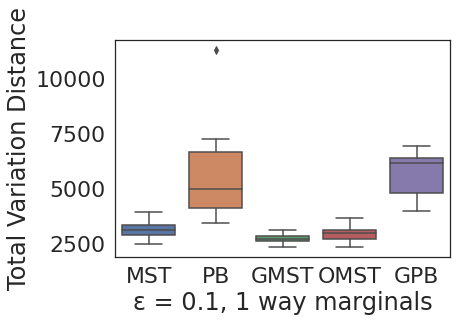

In [14]:

x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_1_way_var_distance_01,privbayes_1_way_var_distance_01,fair_greedy_mst_1_way_var_distance_01,fair_opt_mst_1_way_var_distance_01,fair_privbayes_1_way_var_distance_01]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, 1 way marginals")
plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + '1_way_01.pdf', bbox_inches='tight')


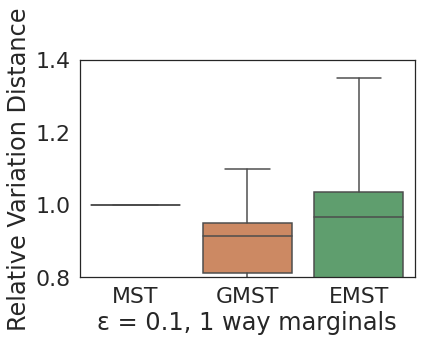

In [15]:

x=[0,1,2]
x_axis = ["MST", "GMST","EMST"]

for i in range(len(mst_1_way_var_distance_01)):
    fair_greedy_mst_1_way_var_distance_01[i]= fair_greedy_mst_1_way_var_distance_01[i]/mst_1_way_var_distance_01[i]
    fair_opt_mst_1_way_var_distance_01[i]= fair_opt_mst_1_way_var_distance_01[i]/mst_1_way_var_distance_01[i]
    mst_1_way_var_distance_01[i]= mst_1_way_var_distance_01[i]/mst_1_way_var_distance_01[i]
    
    
values = [mst_1_way_var_distance_01,fair_greedy_mst_1_way_var_distance_01,fair_opt_mst_1_way_var_distance_01]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)
ax.set_ylim([0.8, 1.4])

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, 1 way marginals")
plt.ylabel("Relative Variation Distance")
plt.savefig(artifactspath + '1_way_01_MST.pdf', bbox_inches='tight')


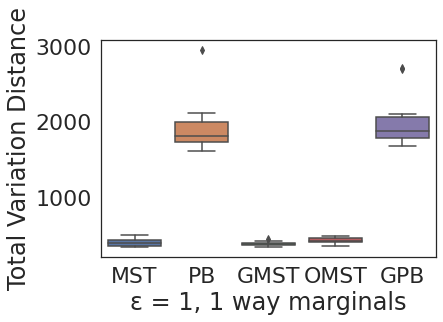

In [16]:

x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_1_way_var_distance_1,privbayes_1_way_var_distance_1,fair_greedy_mst_1_way_var_distance_1,fair_opt_mst_1_way_var_distance_1,fair_privbayes_1_way_var_distance_1]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, 1 way marginals")
plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + '1_way_1.pdf', bbox_inches='tight')


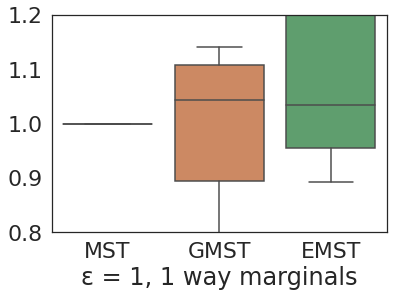

In [17]:

x=[0,1,2]
x_axis = ["MST", "GMST","EMST"]
values = [mst_1_way_var_distance_1,fair_greedy_mst_1_way_var_distance_1,fair_opt_mst_1_way_var_distance_1]

for i in range(len(mst_1_way_var_distance_1)):
    fair_greedy_mst_1_way_var_distance_1[i]= fair_greedy_mst_1_way_var_distance_1[i]/mst_1_way_var_distance_1[i]
    fair_opt_mst_1_way_var_distance_1[i]= fair_opt_mst_1_way_var_distance_1[i]/mst_1_way_var_distance_1[i]
    mst_1_way_var_distance_1[i]= mst_1_way_var_distance_1[i]/mst_1_way_var_distance_1[i]

#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)
ax.set_ylim([0.8, 1.2])

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, 1 way marginals")
#plt.ylabel("Relative Variation Distance")
plt.savefig(artifactspath + '1_way_1_MST.pdf', bbox_inches='tight')


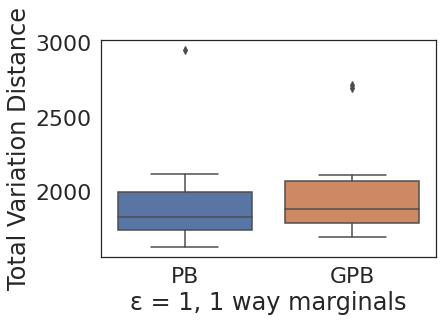

In [18]:

x=[0,1,]
x_axis = ["PB", "GPB"]
values = [privbayes_1_way_var_distance_1,fair_privbayes_1_way_var_distance_1]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, 1 way marginals")
plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + '1_way_1_PB.pdf', bbox_inches='tight')


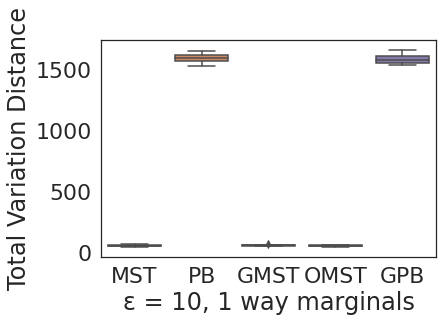

In [19]:

x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_1_way_var_distance_10,privbayes_1_way_var_distance_10,fair_greedy_mst_1_way_var_distance_10,fair_opt_mst_1_way_var_distance_10,fair_privbayes_1_way_var_distance_10]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, 1 way marginals")
plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + '1_way_10.pdf', bbox_inches='tight')


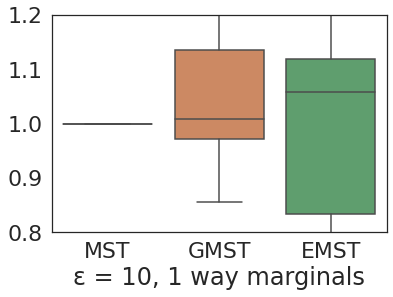

In [20]:

x=[0,1,2]
x_axis = ["MST", "GMST","EMST"]
values = [mst_1_way_var_distance_10,fair_greedy_mst_1_way_var_distance_10,fair_opt_mst_1_way_var_distance_10]


for i in range(len(mst_1_way_var_distance_10)):
    fair_greedy_mst_1_way_var_distance_10[i]= fair_greedy_mst_1_way_var_distance_10[i]/mst_1_way_var_distance_10[i]
    fair_opt_mst_1_way_var_distance_10[i]= fair_opt_mst_1_way_var_distance_10[i]/mst_1_way_var_distance_10[i]
    mst_1_way_var_distance_10[i]= mst_1_way_var_distance_10[i]/mst_1_way_var_distance_10[i]

#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)
ax.set_ylim([0.8, 1.2])

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, 1 way marginals")
#plt.ylabel("Relative Variation Distance")
plt.savefig(artifactspath + '1_way_10_MST.pdf', bbox_inches='tight')


## 2-way Marginals

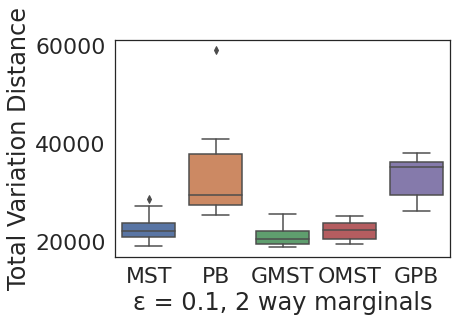

In [21]:

x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_2_way_var_distance_01,privbayes_2_way_var_distance_01,fair_greedy_mst_2_way_var_distance_01,fair_opt_mst_2_way_var_distance_01,fair_privbayes_2_way_var_distance_01]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, 2 way marginals")
plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + '2_way_01.pdf', bbox_inches='tight')


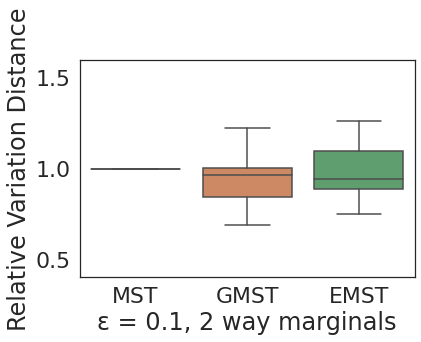

In [22]:

x=[0,1,2]
x_axis = ["MST","GMST","EMST"]
values = [mst_2_way_var_distance_01,fair_greedy_mst_2_way_var_distance_01,fair_opt_mst_2_way_var_distance_01]
for i in range(len(mst_2_way_var_distance_01)):
    fair_greedy_mst_2_way_var_distance_01[i]= fair_greedy_mst_2_way_var_distance_01[i]/mst_2_way_var_distance_01[i]
    fair_opt_mst_2_way_var_distance_01[i]= fair_opt_mst_2_way_var_distance_01[i]/mst_2_way_var_distance_01[i]
    mst_2_way_var_distance_01[i]= mst_2_way_var_distance_01[i]/mst_2_way_var_distance_01[i]

#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)
ax.set_ylim([0.4, 1.6])


plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, 2 way marginals")
plt.ylabel("Relative Variation Distance")
plt.savefig(artifactspath + '2_way_01_MST.pdf', bbox_inches='tight')


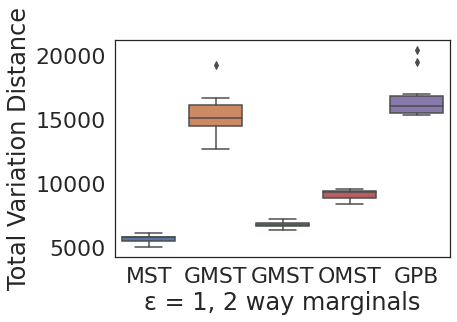

In [23]:

x=[0,1,2,3,4]
x_axis = ["MST","GMST", "GMST","OMST", "GPB"]
values = [mst_2_way_var_distance_1,privbayes_2_way_var_distance_1,fair_greedy_mst_2_way_var_distance_1,fair_opt_mst_2_way_var_distance_1,fair_privbayes_2_way_var_distance_1]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, 2 way marginals")
plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + '2_way_1.pdf', bbox_inches='tight')


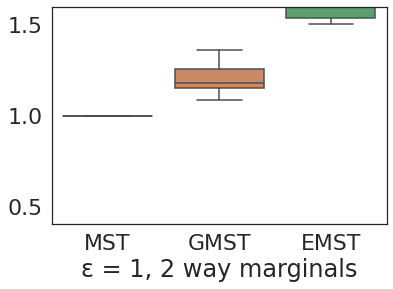

In [24]:

x=[0,1,2]
x_axis = ["MST","GMST","EMST"]
values = [mst_2_way_var_distance_1,fair_greedy_mst_2_way_var_distance_1,fair_opt_mst_2_way_var_distance_1]
for i in range(len(mst_2_way_var_distance_1)):
    fair_greedy_mst_2_way_var_distance_1[i]= fair_greedy_mst_2_way_var_distance_1[i]/mst_2_way_var_distance_1[i]
    fair_opt_mst_2_way_var_distance_1[i]= fair_opt_mst_2_way_var_distance_1[i]/mst_2_way_var_distance_1[i]
    mst_2_way_var_distance_1[i]= mst_2_way_var_distance_1[i]/mst_2_way_var_distance_1[i]

#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)
ax.set_ylim([0.4, 1.6])

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, 2 way marginals")
#plt.ylabel("Relative Variation Distance")
plt.savefig(artifactspath + '2_way_1_MST.pdf', bbox_inches='tight')


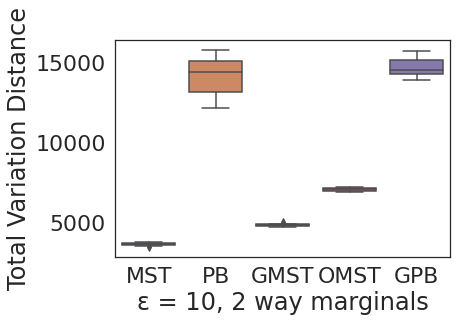

In [25]:

x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_2_way_var_distance_10,privbayes_2_way_var_distance_10,fair_greedy_mst_2_way_var_distance_10,fair_opt_mst_2_way_var_distance_10,fair_privbayes_2_way_var_distance_10]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, 2 way marginals")
plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + '2_way_10.pdf', bbox_inches='tight')


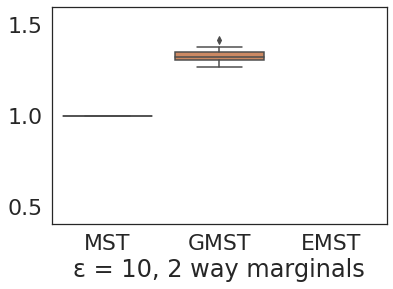

In [26]:

x=[0,1,2]
x_axis = ["MST","GMST","EMST"]
values = [mst_2_way_var_distance_10,fair_greedy_mst_2_way_var_distance_10,fair_opt_mst_2_way_var_distance_10]
for i in range(len(mst_2_way_var_distance_10)):
    fair_greedy_mst_2_way_var_distance_10[i]= fair_greedy_mst_2_way_var_distance_10[i]/mst_2_way_var_distance_10[i]
    fair_opt_mst_2_way_var_distance_10[i]= fair_opt_mst_2_way_var_distance_10[i]/mst_2_way_var_distance_10[i]
    mst_2_way_var_distance_10[i]= mst_2_way_var_distance_10[i]/mst_2_way_var_distance_10[i]

#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)
ax.set_ylim([0.4, 1.6])

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, 2 way marginals")
#plt.ylabel("Relative Variation Distance")
plt.savefig(artifactspath + '2_way_10_MST.pdf', bbox_inches='tight')


## Correlation Error

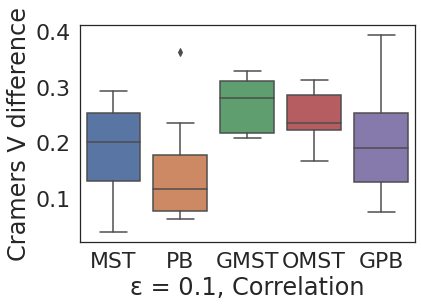

In [27]:
x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_corr_distance_01,privbayes_corr_distance_01,fair_greedy_mst_corr_distance_01,fair_opt_mst_corr_distance_01,fair_privbayes_corr_distance_01]



#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, Correlation")
plt.ylabel("Cramers V difference")
plt.savefig(artifactspath + 'corr_01.pdf', bbox_inches='tight')


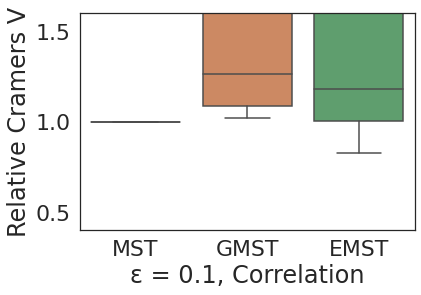

In [28]:
x=[0,1,2]
x_axis = ["MST", "GMST","EMST",]
values = [mst_corr_distance_01,fair_greedy_mst_corr_distance_01,fair_opt_mst_corr_distance_01]

for i in range(len(mst_corr_distance_01)):
    fair_greedy_mst_corr_distance_01[i]= fair_greedy_mst_corr_distance_01[i]/mst_corr_distance_01[i]
    fair_opt_mst_corr_distance_01[i]= fair_opt_mst_corr_distance_01[i]/mst_corr_distance_01[i]
    mst_corr_distance_01[i]= mst_corr_distance_01[i]/mst_corr_distance_01[i]

#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)
ax.set_ylim([0.4, 1.6])

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, Correlation")
plt.ylabel("Relative Cramers V")
plt.savefig(artifactspath + 'corr_01_MST.pdf', bbox_inches='tight')


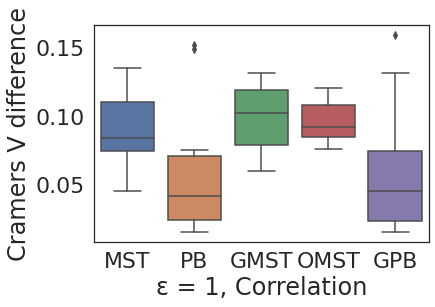

In [29]:
x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_corr_distance_1,privbayes_corr_distance_1,fair_greedy_mst_corr_distance_1,fair_opt_mst_corr_distance_1,fair_privbayes_corr_distance_1]

#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, Correlation")
plt.ylabel("Cramers V difference")
plt.savefig(artifactspath + 'corr_1.pdf', bbox_inches='tight')


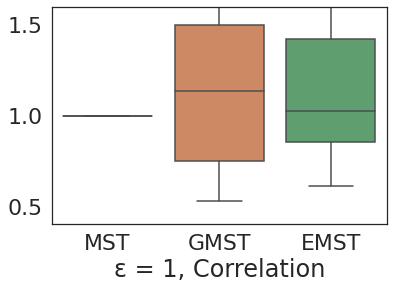

In [30]:
x=[0,1,2]
x_axis = ["MST", "GMST","EMST",]
values = [mst_corr_distance_1,fair_greedy_mst_corr_distance_1,fair_opt_mst_corr_distance_1]
for i in range(len(mst_corr_distance_1)):
    fair_greedy_mst_corr_distance_1[i]= fair_greedy_mst_corr_distance_1[i]/mst_corr_distance_1[i]
    fair_opt_mst_corr_distance_1[i]= fair_opt_mst_corr_distance_1[i]/mst_corr_distance_1[i]
    mst_corr_distance_1[i]= mst_corr_distance_1[i]/mst_corr_distance_1[i]
#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)
ax.set_ylim([0.4, 1.6])

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, Correlation")
#plt.ylabel("Relative Cramers V")
plt.savefig(artifactspath + 'corr_1_MST.pdf', bbox_inches='tight')


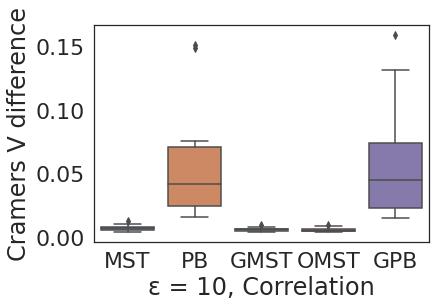

In [31]:
x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_corr_distance_10,privbayes_corr_distance_10,fair_greedy_mst_corr_distance_10,fair_opt_mst_corr_distance_10,fair_privbayes_corr_distance_10]

#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, Correlation")
plt.ylabel("Cramers V difference")
plt.savefig(artifactspath + 'corr_10.pdf', bbox_inches='tight')


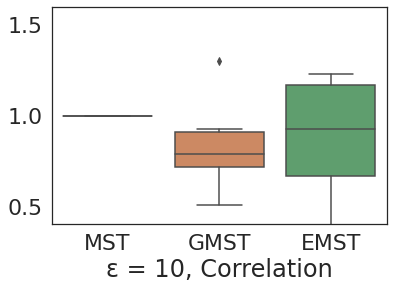

In [32]:
x=[0,1,2]
x_axis = ["MST", "GMST","EMST",]
values = [mst_corr_distance_10,fair_greedy_mst_corr_distance_10,fair_opt_mst_corr_distance_10]

for i in range(len(mst_corr_distance_10)):
    fair_greedy_mst_corr_distance_10[i]= fair_greedy_mst_corr_distance_10[i]/mst_corr_distance_10[i]
    fair_opt_mst_corr_distance_10[i]= fair_opt_mst_corr_distance_10[i]/mst_corr_distance_10[i]
    mst_corr_distance_10[i]= mst_corr_distance_10[i]/mst_corr_distance_10[i]
#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)
ax.set_ylim([0.4, 1.6])

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, Correlation")
#plt.ylabel("Relative Cramers V")
plt.savefig(artifactspath + 'corr_10_MST.pdf', bbox_inches='tight')


# Fairness Metrics 

In [33]:

SHUFFLE_BUFFER = 500
BATCH_SIZE = 50


In [34]:
def mlp_test(path):
    #eps = 0.1 MST
    accuracy_vals = []
    accuracy_parity_vals = []
    demographic_parity_vals = []
    TPRBalance_vals = []
    TNRBalance_vals =[]
    conditional_demographic_parity_vals = []
    conditional_TPRBalance_vals = []
    conditional_TNRBalance_vals =[]

    for i in range(10):
        # training models on greedy_fair_mst
        testpath = "data/cleaned_Compas.csv"
        test = pd.read_csv(testpath)
        test_sex0 = copy.copy(test).loc[test['Race'] == 0]
        test_sex1 = copy.copy(test).loc[test['Race'] == 1]
        test_lables = test.pop('Two_yr_Recidivism')
        test_sex0_lables = test_sex0.pop('Two_yr_Recidivism')
        test_sex1_lables = test_sex1.pop('Two_yr_Recidivism')
        #tf.convert_to_tensor(test)


        trainpath = f'{path}{i}.csv'
        train = pd.read_csv(trainpath)
        train_lables = train.pop('Two_yr_Recidivism')
        tf.convert_to_tensor(train)


        model = Sequential()
        model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
        model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
        model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
        model.add(Dense(5, activation='relu', kernel_initializer='he_normal'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        model.fit(train, train_lables, epochs=20, batch_size=BATCH_SIZE, verbose=0)
        #model.fit(train, train_lables, epochs=10, batch_size=BATCH_SIZE)

        predictions = model.predict(test)
        loss = model.evaluate(test, test_lables, verbose=0)
        accuracy = loss[1]
        accuracy_vals.append(accuracy)
        sex0_accuracy = model.evaluate(test_sex0, test_sex0_lables, verbose=0)[1]
        sex1_accuracy = model.evaluate(test_sex1, test_sex1_lables, verbose=0)[1]
        accuracy_parity_vals.append(abs(sex1_accuracy-sex0_accuracy))

        test['Recid'] = test_lables
        test['Predicted'] = predictions
        test = test.round({'Predicted': 0})
        test["Predicted"]=test["Predicted"].astype(int)

        sex1 = test.loc[test['Race'] == 1]
        sex0 = test.loc[test['Race'] == 0]
        sex1_count = len(sex1.index)
        sex0_count = len(sex0.index)
        demographic_parity = abs((sex1['Predicted'].sum()/sex1_count) -(sex0['Predicted'].sum()/sex0_count))
        demographic_parity_vals.append(demographic_parity)

        sex1TPR = len(sex1.loc[(sex1['Recid'] == 1) & (sex1['Predicted'] == 1)].index)/len(sex1.loc[(sex1['Recid'] == 1)].index)
        sex0TPR = len(sex0.loc[(sex0['Recid'] == 1) & (sex0['Predicted'] == 1)].index)/len(sex0.loc[(sex0['Recid'] == 1)].index) 
        TPRBalance = abs(sex1TPR - sex0TPR)
        TPRBalance_vals.append(TPRBalance)

        sex1TNR = len(sex1.loc[(sex1['Recid'] == 0) & (sex1['Predicted'] == 0)].index)/len(sex1.loc[(sex1['Recid'] == 0)].index)
        sex0TNR = len(sex0.loc[(sex0['Recid'] == 0) & (sex0['Predicted'] == 0)].index)/len(sex0.loc[(sex0['Recid'] == 0)].index) 
        TNRBalance = abs(sex1TNR - sex0TNR)
        TNRBalance_vals.append(TNRBalance)


        admis_group = test.groupby(admissible, sort = False)
        test['S0TP'] = (test['Predicted'] == 1) & (test['Recid'] == 1) & (test['Race'] == 0) 
        test['S0TN'] = (test['Predicted'] == 0) & (test['Recid'] == 0)  & (test['Race'] == 0) 
        test['S0Pos'] = (test['Recid'] == 1)  & (test['Race'] == 0) 
        test['S0Neg'] = (test['Recid'] == 0)  & (test['Race'] == 0) 
        test['S0pred_pos'] = (test['Predicted'] == 1) & (test['Race'] == 0) 
        test['S0count'] = (test['Race'] == 0)
        test['S1TP'] = (test['Predicted'] == 1) & (test['Recid'] == 1) & (test['Race'] == 1) 
        test['S1TN'] = (test['Predicted'] == 0) & (test['Recid'] == 0)  & (test['Race'] == 1) 
        test['S1Pos'] = (test['Recid'] == 1)  & (test['Race'] == 1) 
        test['S1Neg'] = (test['Recid'] == 0)  & (test['Race'] == 1) 
        test['S1pred_pos'] = (test['Predicted'] == 1) & (test['Race'] == 1) 
        test['S1count'] = (test['Race'] == 1)


        tp0 = admis_group['S0TP'].sum()
        pos0 = admis_group['S0Pos'].sum()
        tn0 = admis_group['S0TN'].sum()
        neg0 = admis_group['S0Neg'].sum()
        pred_pos0 = admis_group['S0pred_pos'].sum()
        counts0 = admis_group['S0count'].sum()

        sex0_group_tpr = (tp0/pos0)
        sex0_group_tpr = sex0_group_tpr.values
        sex0_group_tpr = sex0_group_tpr[~np.isnan(sex0_group_tpr)]

        sex0_group_tnr = (tn0/neg0)
        sex0_group_tnr =sex0_group_tnr.values
        sex0_group_tnr = sex0_group_tnr[~np.isnan(sex0_group_tnr)]

        sex0_group_dp = (pred_pos0/counts0)
        sex0_group_dp =sex0_group_dp.values
        sex0_group_dp = sex0_group_dp[~np.isnan(sex0_group_dp)]


        tp1 = admis_group['S1TP'].sum()
        pos1 = admis_group['S1Pos'].sum()
        tn1 = admis_group['S1TN'].sum()
        neg1 = admis_group['S1Neg'].sum()
        pred_pos1 = admis_group['S1pred_pos'].sum()
        counts1 = admis_group['S1count'].sum()

        sex1_group_tpr = (tp1/pos1)
        sex1_group_tpr = sex1_group_tpr.values
        sex1_group_tpr = sex1_group_tpr[~np.isnan(sex1_group_tpr)]

        sex1_group_tnr = (tn1/neg1)
        sex1_group_tnr =sex1_group_tnr.values
        sex1_group_tnr = sex1_group_tnr[~np.isnan(sex1_group_tnr)]

        sex1_group_dp = (pred_pos1/counts1)
        sex1_group_dp =sex1_group_dp.values
        sex1_group_dp = sex1_group_dp[~np.isnan(sex1_group_dp)]

        conditional_demographic_parity_vals.append(abs(np.mean(sex1_group_dp)-np.mean(sex0_group_dp)))
        conditional_TPRBalance_vals.append(abs(np.mean(sex1_group_tpr)-np.mean(sex0_group_tpr)))
        conditional_TNRBalance_vals.append(abs(np.mean(sex1_group_tnr)-np.mean(sex0_group_tnr)))


    print("Average Accuracy: " + str(np.mean(accuracy_vals)))
    print("Average Accuracy Parity: " + str(np.mean(accuracy_parity_vals)))
    print("Average Demographic Parity: " + str(np.mean(demographic_parity_vals)))
    print("Average TPR Balance: " + str(np.mean(TPRBalance_vals)))
    print("Average TNR Balance: " + str(np.mean(TNRBalance_vals)))

    print("Average Conditional Demographic Parity: " + str(np.mean(conditional_demographic_parity_vals)))
    print("Average Conditional TPR Balance: " + str(np.mean(conditional_TPRBalance_vals)))
    print("Average Conditional TNR Balance: " + str(np.mean(conditional_TNRBalance_vals)))
    
    return((accuracy_vals,accuracy_parity_vals,demographic_parity_vals,TPRBalance_vals,TNRBalance_vals,conditional_demographic_parity_vals,conditional_TPRBalance_vals,conditional_TNRBalance_vals))


In [35]:
#eps = 0.1 MST

path = 'data/original/Compas/eps=0.1/results_original_'
vals = mlp_test(path)
mst_accuracy_01 = vals[0]
mst_accuracy_parity_01 = vals[1]
mst_demographic_parity_01 = vals[2]
mst_TPRBalance_01 = vals[3]
mst_TNRBalance_01 =vals[4]
mst_conditional_demographic_parity_01 = vals[5]
mst_conditional_TPRBalance_01 = vals[6]
mst_conditional_TNRBalance_01 =vals[7]

#eps = 1 MST
path = 'data/original/Compas/eps=1/results_original_'
vals = mlp_test(path)
mst_accuracy_1 = vals[0]
mst_accuracy_parity_1 = vals[1]
mst_demographic_parity_1 = vals[2]
mst_TPRBalance_1 = vals[3]
mst_TNRBalance_1 =vals[4]
mst_conditional_demographic_parity_1 = vals[5]
mst_conditional_TPRBalance_1 = vals[6]
mst_conditional_TNRBalance_1 =vals[7]

#eps = 10 MST
path = 'data/original/Compas/eps=10/results_original_'
vals = mlp_test(path)
mst_accuracy_10 = vals[0]
mst_accuracy_parity_10 = vals[1]
mst_demographic_parity_10 = vals[2]
mst_TPRBalance_10 = vals[3]
mst_TNRBalance_10 =vals[4]

mst_conditional_demographic_parity_10 = vals[5]
mst_conditional_TPRBalance_10 = vals[6]
mst_conditional_TNRBalance_10 =vals[7]

193/193 [==============================] - 0s 939us/step
Average Accuracy: 0.6347375214099884
Average Accuracy Parity: 0.03791965246200561
Average Demographic Parity: 0.20400901599140336
Average TPR Balance: 0.1836941220587955
Average TNR Balance: 0.16519211275042095
Average Conditional Demographic Parity: 0.15486533388818052
Average Conditional TPR Balance: 0.16860017521167162
Average Conditional TNR Balance: 0.13917768015636733
193/193 [==============================] - 0s 853us/step
Average Accuracy: 0.658976024389267
Average Accuracy Parity: 0.027290183305740356
Average Demographic Parity: 0.25102485013909637
Average TPR Balance: 0.22263183876274223
Average TNR Balance: 0.20685158659691433
Average Conditional Demographic Parity: 0.22672379735095105
Average Conditional TPR Balance: 0.2294770461045018
Average Conditional TNR Balance: 0.20764665164460583
193/193 [==============================] - 0s 902us/step
Average Accuracy: 0.6587329864501953
Average Accuracy Parity: 0.02403256893

In [36]:
#eps = 0.1 fair_greedy_MST
path = 'data/fair_greedy/Compas/eps=0.1/results_greedy_'
vals = mlp_test(path)
fair_greedy_mst_accuracy_01 = vals[0]
fair_greedy_mst_accuracy_parity_01 = vals[1]
fair_greedy_mst_demographic_parity_01 = vals[2]
fair_greedy_mst_TPRBalance_01 = vals[3]
fair_greedy_mst_TNRBalance_01 =vals[4]

fair_greedy_mst_conditional_demographic_parity_01 = vals[5]
fair_greedy_mst_conditional_TPRBalance_01 = vals[6]
fair_greedy_mst_conditional_TNRBalance_01 =vals[7]

#eps = 1 fair_greedy_MST
path = 'data/fair_greedy/Compas/eps=1/results_greedy_'
vals = mlp_test(path)
fair_greedy_mst_accuracy_1 = vals[0]
fair_greedy_mst_accuracy_parity_1 = vals[1]
fair_greedy_mst_demographic_parity_1 = vals[2]
fair_greedy_mst_TPRBalance_1 = vals[3]
fair_greedy_mst_TNRBalance_1 =vals[4]

fair_greedy_mst_conditional_demographic_parity_1 = vals[5]
fair_greedy_mst_conditional_TPRBalance_1 = vals[6]
fair_greedy_mst_conditional_TNRBalance_1 =vals[7]

#eps = 10 fair_greedy_MST
path = 'data/fair_greedy/Compas/eps=10/results_greedy_'
vals = mlp_test(path)
fair_greedy_mst_accuracy_10 = vals[0]
fair_greedy_mst_accuracy_parity_10 = vals[1]
fair_greedy_mst_demographic_parity_10 = vals[2]
fair_greedy_mst_TPRBalance_10 = vals[3]
fair_greedy_mst_TNRBalance_10 =vals[4]

fair_greedy_mst_conditional_demographic_parity_10 = vals[5]
fair_greedy_mst_conditional_TPRBalance_10 = vals[6]
fair_greedy_mst_conditional_TNRBalance_10 =vals[7]

193/193 [==============================] - 0s 910us/step
Average Accuracy: 0.5298282593488693
Average Accuracy Parity: 0.06002653539180756
Average Demographic Parity: 0.09539151044065286
Average TPR Balance: 0.09347899647121381
Average TNR Balance: 0.08814607767008313
Average Conditional Demographic Parity: 0.04852107757107134
Average Conditional TPR Balance: 0.07530994134575604
Average Conditional TNR Balance: 0.044377057451779375
193/193 [==============================] - 0s 957us/step
Average Accuracy: 0.5685839235782624
Average Accuracy Parity: 0.05224148035049438
Average Demographic Parity: 0.16630384040796614
Average TPR Balance: 0.1566311590795566
Average TNR Balance: 0.15113254691832773
Average Conditional Demographic Parity: 0.11349050627516968
Average Conditional TPR Balance: 0.11591952087085414
Average Conditional TNR Balance: 0.11030933081842038
193/193 [==============================] - 0s 1ms/step
Average Accuracy: 0.5518308460712433
Average Accuracy Parity: 0.04144844412

In [37]:
#eps = 0.1 privbayes
path = 'data/Bayes_original/Compas/eps=0.1/sythetic_data_'
vals = mlp_test(path)

privbayes_accuracy_01 = vals[0]
privbayes_accuracy_parity_01 = vals[1]
privbayes_demographic_parity_01 = vals[2]
privbayes_TPRBalance_01 = vals[3]
privbayes_TNRBalance_01 =vals[4]
privbayes_conditional_demographic_parity_01 = vals[5]
privbayes_conditional_TPRBalance_01 = vals[6]
privbayes_conditional_TNRBalance_01 =vals[7]

#eps = 1 privbayes
path = 'data/Bayes_original/Compas/eps=1/sythetic_data_'
vals = mlp_test(path)

privbayes_accuracy_1 = vals[0]
privbayes_accuracy_parity_1 = vals[1]
privbayes_demographic_parity_1 = vals[2]
privbayes_TPRBalance_1 = vals[3]
privbayes_TNRBalance_1 =vals[4]
privbayes_conditional_demographic_parity_1 = vals[5]
privbayes_conditional_TPRBalance_1 = vals[6]
privbayes_conditional_TNRBalance_1 =vals[7]

#eps = 0.1 privbayes
path = 'data/Bayes_original/Compas/eps=10/sythetic_data_'
vals = mlp_test(path)

privbayes_accuracy_10 = vals[0]
privbayes_accuracy_parity_10 = vals[1]
privbayes_demographic_parity_10 = vals[2]
privbayes_TPRBalance_10 = vals[3]
privbayes_TNRBalance_10 =vals[4]
privbayes_conditional_demographic_parity_10 = vals[5]
privbayes_conditional_TPRBalance_10 = vals[6]
privbayes_conditional_TNRBalance_10 =vals[7]

193/193 [==============================] - 0s 840us/step
Average Accuracy: 0.6041477620601654
Average Accuracy Parity: 0.055027899146080014
Average Demographic Parity: 0.20031828546396038
Average TPR Balance: 0.18077529293026948
Average TNR Balance: 0.17429920275709304
Average Conditional Demographic Parity: 0.17561978317233265
Average Conditional TPR Balance: 0.1867256588693416
Average Conditional TNR Balance: 0.1714309488942904
193/193 [==============================] - 0s 939us/step
Average Accuracy: 0.6149870395660401
Average Accuracy Parity: 0.033506962656974795
Average Demographic Parity: 0.27573804201721575
Average TPR Balance: 0.28174428092009185
Average TNR Balance: 0.2292567831645728
Average Conditional Demographic Parity: 0.28777351337001356
Average Conditional TPR Balance: 0.3128129140163113
Average Conditional TNR Balance: 0.2571377050343099
193/193 [==============================] - 0s 922us/step
Average Accuracy: 0.615586519241333
Average Accuracy Parity: 0.0300324738025

In [38]:
path = 'data/Bayes_fair/Compas/eps=0.1/sythetic_data_'
vals = mlp_test(path)

fair_privbayes_accuracy_01 = vals[0]
fair_privbayes_accuracy_parity_01 = vals[1]
fair_privbayes_demographic_parity_01 = vals[2]
fair_privbayes_TPRBalance_01 = vals[3]
fair_privbayes_TNRBalance_01 =vals[4]
fair_privbayes_conditional_demographic_parity_01 = vals[5]
fair_privbayes_conditional_TPRBalance_01 = vals[6]
fair_privbayes_conditional_TNRBalance_01 =vals[7]


path = 'data/Bayes_fair/Compas/eps=1/sythetic_data_'
vals = mlp_test(path)

fair_privbayes_accuracy_1 = vals[0]
fair_privbayes_accuracy_parity_1 = vals[1]
fair_privbayes_demographic_parity_1 = vals[2]
fair_privbayes_TPRBalance_1 = vals[3]
fair_privbayes_TNRBalance_1 =vals[4]
fair_privbayes_conditional_demographic_parity_1 = vals[5]
fair_privbayes_conditional_TPRBalance_1 = vals[6]
fair_privbayes_conditional_TNRBalance_1 =vals[7]


path = 'data/Bayes_fair/Compas/eps=10/sythetic_data_'
vals = mlp_test(path)

fair_privbayes_accuracy_10 = vals[0]
fair_privbayes_accuracy_parity_10 = vals[1]
fair_privbayes_demographic_parity_10 = vals[2]
fair_privbayes_TPRBalance_10 = vals[3]
fair_privbayes_TNRBalance_10 =vals[4]
fair_privbayes_conditional_demographic_parity_10 = vals[5]
fair_privbayes_conditional_TPRBalance_10 = vals[6]
fair_privbayes_conditional_TNRBalance_10 =vals[7]

193/193 [==============================] - 0s 958us/step
Average Accuracy: 0.5267822414636611
Average Accuracy Parity: 0.03447526395320892
Average Demographic Parity: 0.09006846612076488
Average TPR Balance: 0.08967760458551777
Average TNR Balance: 0.08954339255679751
Average Conditional Demographic Parity: 0.06406273411783966
Average Conditional TPR Balance: 0.050598978125159885
Average Conditional TNR Balance: 0.05951278138254704
193/193 [==============================] - 0s 984us/step
Average Accuracy: 0.5386908650398254
Average Accuracy Parity: 0.07398814260959626
Average Demographic Parity: 0.08129325560410514
Average TPR Balance: 0.0689302021032093
Average TNR Balance: 0.09138207332654785
Average Conditional Demographic Parity: 0.0432835288166481
Average Conditional TPR Balance: 0.05347052538318533
Average Conditional TNR Balance: 0.04358656807786458
193/193 [==============================] - 0s 964us/step
Average Accuracy: 0.55
Average Accuracy Parity: 0.07036372125148774
Averag

In [39]:
path = 'data/fair_opt/Compas/eps=0.1/results_opt_'
vals = mlp_test(path)


fair_opt_mst_accuracy_01 = vals[0]
fair_opt_mst_accuracy_parity_01 = vals[1]
fair_opt_mst_demographic_parity_01 = vals[2]
fair_opt_mst_TPRBalance_01 = vals[3]
fair_opt_mst_TNRBalance_01 =vals[4]
fair_opt_mst_conditional_demographic_parity_01 = vals[5]
fair_opt_mst_conditional_TPRBalance_01 = vals[6]
fair_opt_mst_conditional_TNRBalance_01 =vals[7]

path = 'data/fair_opt/Compas/eps=1/results_opt_'
vals = mlp_test(path)


fair_opt_mst_accuracy_1 = vals[0]
fair_opt_mst_accuracy_parity_1 = vals[1]
fair_opt_mst_demographic_parity_1 = vals[2]
fair_opt_mst_TPRBalance_1 = vals[3]
fair_opt_mst_TNRBalance_1 =vals[4]
fair_opt_mst_conditional_demographic_parity_1 = vals[5]
fair_opt_mst_conditional_TPRBalance_1 = vals[6]
fair_opt_mst_conditional_TNRBalance_1 =vals[7]

path = 'data/fair_opt/Compas/eps=10/results_opt_'
vals = mlp_test(path)


fair_opt_mst_accuracy_10 = vals[0]
fair_opt_mst_accuracy_parity_10 = vals[1]
fair_opt_mst_demographic_parity_10 = vals[2]
fair_opt_mst_TPRBalance_10 = vals[3]
fair_opt_mst_TNRBalance_10 =vals[4]
fair_opt_mst_conditional_demographic_parity_10 = vals[5]
fair_opt_mst_conditional_TPRBalance_10 = vals[6]
fair_opt_mst_conditional_TNRBalance_10=vals[7]



193/193 [==============================] - 0s 990us/step
Average Accuracy: 0.5474076449871064
Average Accuracy Parity: 0.05269758701324463
Average Demographic Parity: 0.07159920773098798
Average TPR Balance: 0.06807854735297092
Average TNR Balance: 0.06640267211980402
Average Conditional Demographic Parity: 0.06308796298583344
Average Conditional TPR Balance: 0.06293620037152066
Average Conditional TNR Balance: 0.051589390604789585
193/193 [==============================] - 0s 950us/step
Average Accuracy: 0.5811082303524018
Average Accuracy Parity: 0.07899377048015595
Average Demographic Parity: 0.11670074621556756
Average TPR Balance: 0.11034597924915517
Average TNR Balance: 0.1017028679501339
Average Conditional Demographic Parity: 0.0809141332586033
Average Conditional TPR Balance: 0.08265787169160532
Average Conditional TNR Balance: 0.07434586058062127
193/193 [==============================] - 0s 1ms/step
Average Accuracy: 0.5587329924106598
Average Accuracy Parity: 0.052481669187

## Classification accuracy score

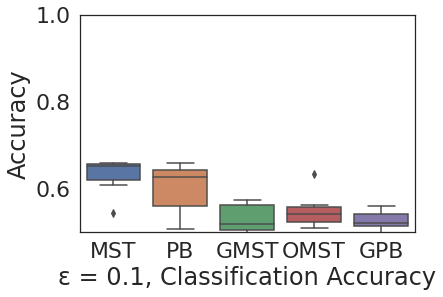

In [40]:

x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_accuracy_01,privbayes_accuracy_01,fair_greedy_mst_accuracy_01,fair_opt_mst_accuracy_01,fair_privbayes_accuracy_01]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)
ax.set_ylim([0.5, 1])

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, Classification Accuracy")
plt.ylabel("Accuracy")
plt.savefig(artifactspath + 'accuracy_01.pdf', bbox_inches='tight')


<class 'list'>


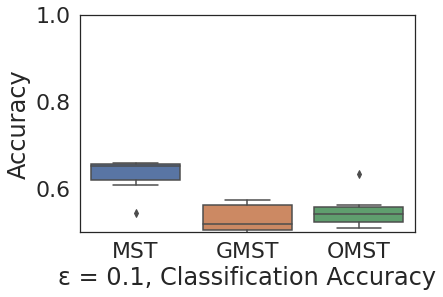

In [41]:

x=[0,1,2]
x_axis = ["MST", "GMST","OMST"]
print(type(mst_accuracy_01))
values = [mst_accuracy_01,fair_greedy_mst_accuracy_01,fair_opt_mst_accuracy_01]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)
ax.set_ylim([0.5, 1])
plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, Classification Accuracy")
plt.ylabel("Accuracy")
plt.savefig(artifactspath + 'accuracy_01_MST.pdf', bbox_inches='tight')


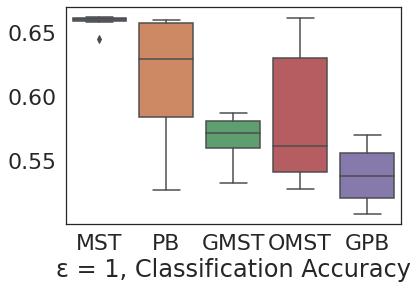

In [42]:

x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_accuracy_1,privbayes_accuracy_1,fair_greedy_mst_accuracy_1,fair_opt_mst_accuracy_1,fair_privbayes_accuracy_1]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, Classification Accuracy")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'accuracy_1.pdf', bbox_inches='tight')


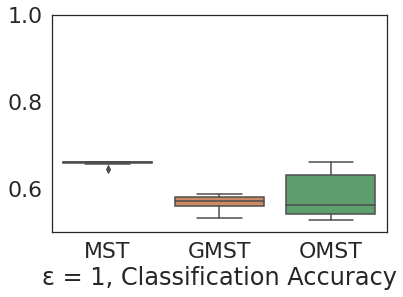

In [43]:

x=[0,1,2]
x_axis = ["MST", "GMST","OMST",]
values = [mst_accuracy_1,fair_greedy_mst_accuracy_1,fair_opt_mst_accuracy_1]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)
ax.set_ylim([0.5, 1])

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, Classification Accuracy")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'accuracy_1_MST.pdf', bbox_inches='tight')


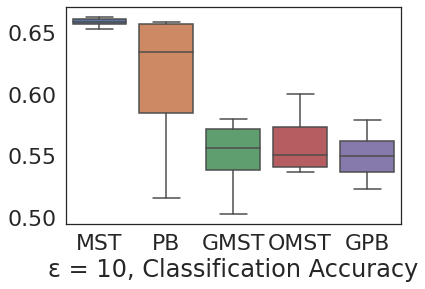

In [44]:

x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_accuracy_10,privbayes_accuracy_10,fair_greedy_mst_accuracy_10,fair_opt_mst_accuracy_10,fair_privbayes_accuracy_10]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, Classification Accuracy")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'accuracy_10.pdf', bbox_inches='tight')


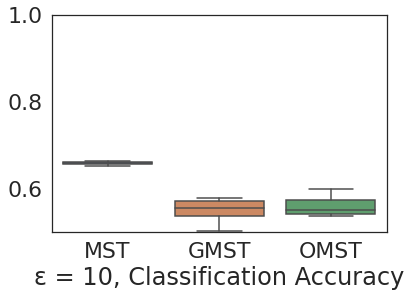

In [45]:

x=[0,1,2]
x_axis = ["MST","GMST","OMST"]
values = [mst_accuracy_10,fair_greedy_mst_accuracy_10,fair_opt_mst_accuracy_10]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)
ax.set_ylim([0.5, 1])

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, Classification Accuracy")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'accuracy_10_MST.pdf', bbox_inches='tight')


## Accuracy Pairity (F1) Score

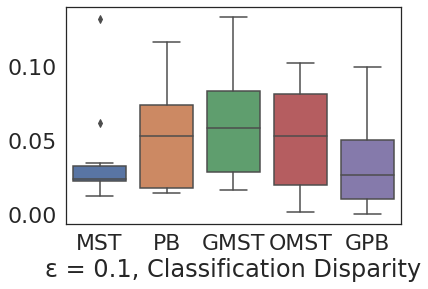

In [46]:

x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_accuracy_parity_01,privbayes_accuracy_parity_01,fair_greedy_mst_accuracy_parity_01,fair_opt_mst_accuracy_parity_01,fair_privbayes_accuracy_parity_01]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, Classification Disparity")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'accuracy_parity_01.pdf', bbox_inches='tight')


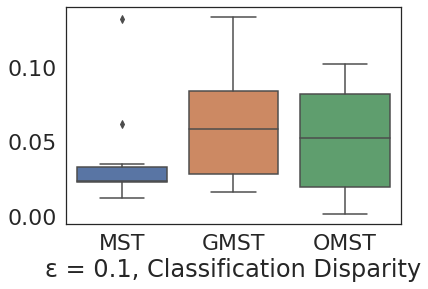

In [47]:

x=[0,1,2]
x_axis = ["MST", "GMST","OMST"]
values = [mst_accuracy_parity_01,fair_greedy_mst_accuracy_parity_01,fair_opt_mst_accuracy_parity_01]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, Classification Disparity")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'accuracy_parity_01_MST.pdf', bbox_inches='tight')


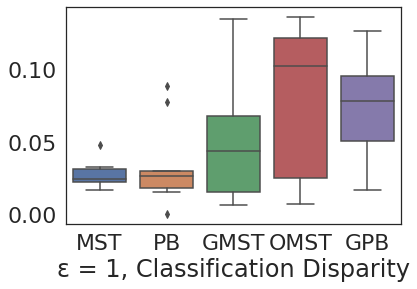

In [48]:

x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_accuracy_parity_1,privbayes_accuracy_parity_1,fair_greedy_mst_accuracy_parity_1,fair_opt_mst_accuracy_parity_1,fair_privbayes_accuracy_parity_1]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, Classification Disparity")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'accuracy_parity_1.pdf', bbox_inches='tight')


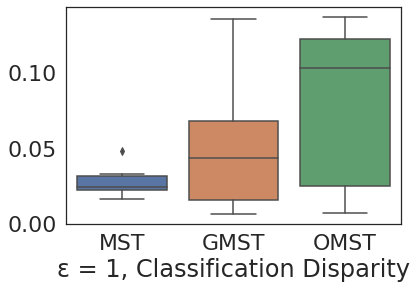

In [49]:

x=[0,1,2]
x_axis = ["MST", "GMST","OMST"]
values = [mst_accuracy_parity_1,fair_greedy_mst_accuracy_parity_1,fair_opt_mst_accuracy_parity_1]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, Classification Disparity")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'accuracy_parity_1_MST.pdf', bbox_inches='tight')


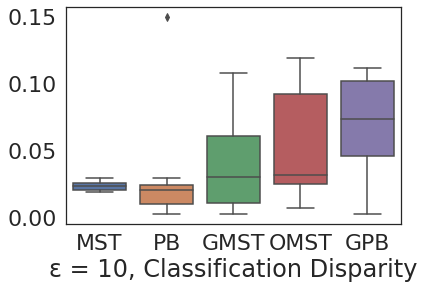

In [50]:

x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_accuracy_parity_10,privbayes_accuracy_parity_10,fair_greedy_mst_accuracy_parity_10,fair_opt_mst_accuracy_parity_10,fair_privbayes_accuracy_parity_10]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, Classification Disparity")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'accuracy_parity_10.pdf', bbox_inches='tight')


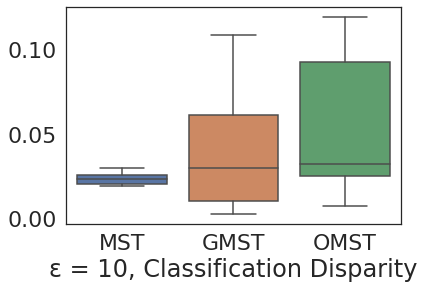

In [51]:

x=[0,1,2]
x_axis = ["MST", "GMST","OMST"]
values = [mst_accuracy_parity_10,fair_greedy_mst_accuracy_parity_10,fair_opt_mst_accuracy_parity_10]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, Classification Disparity")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'accuracy_parity_10_MST.pdf', bbox_inches='tight')


## Demographic Parity 

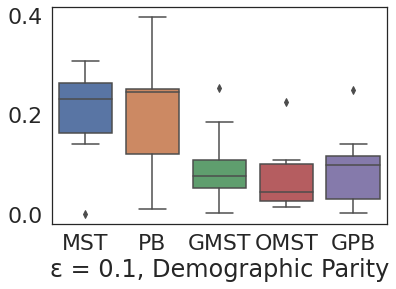

In [52]:
x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_demographic_parity_01,privbayes_demographic_parity_01,fair_greedy_mst_demographic_parity_01,fair_opt_mst_demographic_parity_01,fair_privbayes_demographic_parity_01]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, Demographic Parity")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'dem_parity_01.pdf', bbox_inches='tight')

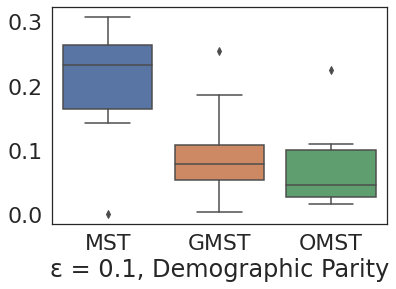

In [53]:
x=[0,1,2]
x_axis = ["MST", "GMST","OMST"]
values = [mst_demographic_parity_01,fair_greedy_mst_demographic_parity_01,fair_opt_mst_demographic_parity_01]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, Demographic Parity")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'dem_parity_01_MST.pdf', bbox_inches='tight')

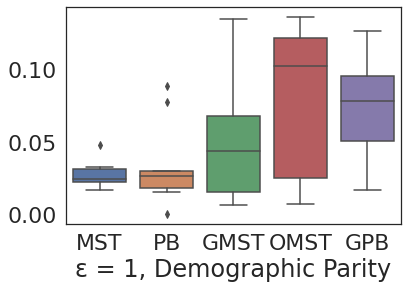

In [54]:

x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_accuracy_parity_1,privbayes_accuracy_parity_1,fair_greedy_mst_accuracy_parity_1,fair_opt_mst_accuracy_parity_1,fair_privbayes_accuracy_parity_1]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, Demographic Parity")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'dem_parity_1.pdf', bbox_inches='tight')


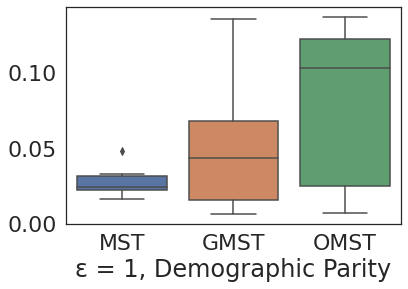

In [55]:

x=[0,1,2]
x_axis = ["MST", "GMST", "OMST"]
values = [mst_accuracy_parity_1,fair_greedy_mst_accuracy_parity_1,fair_opt_mst_accuracy_parity_1]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, Demographic Parity")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'dem_parity_1_MST.pdf', bbox_inches='tight')


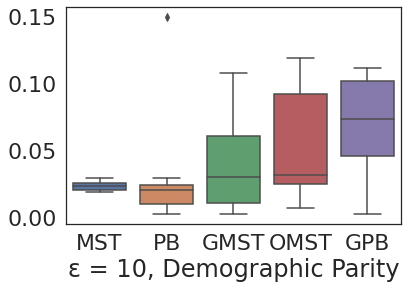

In [56]:

x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_accuracy_parity_10,privbayes_accuracy_parity_10,fair_greedy_mst_accuracy_parity_10,fair_opt_mst_accuracy_parity_10,fair_privbayes_accuracy_parity_10]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, Demographic Parity")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'dem_parity_10.pdf', bbox_inches='tight')


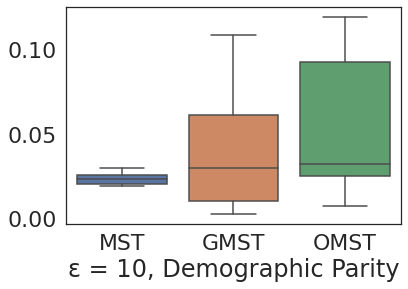

In [57]:

x=[0,1,2]
x_axis = ["MST", "GMST","OMST"]
values = [mst_accuracy_parity_10,fair_greedy_mst_accuracy_parity_10,fair_opt_mst_accuracy_parity_10]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, Demographic Parity")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'dem_parity_10_MST.pdf', bbox_inches='tight')


## True Positive Rate Balance

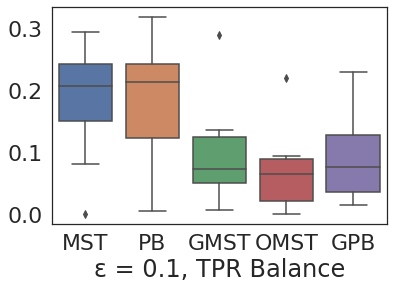

In [58]:
x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_TPRBalance_01,privbayes_TPRBalance_01,fair_greedy_mst_TPRBalance_01,fair_opt_mst_TPRBalance_01,fair_privbayes_TPRBalance_01]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, TPR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'TPR_Balance_01.pdf', bbox_inches='tight')

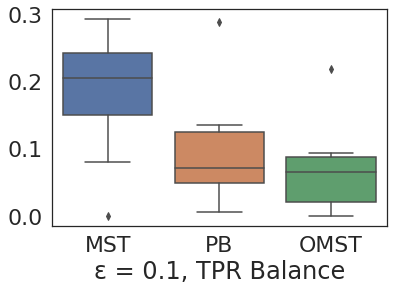

In [59]:
x=[0,1,2]
x_axis = ["MST","PB","OMST", ]
values = [mst_TPRBalance_01,fair_greedy_mst_TPRBalance_01,fair_opt_mst_TPRBalance_01]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, TPR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'TPR_Balance_01_MST.pdf', bbox_inches='tight')

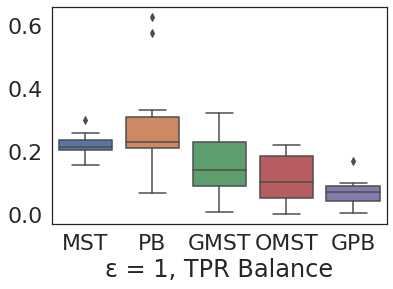

In [60]:
x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_TPRBalance_1,privbayes_TPRBalance_1,fair_greedy_mst_TPRBalance_1,fair_opt_mst_TPRBalance_1,fair_privbayes_TPRBalance_1]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, TPR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'TPR_Balance_1_MST.pdf', bbox_inches='tight')

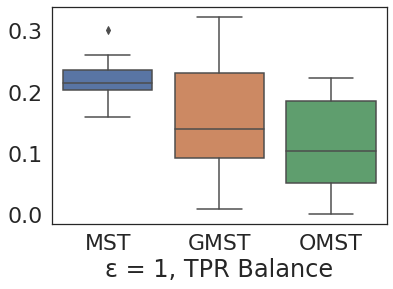

In [61]:
x=[0,1,2]
x_axis = ["MST", "GMST","OMST"]
values = [mst_TPRBalance_1,fair_greedy_mst_TPRBalance_1,fair_opt_mst_TPRBalance_1]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, TPR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'TPR_Balance_1_MST.pdf', bbox_inches='tight')

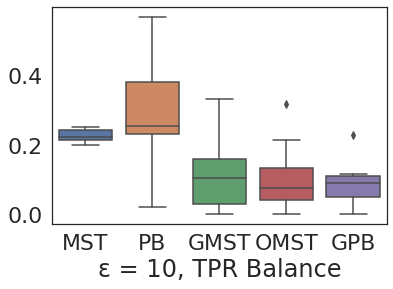

In [62]:
x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_TPRBalance_10,privbayes_TPRBalance_10,fair_greedy_mst_TPRBalance_10,fair_opt_mst_TPRBalance_10,fair_privbayes_TPRBalance_10]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, TPR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'TPR_Balance_10.pdf', bbox_inches='tight')

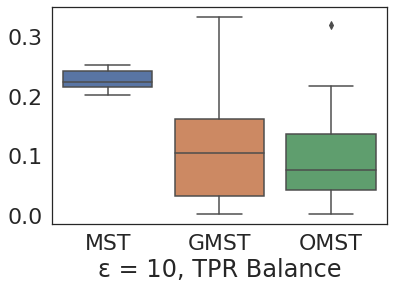

In [63]:
x=[0,1,2]
x_axis = ["MST", "GMST","OMST"]
values = [mst_TPRBalance_10,fair_greedy_mst_TPRBalance_10,fair_opt_mst_TPRBalance_10]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, TPR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'TPR_Balance_10_MST.pdf', bbox_inches='tight')

## True Negative Rate Balance

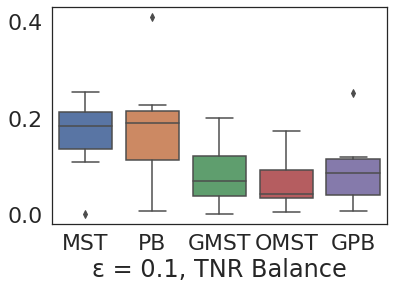

In [64]:
x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_TNRBalance_01,privbayes_TNRBalance_01,fair_greedy_mst_TNRBalance_01,fair_opt_mst_TNRBalance_01,fair_privbayes_TNRBalance_01]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, TNR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'TNR_Balance_01.pdf', bbox_inches='tight')

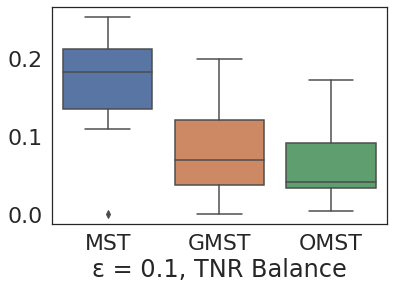

In [65]:
x=[0,1,2]
x_axis = ["MST", "GMST","OMST"]
values = [mst_TNRBalance_01,fair_greedy_mst_TNRBalance_01,fair_opt_mst_TNRBalance_01]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, TNR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'TNR_Balance_01_MST.pdf', bbox_inches='tight')

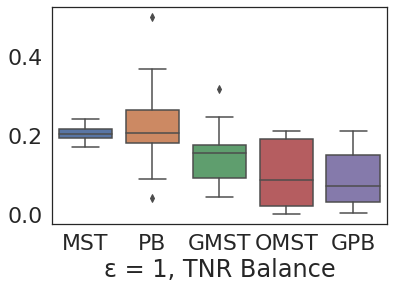

In [66]:
x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_TNRBalance_1,privbayes_TNRBalance_1,fair_greedy_mst_TNRBalance_1,fair_opt_mst_TNRBalance_1,fair_privbayes_TNRBalance_1]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, TNR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'TNR_Balance_1.pdf', bbox_inches='tight')

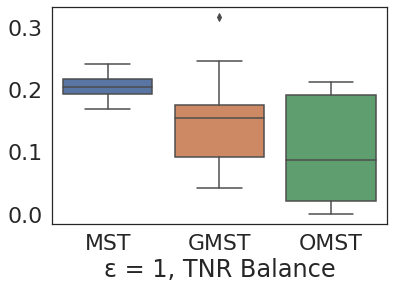

In [67]:
x=[0,1,2]
x_axis = ["MST", "GMST","OMST"]
values = [mst_TNRBalance_1,fair_greedy_mst_TNRBalance_1,fair_opt_mst_TNRBalance_1]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, TNR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'TNR_Balance_1_MST.pdf', bbox_inches='tight')

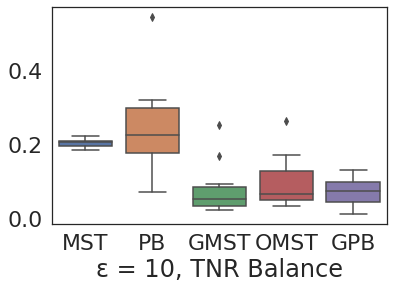

In [68]:
x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_TNRBalance_10,privbayes_TNRBalance_10,fair_greedy_mst_TNRBalance_10,fair_opt_mst_TNRBalance_10,fair_privbayes_TNRBalance_10]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, TNR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'TNR_Balance_10.pdf', bbox_inches='tight')

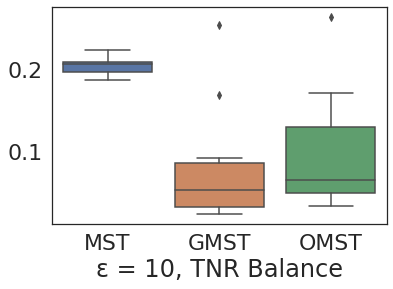

In [69]:
x=[0,1,2]
x_axis = ["MST", "GMST","OMST"]
values = [mst_TNRBalance_10,fair_greedy_mst_TNRBalance_10,fair_opt_mst_TNRBalance_10]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, TNR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'TNR_Balance_10._MST.pdf', bbox_inches='tight')

## Conditioned Demographic Parity

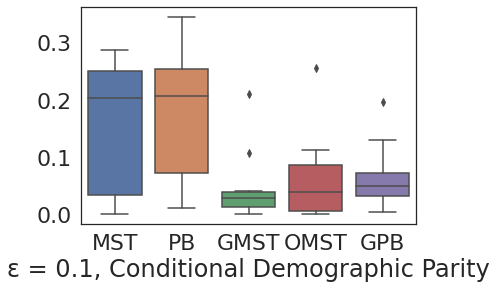

In [70]:
x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_conditional_demographic_parity_01,privbayes_conditional_demographic_parity_01,fair_greedy_mst_conditional_demographic_parity_01,fair_opt_mst_conditional_demographic_parity_01,fair_privbayes_conditional_demographic_parity_01]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, Conditional Demographic Parity")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'con_dem_parity_01.pdf', bbox_inches='tight')

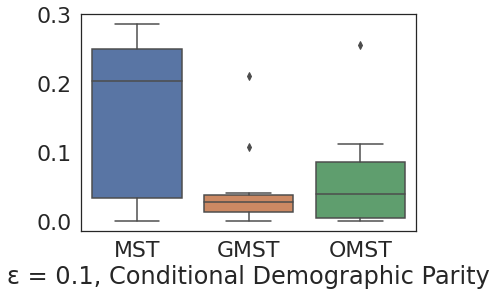

In [71]:
x=[0,1,2]
x_axis = ["MST", "GMST","OMST"]
values = [mst_conditional_demographic_parity_01,fair_greedy_mst_conditional_demographic_parity_01,fair_opt_mst_conditional_demographic_parity_01]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, Conditional Demographic Parity")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'con_dem_parity_01_MST.pdf', bbox_inches='tight')

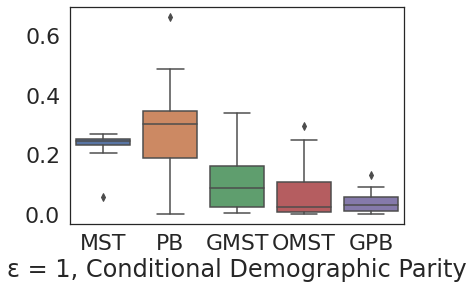

In [72]:
x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_conditional_demographic_parity_1,privbayes_conditional_demographic_parity_1,fair_greedy_mst_conditional_demographic_parity_1,fair_opt_mst_conditional_demographic_parity_1,fair_privbayes_conditional_demographic_parity_1]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, Conditional Demographic Parity")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'con_dem_parity_01.pdf', bbox_inches='tight')

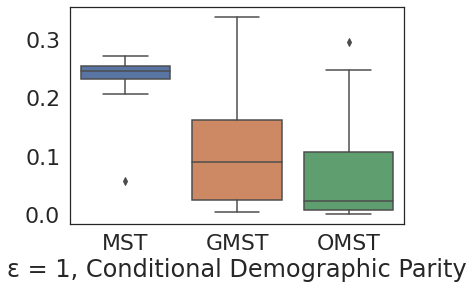

In [73]:
x=[0,1,2]
x_axis = ["MST", "GMST","OMST"]
values = [mst_conditional_demographic_parity_1,fair_greedy_mst_conditional_demographic_parity_1,fair_opt_mst_conditional_demographic_parity_1]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, Conditional Demographic Parity")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'con_dem_parity_1_MST.pdf', bbox_inches='tight')

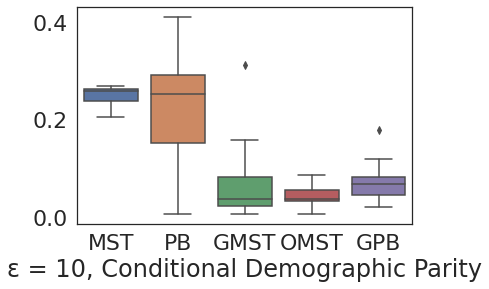

In [74]:
x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_conditional_demographic_parity_10,privbayes_conditional_demographic_parity_10,fair_greedy_mst_conditional_demographic_parity_10,fair_opt_mst_conditional_demographic_parity_10,fair_privbayes_conditional_demographic_parity_10]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, Conditional Demographic Parity")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'con_dem_parity_10.pdf', bbox_inches='tight')

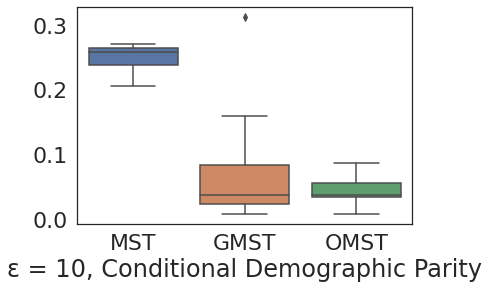

In [75]:
x=[0,1,2]
x_axis = ["MST", "GMST","OMST"]
values = [mst_conditional_demographic_parity_10,fair_greedy_mst_conditional_demographic_parity_10,fair_opt_mst_conditional_demographic_parity_10]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, Conditional Demographic Parity")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'con_dem_parity_10_MST.pdf', bbox_inches='tight')

## Conditioned True Positive Rate

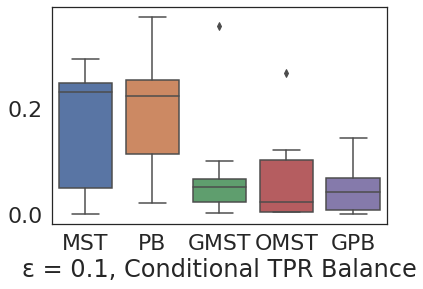

In [76]:
x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_conditional_TPRBalance_01,privbayes_conditional_TPRBalance_01,fair_greedy_mst_conditional_TPRBalance_01,fair_opt_mst_conditional_TPRBalance_01,fair_privbayes_conditional_TPRBalance_01]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, Conditional TPR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'con_TPR_Balance_01.pdf', bbox_inches='tight')

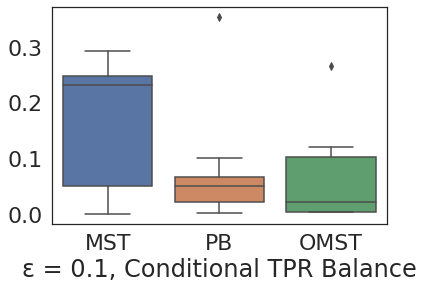

In [77]:
x=[0,1,2]
x_axis = ["MST","PB","OMST", ]
values = [mst_conditional_TPRBalance_01,fair_greedy_mst_conditional_TPRBalance_01,fair_opt_mst_conditional_TPRBalance_01]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, Conditional TPR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'con_TPR_Balance_01_MST.pdf', bbox_inches='tight')

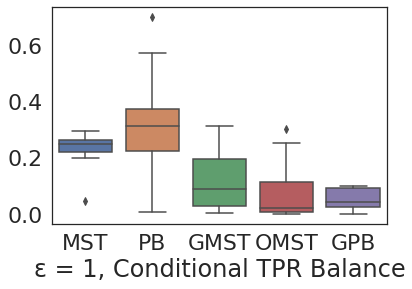

In [78]:
x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_conditional_TPRBalance_1,privbayes_conditional_TPRBalance_1,fair_greedy_mst_conditional_TPRBalance_1,fair_opt_mst_conditional_TPRBalance_1,fair_privbayes_conditional_TPRBalance_1]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, Conditional TPR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'con_TPR_Balance_1.pdf', bbox_inches='tight')

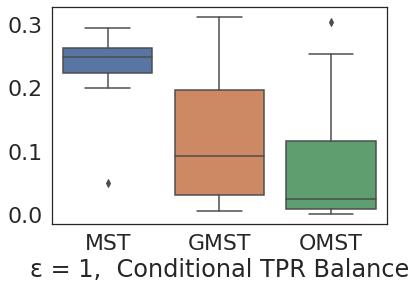

In [79]:
x=[0,1,2]
x_axis = ["MST","GMST","OMST"]
values = [mst_conditional_TPRBalance_1,fair_greedy_mst_conditional_TPRBalance_1,fair_opt_mst_conditional_TPRBalance_1]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 1,  Conditional TPR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'con_TPR_Balance_1_MST.pdf', bbox_inches='tight')

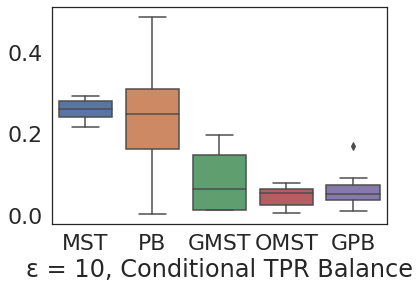

In [80]:
x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_conditional_TPRBalance_10,privbayes_conditional_TPRBalance_10,fair_greedy_mst_conditional_TPRBalance_10,fair_opt_mst_conditional_TPRBalance_10,fair_privbayes_conditional_TPRBalance_10]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, Conditional TPR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'con_TPR_Balance_10.pdf', bbox_inches='tight')

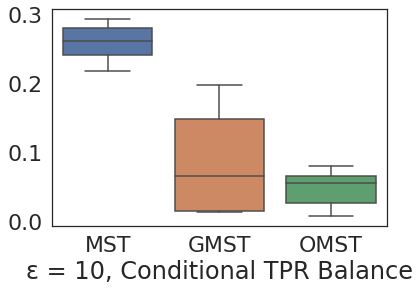

In [81]:
x=[0,1,2]
x_axis = ["MST","GMST","OMST", ]
values = [mst_conditional_TPRBalance_10,fair_greedy_mst_conditional_TPRBalance_10,fair_opt_mst_conditional_TPRBalance_10]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, Conditional TPR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'con_TPR_Balance_10_MST.pdf', bbox_inches='tight')

## Conditioned True Negative Balance 

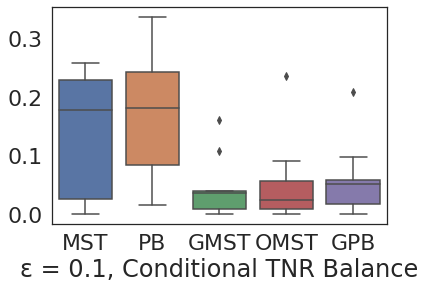

In [82]:
x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_conditional_TNRBalance_01,privbayes_conditional_TNRBalance_01,fair_greedy_mst_conditional_TNRBalance_01,fair_opt_mst_conditional_TNRBalance_01,fair_privbayes_conditional_TNRBalance_01]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1, Conditional TNR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'con_TNR_Balance_01.pdf', bbox_inches='tight')

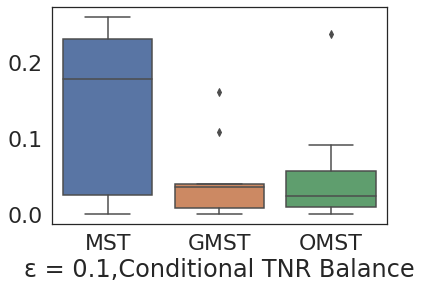

In [83]:
x=[0,1,2]
x_axis = ["MST", "GMST","OMST"]
values = [mst_conditional_TNRBalance_01,fair_greedy_mst_conditional_TNRBalance_01,fair_opt_mst_conditional_TNRBalance_01]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 0.1,Conditional TNR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'con_TNR_Balance_01_MST.pdf', bbox_inches='tight')

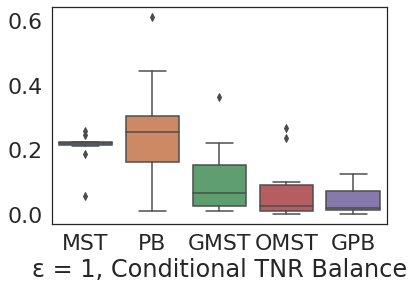

In [84]:
x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_conditional_TNRBalance_1,privbayes_conditional_TNRBalance_1,fair_greedy_mst_conditional_TNRBalance_1,fair_opt_mst_conditional_TNRBalance_1,fair_privbayes_conditional_TNRBalance_1]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, Conditional TNR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'con_TNR_Balance_1.pdf', bbox_inches='tight')

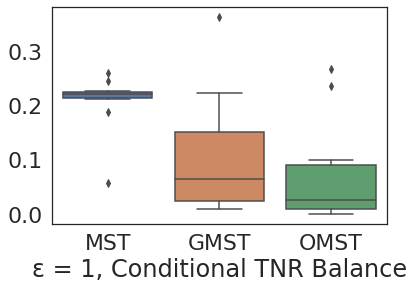

In [85]:
x=[0,1,2]
x_axis = ["MST", "GMST","OMST"]
values = [mst_conditional_TNRBalance_1,fair_greedy_mst_conditional_TNRBalance_1,fair_opt_mst_conditional_TNRBalance_1]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 1, Conditional TNR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'con_TNR_Balance_1_MST.pdf', bbox_inches='tight')

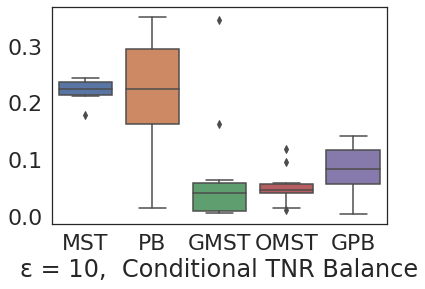

In [86]:
x=[0,1,2,3,4]
x_axis = ["MST","PB", "GMST","OMST", "GPB"]
values = [mst_conditional_TNRBalance_10,privbayes_conditional_TNRBalance_10,fair_greedy_mst_conditional_TNRBalance_10,fair_opt_mst_conditional_TNRBalance_10,fair_privbayes_conditional_TNRBalance_10]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 10,  Conditional TNR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'con_TNR_Balance_10.pdf', bbox_inches='tight')

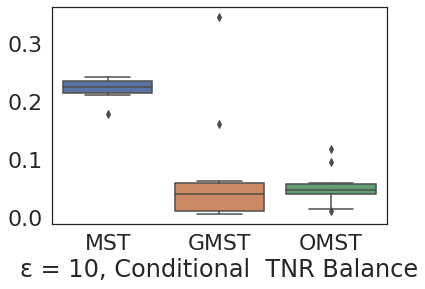

In [87]:
x=[0,1,2]
x_axis = ["MST", "GMST","OMST"]
values = [mst_conditional_TNRBalance_10,fair_greedy_mst_conditional_TNRBalance_10,fair_opt_mst_conditional_TNRBalance_10]


#ax = sns.boxplot(x = x_axis, data = np.array(values))

ax = sns.boxplot(data = values)

plt.xticks(x,x_axis)
plt.xlabel("ε = 10, Conditional  TNR Balance")
#plt.ylabel("Total Variation Distance")
plt.savefig(artifactspath + 'con_TNR_Balance_10_MST.pdf', bbox_inches='tight')

## Linear regression model

In [88]:
def LR_test(path):
    accuracy_vals= []
    accuracy_parity_vals = []
    demographic_parity_vals = []
    TPRBalance_vals = []
    TNRBalance_vals =[]
    conditional_demographic_parity_vals = []
    conditional_TPRBalance_vals = []
    conditional_TNRBalance_vals =[]

    for i in range(10):
        # training models on greedy_fair_mst
        testpath = "data/cleaned_Compas.csv"
        test = pd.read_csv(testpath)
        test_lables = test.pop('Two_yr_Recidivism')
        #tf.convert_to_tensor(test)


        trainpath = f'{path}{i}.csv'
        train = pd.read_csv(trainpath)
        train_lables = train.pop('Two_yr_Recidivism')

        regr = LinearRegression()
        regr.fit(train, train_lables)
        predictions = regr.predict(test)
        #model.fit(train, train_lables, epochs=10, batch_size=BATCH_SIZE)

        test['Recid'] = test_lables
        test['Predicted'] = predictions

        test = test.round({'Predicted': 0})
        test["Predicted"]=test["Predicted"].astype(int)

        test['ACC'] = ((test['Predicted'] == 1) & (test['Recid'] == 1)) | ((test['Predicted'] == 0) & (test['Recid'] == 0))
        test['S0TP'] = (test['Predicted'] == 1) & (test['Recid'] == 1) & (test['Race'] == 0) 
        test['S0TN'] = (test['Predicted'] == 0) & (test['Recid'] == 0)  & (test['Race'] == 0) 
        test['S0Pos'] = (test['Recid'] == 1)  & (test['Race'] == 0) 
        test['S0Neg'] = (test['Recid'] == 0)  & (test['Race'] == 0) 
        test['S0pred_pos'] = (test['Predicted'] == 1) & (test['Race'] == 0) 
        test['S0count'] = (test['Race'] == 0)
        test['S1TP'] = (test['Predicted'] == 1) & (test['Recid'] == 1) & (test['Race'] == 1) 
        test['S1TN'] = (test['Predicted'] == 0) & (test['Recid'] == 0)  & (test['Race'] == 1) 
        test['S1Pos'] = (test['Recid'] == 1)  & (test['Race'] == 1) 
        test['S1Neg'] = (test['Recid'] == 0)  & (test['Race'] == 1) 
        test['S1pred_pos'] = (test['Predicted'] == 1) & (test['Race'] == 1) 
        test['S1count'] = (test['Race'] == 1)
        test['S0ACC'] = (test['ACC'] == 1)  & (test['Race'] == 1) 
        test['S1ACC'] =(test['ACC'] == 1)  & (test['Race'] == 0) 

        accuracy = test['ACC'].sum()/test.shape[0]

        accuracy_vals.append(accuracy)


        sex0_accuracy = test['S0ACC'].sum()/test['S0count'].sum()
        sex1_accuracy = test['S1ACC'].sum()/test['S1count'].sum()
        accuracy_parity_vals.append(abs(sex1_accuracy-sex0_accuracy))


        sex1 = test.loc[test['Race'] == 1]
        sex0 = test.loc[test['Race'] == 0]
        sex1_count = len(sex1.index)
        sex0_count = len(sex0.index)
        demographic_parity = abs((sex1['Predicted'].sum()/sex1_count) -(sex0['Predicted'].sum()/sex0_count))
        demographic_parity_vals.append(demographic_parity)

        sex1TPR = len(sex1.loc[(sex1['Recid'] == 1) & (sex1['Predicted'] == 1)].index)/len(sex1.loc[(sex1['Recid'] == 1)].index)
        sex0TPR = len(sex0.loc[(sex0['Recid'] == 1) & (sex0['Predicted'] == 1)].index)/len(sex0.loc[(sex0['Recid'] == 1)].index) 
        TPRBalance = abs(sex1TPR - sex0TPR)
        TPRBalance_vals.append(TPRBalance)

        sex1TNR = len(sex1.loc[(sex1['Recid'] == 0) & (sex1['Predicted'] == 0)].index)/len(sex1.loc[(sex1['Recid'] == 0)].index)
        sex0TNR = len(sex0.loc[(sex0['Recid'] == 0) & (sex0['Predicted'] == 0)].index)/len(sex0.loc[(sex0['Recid'] == 0)].index) 
        TNRBalance = abs(sex1TNR - sex0TNR)
        TNRBalance_vals.append(TNRBalance)


        admis_group = test.groupby(admissible, sort = False)


        tp0 = admis_group['S0TP'].sum()
        pos0 = admis_group['S0Pos'].sum()
        tn0 = admis_group['S0TN'].sum()
        neg0 = admis_group['S0Neg'].sum()
        pred_pos0 = admis_group['S0pred_pos'].sum()
        counts0 = admis_group['S0count'].sum()

        sex0_group_tpr = (tp0/pos0)
        sex0_group_tpr = sex0_group_tpr.values
        sex0_group_tpr = sex0_group_tpr[~np.isnan(sex0_group_tpr)]

        sex0_group_tnr = (tn0/neg0)
        sex0_group_tnr =sex0_group_tnr.values
        sex0_group_tnr = sex0_group_tnr[~np.isnan(sex0_group_tnr)]

        sex0_group_dp = (pred_pos0/counts0)
        sex0_group_dp =sex0_group_dp.values
        sex0_group_dp = sex0_group_dp[~np.isnan(sex0_group_dp)]


        tp1 = admis_group['S1TP'].sum()
        pos1 = admis_group['S1Pos'].sum()
        tn1 = admis_group['S1TN'].sum()
        neg1 = admis_group['S1Neg'].sum()
        pred_pos1 = admis_group['S1pred_pos'].sum()
        counts1 = admis_group['S1count'].sum()

        sex1_group_tpr = (tp1/pos1)
        sex1_group_tpr = sex1_group_tpr.values
        sex1_group_tpr = sex1_group_tpr[~np.isnan(sex1_group_tpr)]

        sex1_group_tnr = (tn1/neg1)
        sex1_group_tnr =sex1_group_tnr.values
        sex1_group_tnr = sex1_group_tnr[~np.isnan(sex1_group_tnr)]

        sex1_group_dp = (pred_pos1/counts1)
        sex1_group_dp =sex1_group_dp.values
        sex1_group_dp = sex1_group_dp[~np.isnan(sex1_group_dp)]

        conditional_demographic_parity_vals.append(abs(np.mean(sex1_group_dp)-np.mean(sex0_group_dp)))
        conditional_TPRBalance_vals.append(abs(np.mean(sex1_group_tpr)-np.mean(sex0_group_tpr)))
        conditional_TNRBalance_vals.append(abs(np.mean(sex1_group_tnr)-np.mean(sex0_group_tnr)))

    print("Average Accuracy: " + str(np.mean(accuracy_vals)))
    print("Average Accuracy Parity: " + str(np.mean(accuracy_parity_vals)))
    print("Average Demographic Parity: " + str(np.mean(demographic_parity_vals)))
    print("Average TPR Balance: " + str(np.mean(TPRBalance_vals)))
    print("Average TNR Balance: " + str(np.mean(TNRBalance_vals)))
    print("Average Conditional Demographic Parity: " + str(np.mean(conditional_demographic_parity_vals)))
    print("Average Conditional TPR Balance: " + str(np.mean(conditional_TPRBalance_vals)))
    print("Average Conditional TNR Balance: " + str(np.mean(conditional_TNRBalance_vals)))

    return((accuracy_vals,accuracy_parity_vals,demographic_parity_vals,TPRBalance_vals,TNRBalance_vals,conditional_demographic_parity_vals,conditional_TPRBalance_vals,conditional_TNRBalance_vals))

In [89]:
#eps = 0.1 MST

path = 'data/original/Compas/eps=0.1/results_original_'
print("eps=0.1")
vals = LR_test(path)
mst_accuracy_01LR = vals[0]
mst_accuracy_parity_01LR = vals[1]
mst_demographic_parity_01LR = vals[2]
mst_TPRBalance_01LR = vals[3]
mst_TNRBalance_01LR =vals[4]
mst_conditional_demographic_parity_01LR = vals[5]
mst_conditional_TPRBalance_01LR = vals[6]
mst_conditional_TNRBalance_01LR =vals[7]

#eps = 1 MST
path = 'data/original/Compas/eps=1/results_original_'
print("eps=1")
vals = LR_test(path)
mst_accuracy_1LR = vals[0]
mst_accuracy_parity_1LR = vals[1]
mst_demographic_parity_1LR = vals[2]
mst_TPRBalance_1LR = vals[3]
mst_TNRBalance_1LR =vals[4]
mst_conditional_demographic_parity_1LR = vals[5]
mst_conditional_TPRBalance_1LR = vals[6]
mst_conditional_TNRBalance_1LR =vals[7]

#eps = 10 MST
path = 'data/original/Compas/eps=10/results_original_'
print("eps=10")
vals = LR_test(path)
mst_accuracy_10LR = vals[0]
mst_accuracy_parity_10LR = vals[1]
mst_demographic_parity_10LR = vals[2]
mst_TPRBalance_10LR = vals[3]
mst_TNRBalance_10LR =vals[4]

mst_conditional_demographic_parity_10LR = vals[5]
mst_conditional_TPRBalance_10LR = vals[6]
mst_conditional_TNRBalance_10LR =vals[7]

eps=0.1
Average Accuracy: 0.6450907323395982
Average Accuracy Parity: 0.507999520744643
Average Demographic Parity: 0.26166580176051457
Average TPR Balance: 0.24507156448713943
Average TNR Balance: 0.21681676200375985
Average Conditional Demographic Parity: 0.2517933280138943
Average Conditional TPR Balance: 0.262614515986884
Average Conditional TNR Balance: 0.2274710341513662
eps=1
Average Accuracy: 0.6610174983797797
Average Accuracy Parity: 0.5346748140077355
Average Demographic Parity: 0.24532636915392708
Average TPR Balance: 0.2117839339887002
Average TNR Balance: 0.2034035187585656
Average Conditional Demographic Parity: 0.23936075962203573
Average Conditional TPR Balance: 0.2382875938836631
Average Conditional TNR Balance: 0.22463153323773435
eps=10
Average Accuracy: 0.6607420609202852
Average Accuracy Parity: 0.5347520190504005
Average Demographic Parity: 0.2458853156907455
Average TPR Balance: 0.21237602007409126
Average TNR Balance: 0.20404592267640967
Average Conditional Dem

In [90]:
#eps = 0.1 fair_greedy_mst
path = 'data/fair_greedy/Compas/eps=0.1/results_greedy_'
print("eps=0.1")
vals = LR_test(path)

fair_greedy_mst_accuracy_01LR= vals[0]
fair_greedy_mst_accuracy_parity_01LR = vals[1]
fair_greedy_mst_demographic_parity_01LR = vals[2]
fair_greedy_mst_TPRBalance_01LR = vals[3]
fair_greedy_mst_TNRBalance_01LR =vals[4]
fair_greedy_mst_conditional_demographic_parity_01LR = vals[5]
fair_greedy_mst_conditional_TPRBalance_01LR = vals[6]
fair_greedy_mst_conditional_TNRBalance_01LR =vals[7]


path = 'data/fair_greedy/Compas/eps=1/results_greedy_'
print("eps=1")
vals = LR_test(path)

fair_greedy_mst_accuracy_1LR= vals[0]
fair_greedy_mst_accuracy_parity_1LR = vals[1]
fair_greedy_mst_demographic_parity_1LR = vals[2]
fair_greedy_mst_TPRBalance_1LR = vals[3]
fair_greedy_mst_TNRBalance_1LR =vals[4]
fair_greedy_mst_conditional_demographic_parity_1LR = vals[5]
fair_greedy_mst_conditional_TPRBalance_1LR = vals[6]
fair_greedy_mst_conditional_TNRBalance_1LR =vals[7]



path = 'data/fair_greedy/Compas/eps=10/results_greedy_'
print("eps=10")
vals = LR_test(path)

fair_greedy_mst_accuracy_10LR= vals[0]
fair_greedy_mst_accuracy_parity_10LR = vals[1]
fair_greedy_mst_demographic_parity_10LR = vals[2]
fair_greedy_mst_TPRBalance_10LR = vals[3]
fair_greedy_mst_TNRBalance_10LR =vals[4]
fair_greedy_mst_conditional_demographic_parity_10LR = vals[5]
fair_greedy_mst_conditional_TPRBalance_10LR = vals[6]
fair_greedy_mst_conditional_TNRBalance_10LR =vals[7]


eps=0.1
Average Accuracy: 0.5098347375243034
Average Accuracy Parity: 0.38671117750794703
Average Demographic Parity: 0.08508531868609148
Average TPR Balance: 0.08345747805311783
Average TNR Balance: 0.07719927566496206
Average Conditional Demographic Parity: 0.08953812750595769
Average Conditional TPR Balance: 0.08909101545811157
Average Conditional TNR Balance: 0.08706098644420547
eps=1
Average Accuracy: 0.5569345430978612
Average Accuracy Parity: 0.4584864067455191
Average Demographic Parity: 0.11933907690925223
Average TPR Balance: 0.12905894640317225
Average TNR Balance: 0.09260021222686618
Average Conditional Demographic Parity: 0.09053875556018649
Average Conditional TPR Balance: 0.10394030153244645
Average Conditional TNR Balance: 0.07071075341024423
eps=10
Average Accuracy: 0.5673039533376538
Average Accuracy Parity: 0.5015414949022956
Average Demographic Parity: 0.10339390671743776
Average TPR Balance: 0.11848123034375271
Average TNR Balance: 0.06307035970288234
Average Condi

In [91]:
#eps = 0.1 fair_opt_mst
path = 'data/fair_opt/Compas/eps=0.1/results_opt_'
print("eps=0.1")
vals = LR_test(path)
fair_opt_mst_accuracy_01LR= vals[0]
fair_opt_mst_accuracy_parity_01LR = vals[1]
fair_opt_mst_demographic_parity_01LR = vals[2]
fair_opt_mst_TPRBalance_01LR = vals[3]
fair_opt_mst_TNRBalance_01LR =vals[4]
fair_opt_mst_conditional_demographic_parity_01LR = vals[5]
fair_opt_mst_conditional_TPRBalance_01LR = vals[6]
fair_opt_mst_conditional_TNRBalance_01LR =vals[7]

path = 'data/fair_opt/Compas/eps=1/results_opt_'
print("eps=1")
vals = LR_test(path)
fair_opt_mst_accuracy_1LR= vals[0]
fair_opt_mst_accuracy_parity_1LR = vals[1]
fair_opt_mst_demographic_parity_1LR = vals[2]
fair_opt_mst_TPRBalance_1LR = vals[3]
fair_opt_mst_TNRBalance_1LR =vals[4]
fair_opt_mst_conditional_demographic_parity_1LR = vals[5]
fair_opt_mst_conditional_TPRBalance_1LR = vals[6]
fair_opt_mst_conditional_TNRBalance_1LR =vals[7]


path = 'data/fair_opt/Compas/eps=10/results_opt_'
print("eps=10")
vals = LR_test(path)
fair_opt_mst_accuracy_10LR= vals[0]
fair_opt_mst_accuracy_parity_10LR = vals[1]
fair_opt_mst_demographic_parity_10LR = vals[2]
fair_opt_mst_TPRBalance_10LR = vals[3]
fair_opt_mst_TNRBalance_10LR =vals[4]
fair_opt_mst_conditional_demographic_parity_10LR = vals[5]
fair_opt_mst_conditional_TPRBalance_10LR = vals[6]
fair_opt_mst_conditional_TNRBalance_10LR =vals[7]



eps=0.1
Average Accuracy: 0.5388042773817239
Average Accuracy Parity: 0.4039577356682056
Average Demographic Parity: 0.08654760166391469
Average TPR Balance: 0.07224380411647775
Average TNR Balance: 0.08450852155835156
Average Conditional Demographic Parity: 0.053642186780231874
Average Conditional TPR Balance: 0.058042408142031654
Average Conditional TNR Balance: 0.05490802570022605
eps=1
Average Accuracy: 0.5847375243033052
Average Accuracy Parity: 0.41120310317843656
Average Demographic Parity: 0.09440446905620392
Average TPR Balance: 0.08225514193513418
Average TNR Balance: 0.07820214557443046
Average Conditional Demographic Parity: 0.10496609672704087
Average Conditional TPR Balance: 0.11138589076208907
Average Conditional TNR Balance: 0.09319716647615943
eps=10
Average Accuracy: 0.541250810110175
Average Accuracy Parity: 0.3824438279023966
Average Demographic Parity: 0.11536407307146523
Average TPR Balance: 0.11715504247287493
Average TNR Balance: 0.10561076066522501
Average Cond

In [92]:
#eps = 0.1 privbayes
path = 'data/Bayes_original/Compas/eps=0.1/sythetic_data_'
print('eps=0.1')

vals = LR_test(path)
privbayes_accuracy_01LR= vals[0]
privbayes_accuracy_parity_01LR = vals[1]
privbayes_demographic_parity_01LR = vals[2]
privbayes_TPRBalance_01LR = vals[3]
privbayes_TNRBalance_01LR =vals[4]
privbayes_conditional_demographic_parity_01LR = vals[5]
privbayes_conditional_TPRBalance_01LR = vals[6]
privbayes_conditional_TNRBalance_01LR =vals[7]

path = 'data/Bayes_original/Compas/eps=1/sythetic_data_'
print('eps=1')

vals = LR_test(path)
privbayes_accuracy_1LR= vals[0]
privbayes_accuracy_parity_1LR = vals[1]
privbayes_demographic_parity_1LR = vals[2]
privbayes_TPRBalance_1LR = vals[3]
privbayes_TNRBalance_1LR =vals[4]
privbayes_conditional_demographic_parity_1LR = vals[5]
privbayes_conditional_TPRBalance_1LR = vals[6]
privbayes_conditional_TNRBalance_1LR =vals[7]


path = 'data/Bayes_original/Compas/eps=10/sythetic_data_'
print('eps=10')

vals = LR_test(path)
privbayes_accuracy_10LR= vals[0]
privbayes_accuracy_parity_10LR = vals[1]
privbayes_demographic_parity_10LR = vals[2]
privbayes_TPRBalance_10LR = vals[3]
privbayes_TNRBalance_10LR =vals[4]
privbayes_conditional_demographic_parity_10LR = vals[5]
privbayes_conditional_TPRBalance_10LR = vals[6]
privbayes_conditional_TNRBalance_10LR =vals[7]


eps=0.1
Average Accuracy: 0.6107096565132858
Average Accuracy Parity: 0.474277286665843
Average Demographic Parity: 0.15968451518453203
Average TPR Balance: 0.13652147227581074
Average TNR Balance: 0.13433223301231184
Average Conditional Demographic Parity: 0.1698128208892527
Average Conditional TPR Balance: 0.1725222858127779
Average Conditional TNR Balance: 0.15906154324813124
eps=1
Average Accuracy: 0.6202041477640959
Average Accuracy Parity: 0.48067422242690416
Average Demographic Parity: 0.174413844489125
Average TPR Balance: 0.16012859781651775
Average TNR Balance: 0.13915044286116465
Average Conditional Demographic Parity: 0.15741846672956689
Average Conditional TPR Balance: 0.16699458358208777
Average Conditional TNR Balance: 0.1363244204127081
eps=10
Average Accuracy: 0.6115521710952689
Average Accuracy Parity: 0.46999759623485016
Average Demographic Parity: 0.18647530898865888
Average TPR Balance: 0.18292933199154496
Average TNR Balance: 0.14847651428200184
Average Conditiona

In [93]:
#eps = 0.1 fair_privbayes
path = 'data/Bayes_fair/Compas/eps=0.1/sythetic_data_'
print('eps=0.1')

vals = LR_test(path)
fair_privbayes_accuracy_01LR= vals[0]
fair_privbayes_accuracy_parity_01LR = vals[1]
fair_privbayes_demographic_parity_01LR = vals[2]
fair_privbayes_TPRBalance_01LR = vals[3]
fair_privbayes_TNRBalance_01LR =vals[4]
fair_privbayes_conditional_demographic_parity_01LR = vals[5]
fair_privbayes_conditional_TPRBalance_01LR = vals[6]
fair_privbayes_conditional_TNRBalance_01LR =vals[7]

path = 'data/Bayes_fair/Compas/eps=1/sythetic_data_'
print('eps=1')

vals = LR_test(path)
fair_privbayes_accuracy_1LR= vals[0]
fair_privbayes_accuracy_parity_1LR = vals[1]
fair_privbayes_demographic_parity_1LR = vals[2]
fair_privbayes_TPRBalance_1LR = vals[3]
fair_privbayes_TNRBalance_1LR =vals[4]
fair_privbayes_conditional_demographic_parity_1LR = vals[5]
fair_privbayes_conditional_TPRBalance_1LR = vals[6]
fair_privbayes_conditional_TNRBalance_1LR =vals[7]


path = 'data/Bayes_fair/Compas/eps=10/sythetic_data_'
print('eps=10')

vals = LR_test(path)
fair_privbayes_accuracy_10LR= vals[0]
fair_privbayes_accuracy_parity_10LR = vals[1]
fair_privbayes_demographic_parity_10LR = vals[2]
fair_privbayes_TPRBalance_10LR = vals[3]
fair_privbayes_TNRBalance_10LR =vals[4]
fair_privbayes_conditional_demographic_parity_10LR = vals[5]
fair_privbayes_conditional_TPRBalance_10LR = vals[6]
fair_privbayes_conditional_TNRBalance_10LR =vals[7]


eps=0.1
Average Accuracy: 0.5292125729099156
Average Accuracy Parity: 0.42088997719792876
Average Demographic Parity: 0.06435118933956367
Average TPR Balance: 0.055711096560422224
Average TNR Balance: 0.055070087458505945
Average Conditional Demographic Parity: 0.04632124493505416
Average Conditional TPR Balance: 0.05125532219872906
Average Conditional TNR Balance: 0.0349061689179595
eps=1
Average Accuracy: 0.5617141931302656
Average Accuracy Parity: 0.40809826232491264
Average Demographic Parity: 0.10134383202099737
Average TPR Balance: 0.10099389017550182
Average TNR Balance: 0.0834449638399657
Average Conditional Demographic Parity: 0.03059280101740729
Average Conditional TPR Balance: 0.03873718620821577
Average Conditional TNR Balance: 0.03448056364174547
eps=10
Average Accuracy: 0.5438431626701232
Average Accuracy Parity: 0.3626486945907796
Average Demographic Parity: 0.07107350953456068
Average TPR Balance: 0.08069780318777273
Average TNR Balance: 0.060786394381041074
Average Con

# Random Forrest

In [94]:
def RF_test(path):
    accuracy_vals= []
    accuracy_parity_vals = []
    demographic_parity_vals = []
    TPRBalance_vals = []
    TNRBalance_vals =[]
    conditional_demographic_parity_vals = []
    conditional_TPRBalance_vals = []
    conditional_TNRBalance_vals =[]

    for i in range(10):
        # training models on greedy_fair_mst
        testpath = "data/cleaned_Compas.csv"
        test = pd.read_csv(testpath)
        test_lables = test.pop('Two_yr_Recidivism')
        #tf.convert_to_tensor(test)


        trainpath = f'{path}{i}.csv'
        train = pd.read_csv(trainpath)
        train_lables = train.pop('Two_yr_Recidivism')

        rf = RandomForestRegressor(n_estimators = 400)
        rf.fit(train, train_lables)
        predictions = rf.predict(test)
        #model.fit(train, train_lables, epochs=10, batch_size=BATCH_SIZE)

        test['Recid'] = test_lables
        test['Predicted'] = predictions

        test = test.round({'Predicted': 0})
        test["Predicted"]=test["Predicted"].astype(int)

        test['ACC'] = ((test['Predicted'] == 1) & (test['Recid'] == 1)) | ((test['Predicted'] == 0) & (test['Recid'] == 0))
        test['S0TP'] = (test['Predicted'] == 1) & (test['Recid'] == 1) & (test['Race'] == 0) 
        test['S0TN'] = (test['Predicted'] == 0) & (test['Recid'] == 0)  & (test['Race'] == 0) 
        test['S0Pos'] = (test['Recid'] == 1)  & (test['Race'] == 0) 
        test['S0Neg'] = (test['Recid'] == 0)  & (test['Race'] == 0) 
        test['S0pred_pos'] = (test['Predicted'] == 1) & (test['Race'] == 0) 
        test['S0count'] = (test['Race'] == 0)
        test['S1TP'] = (test['Predicted'] == 1) & (test['Recid'] == 1) & (test['Race'] == 1) 
        test['S1TN'] = (test['Predicted'] == 0) & (test['Recid'] == 0)  & (test['Race'] == 1) 
        test['S1Pos'] = (test['Recid'] == 1)  & (test['Race'] == 1) 
        test['S1Neg'] = (test['Recid'] == 0)  & (test['Race'] == 1) 
        test['S1pred_pos'] = (test['Predicted'] == 1) & (test['Race'] == 1) 
        test['S1count'] = (test['Race'] == 1)
        test['S0ACC'] = (test['ACC'] == 1)  & (test['Race'] == 1) 
        test['S1ACC'] =(test['ACC'] == 1)  & (test['Race'] == 0) 

        accuracy = test['ACC'].sum()/test.shape[0]

        accuracy_vals.append(accuracy)


        sex0_accuracy = test['S0ACC'].sum()/test['S0count'].sum()
        sex1_accuracy = test['S1ACC'].sum()/test['S1count'].sum()
        accuracy_parity_vals.append(abs(sex1_accuracy-sex0_accuracy))


        sex1 = test.loc[test['Race'] == 1]
        sex0 = test.loc[test['Race'] == 0]
        sex1_count = len(sex1.index)
        sex0_count = len(sex0.index)
        demographic_parity = abs((sex1['Predicted'].sum()/sex1_count) -(sex0['Predicted'].sum()/sex0_count))
        demographic_parity_vals.append(demographic_parity)

        sex1TPR = len(sex1.loc[(sex1['Recid'] == 1) & (sex1['Predicted'] == 1)].index)/len(sex1.loc[(sex1['Recid'] == 1)].index)
        sex0TPR = len(sex0.loc[(sex0['Recid'] == 1) & (sex0['Predicted'] == 1)].index)/len(sex0.loc[(sex0['Recid'] == 1)].index) 
        TPRBalance = abs(sex1TPR - sex0TPR)
        TPRBalance_vals.append(TPRBalance)

        sex1TNR = len(sex1.loc[(sex1['Recid'] == 0) & (sex1['Predicted'] == 0)].index)/len(sex1.loc[(sex1['Recid'] == 0)].index)
        sex0TNR = len(sex0.loc[(sex0['Recid'] == 0) & (sex0['Predicted'] == 0)].index)/len(sex0.loc[(sex0['Recid'] == 0)].index) 
        TNRBalance = abs(sex1TNR - sex0TNR)
        TNRBalance_vals.append(TNRBalance)


        admis_group = test.groupby(admissible, sort = False)


        tp0 = admis_group['S0TP'].sum()
        pos0 = admis_group['S0Pos'].sum()
        tn0 = admis_group['S0TN'].sum()
        neg0 = admis_group['S0Neg'].sum()
        pred_pos0 = admis_group['S0pred_pos'].sum()
        counts0 = admis_group['S0count'].sum()

        sex0_group_tpr = (tp0/pos0)
        sex0_group_tpr = sex0_group_tpr.values
        sex0_group_tpr = sex0_group_tpr[~np.isnan(sex0_group_tpr)]

        sex0_group_tnr = (tn0/neg0)
        sex0_group_tnr =sex0_group_tnr.values
        sex0_group_tnr = sex0_group_tnr[~np.isnan(sex0_group_tnr)]

        sex0_group_dp = (pred_pos0/counts0)
        sex0_group_dp =sex0_group_dp.values
        sex0_group_dp = sex0_group_dp[~np.isnan(sex0_group_dp)]


        tp1 = admis_group['S1TP'].sum()
        pos1 = admis_group['S1Pos'].sum()
        tn1 = admis_group['S1TN'].sum()
        neg1 = admis_group['S1Neg'].sum()
        pred_pos1 = admis_group['S1pred_pos'].sum()
        counts1 = admis_group['S1count'].sum()

        sex1_group_tpr = (tp1/pos1)
        sex1_group_tpr = sex1_group_tpr.values
        sex1_group_tpr = sex1_group_tpr[~np.isnan(sex1_group_tpr)]

        sex1_group_tnr = (tn1/neg1)
        sex1_group_tnr =sex1_group_tnr.values
        sex1_group_tnr = sex1_group_tnr[~np.isnan(sex1_group_tnr)]

        sex1_group_dp = (pred_pos1/counts1)
        sex1_group_dp =sex1_group_dp.values
        sex1_group_dp = sex1_group_dp[~np.isnan(sex1_group_dp)]

        conditional_demographic_parity_vals.append(abs(np.mean(sex1_group_dp)-np.mean(sex0_group_dp)))
        conditional_TPRBalance_vals.append(abs(np.mean(sex1_group_tpr)-np.mean(sex0_group_tpr)))
        conditional_TNRBalance_vals.append(abs(np.mean(sex1_group_tnr)-np.mean(sex0_group_tnr)))

    print("Average Accuracy: " + str(np.mean(accuracy_vals)))
    print("Average Accuracy Parity: " + str(np.mean(accuracy_parity_vals)))
    print("Average Demographic Parity: " + str(np.mean(demographic_parity_vals)))
    print("Average TPR Balance: " + str(np.mean(TPRBalance_vals)))
    print("Average TNR Balance: " + str(np.mean(TNRBalance_vals)))

    print("Average Conditional Demographic Parity: " + str(np.mean(conditional_demographic_parity_vals)))
    print("Average Conditional TPR Balance: " + str(np.mean(conditional_TPRBalance_vals)))
    print("Average Conditional TNR Balance: " + str(np.mean(conditional_TNRBalance_vals)))
    
    return((accuracy_vals,accuracy_parity_vals,demographic_parity_vals,TPRBalance_vals,TNRBalance_vals,conditional_demographic_parity_vals,conditional_TPRBalance_vals,conditional_TNRBalance_vals))

In [95]:
#eps = 0.1 MST
path = 'data/original/Compas/eps=0.1/results_original_'
print("eps=0.1")
vals = RF_test(path)
mst_accuracy_01RF= vals[0]
mst_accuracy_parity_01RF = vals[1]
mst_demographic_parity_01RF = vals[2]
mst_TPRBalance_01RF = vals[3]
mst_TNRBalance_01RF =vals[4]
mst_conditional_demographic_parity_01RF = vals[5]
mst_conditional_TPRBalance_01RF = vals[6]
mst_conditional_TNRBalance_01RF =vals[7]

path = 'data/original/Compas/eps=1/results_original_'
print("eps=1")
vals = RF_test(path)
mst_accuracy_1RF= vals[0]
mst_accuracy_parity_1RF = vals[1]
mst_demographic_parity_1RF = vals[2]
mst_TPRBalance_1RF = vals[3]
mst_TNRBalance_1RF =vals[4]
mst_conditional_demographic_parity_1RF = vals[5]
mst_conditional_TPRBalance_1RF = vals[6]
mst_conditional_TNRBalance_1RF =vals[7]

path = 'data/original/Compas/eps=10/results_original_'
print("eps=10")
vals = RF_test(path)
mst_accuracy_10RF= vals[0]
mst_accuracy_parity_10RF = vals[1]
mst_demographic_parity_10RF = vals[2]
mst_TPRBalance_10RF = vals[3]
mst_TNRBalance_10RF =vals[4]
mst_conditional_demographic_parity_10RF = vals[5]
mst_conditional_TPRBalance_10RF = vals[6]
mst_conditional_TNRBalance_10RF =vals[7]


eps=0.1
Average Accuracy: 0.5993033052495139
Average Accuracy Parity: 0.48052157959570324
Average Demographic Parity: 0.17982703374631664
Average TPR Balance: 0.15442570432902528
Average TNR Balance: 0.15759108069673938
Average Conditional Demographic Parity: 0.1561972989356303
Average Conditional TPR Balance: 0.12628815311310856
Average Conditional TNR Balance: 0.14948631042782307
eps=1
Average Accuracy: 0.6308165910563837
Average Accuracy Parity: 0.5167227919619891
Average Demographic Parity: 0.20830953905369531
Average TPR Balance: 0.19178996910664142
Average TNR Balance: 0.16506341540882544
Average Conditional Demographic Parity: 0.10983750266733154
Average Conditional TPR Balance: 0.11320485372410163
Average Conditional TNR Balance: 0.09126033083680316
eps=10
Average Accuracy: 0.6319831497083604
Average Accuracy Parity: 0.5238586196696882
Average Demographic Parity: 0.23246648020637933
Average TPR Balance: 0.22663676939550675
Average TNR Balance: 0.18106014435139323
Average Condit

In [96]:
#eps = 0.1 fair_greedy_mst
path = 'data/fair_greedy/Compas/eps=0.1/results_greedy_'
print("eps=0.1")
vals = RF_test(path)
fair_greedy_mst_accuracy_01RF= vals[0]
fair_greedy_mst_accuracy_parity_01RF = vals[1]
fair_greedy_mst_demographic_parity_01RF = vals[2]
fair_greedy_mst_TPRBalance_01RF = vals[3]
fair_greedy_mst_TNRBalance_01RF =vals[4]
fair_greedy_mst_conditional_demographic_parity_01RF = vals[5]
fair_greedy_mst_conditional_TPRBalance_01RF = vals[6]
fair_greedy_mst_conditional_TNRBalance_01RF =vals[7]

path = 'data/fair_greedy/Compas/eps=1/results_greedy_'
print("eps=1")
vals = RF_test(path)
fair_greedy_mst_accuracy_1RF= vals[0]
fair_greedy_mst_accuracy_parity_1RF = vals[1]
fair_greedy_mst_demographic_parity_1RF = vals[2]
fair_greedy_mst_TPRBalance_1RF = vals[3]
fair_greedy_mst_TNRBalance_1RF =vals[4]
fair_greedy_mst_conditional_demographic_parity_1RF = vals[5]
fair_greedy_mst_conditional_TPRBalance_1RF = vals[6]
fair_greedy_mst_conditional_TNRBalance_1RF =vals[7]

path = 'data/fair_greedy/Compas/eps=10/results_greedy_'
print("eps=10")
vals = RF_test(path)
fair_greedy_mst_accuracy_10RF= vals[0]
fair_greedy_mst_accuracy_parity_10RF = vals[1]
fair_greedy_mst_demographic_parity_10RF = vals[2]
fair_greedy_mst_TPRBalance_10RF = vals[3]
fair_greedy_mst_TNRBalance_10RF =vals[4]
fair_greedy_mst_conditional_demographic_parity_10RF = vals[5]
fair_greedy_mst_conditional_TPRBalance_10RF = vals[6]
fair_greedy_mst_conditional_TNRBalance_10RF =vals[7]



eps=0.1
Average Accuracy: 0.51450097213221
Average Accuracy Parity: 0.41024020428259594
Average Demographic Parity: 0.06707042432820005
Average TPR Balance: 0.07891993361370266
Average TNR Balance: 0.05540384462683443
Average Conditional Demographic Parity: 0.04317926101873372
Average Conditional TPR Balance: 0.04666060805328937
Average Conditional TNR Balance: 0.05051072168211246
eps=1
Average Accuracy: 0.5368276085547634
Average Accuracy Parity: 0.41831878718441223
Average Demographic Parity: 0.11075558351211805
Average TPR Balance: 0.11056284798973444
Average TNR Balance: 0.10903892578968914
Average Conditional Demographic Parity: 0.0620961610253832
Average Conditional TPR Balance: 0.06696248286747461
Average Conditional TNR Balance: 0.05329459707174382
eps=10
Average Accuracy: 0.5349319507453013
Average Accuracy Parity: 0.457136658916209
Average Demographic Parity: 0.07155101261415077
Average TPR Balance: 0.105502723859663
Average TNR Balance: 0.05815000665142511
Average Conditiona

In [128]:
print(np.mean(fair_greedy_mst_accuracy_1)/np.mean(mst_accuracy_1))
print(np.mean(fair_greedy_mst_demographic_parity_1)/np.mean(mst_demographic_parity_1))
print(np.mean(fair_greedy_mst_TPRBalance_1)/np.mean(mst_TPRBalance_1))
print(np.mean(fair_greedy_mst_TNRBalance_1)/np.mean(mst_TNRBalance_1))
print(np.mean(fair_greedy_mst_conditional_demographic_parity_1)/np.mean(mst_conditional_demographic_parity_1))
print(np.mean(fair_greedy_mst_conditional_TPRBalance_1)/np.mean(mst_conditional_TPRBalance_1))
print(np.mean(fair_greedy_mst_conditional_TNRBalance_1)/np.mean(mst_conditional_TNRBalance_1))

0.8628294543875414
0.6624995107688137
0.7035433923109162
0.7306327662491433
0.5005672434971398
0.5051464747287423
0.5312357793624262


In [97]:
#eps = 0.1 privbayes
path = 'data/Bayes_original/Compas/eps=0.1/sythetic_data_'
print("eps=0.1")
vals = RF_test(path)
privbayes_accuracy_01RF= vals[0]
privbayes_accuracy_parity_01RF = vals[1]
privbayes_demographic_parity_01RF = vals[2]
privbayes_TPRBalance_01RF = vals[3]
privbayes_TNRBalance_01RF =vals[4]
privbayes_conditional_demographic_parity_01RF = vals[5]
privbayes_conditional_TPRBalance_01RF = vals[6]
privbayes_conditional_TNRBalance_01RF =vals[7]

path = 'data/Bayes_original/Compas/eps=1/sythetic_data_'
print("eps=1")
vals = RF_test(path)
privbayes_accuracy_1RF= vals[0]
privbayes_accuracy_parity_1RF = vals[1]
privbayes_demographic_parity_1RF = vals[2]
privbayes_TPRBalance_1RF = vals[3]
privbayes_TNRBalance_1RF =vals[4]
privbayes_conditional_demographic_parity_1RF = vals[5]
privbayes_conditional_TPRBalance_1RF = vals[6]
privbayes_conditional_TNRBalance_1RF =vals[7]

path = 'data/Bayes_original/Compas/eps=10/sythetic_data_'
print("eps=10")
vals = RF_test(path)
privbayes_accuracy_10RF= vals[0]
privbayes_accuracy_parity_10RF = vals[1]
privbayes_demographic_parity_10RF = vals[2]
privbayes_TPRBalance_10RF = vals[3]
privbayes_TNRBalance_10RF =vals[4]
privbayes_conditional_demographic_parity_10RF = vals[5]
privbayes_conditional_TPRBalance_10RF = vals[6]
privbayes_conditional_TNRBalance_10RF =vals[7]

eps=0.1
Average Accuracy: 0.5831497083603371
Average Accuracy Parity: 0.4848086535545396
Average Demographic Parity: 0.19073283385939097
Average TPR Balance: 0.19375292051368817
Average TNR Balance: 0.1556378304185654
Average Conditional Demographic Parity: 0.1043841342205348
Average Conditional TPR Balance: 0.13119904732947832
Average Conditional TNR Balance: 0.10544939036734209
eps=1
Average Accuracy: 0.5879779650032403
Average Accuracy Parity: 0.4753994930376927
Average Demographic Parity: 0.24703518408273145
Average TPR Balance: 0.25438703269949947
Average TNR Balance: 0.20882453334323312
Average Conditional Demographic Parity: 0.15109597937460092
Average Conditional TPR Balance: 0.1765666321306393
Average Conditional TNR Balance: 0.1501479106516726
eps=10
Average Accuracy: 0.5909591704471808
Average Accuracy Parity: 0.46579942414473513
Average Demographic Parity: 0.24374007885248292
Average TPR Balance: 0.26138842868673196
Average TNR Balance: 0.206313491461942
Average Conditional

In [98]:
#eps = 0.1 fair_privbayes
path = 'data/Bayes_fair/Compas/eps=0.1/sythetic_data_'
print("eps=0.1")
vals = RF_test(path)
fair_privbayes_accuracy_01RF= vals[0]
fair_privbayes_accuracy_parity_01RF = vals[1]
fair_privbayes_demographic_parity_01RF = vals[2]
fair_privbayes_TPRBalance_01RF = vals[3]
fair_privbayes_TNRBalance_01RF =vals[4]
fair_privbayes_conditional_demographic_parity_01RF = vals[5]
fair_privbayes_conditional_TPRBalance_01RF = vals[6]
fair_privbayes_conditional_TNRBalance_01RF =vals[7]


path = 'data/Bayes_fair/Compas/eps=1/sythetic_data_'
print("eps=1")
vals = RF_test(path)
fair_privbayes_accuracy_1RF= vals[0]
fair_privbayes_accuracy_parity_1RF = vals[1]
fair_privbayes_demographic_parity_1RF = vals[2]
fair_privbayes_TPRBalance_1RF = vals[3]
fair_privbayes_TNRBalance_1RF =vals[4]
fair_privbayes_conditional_demographic_parity_1RF = vals[5]
fair_privbayes_conditional_TPRBalance_1RF = vals[6]
fair_privbayes_conditional_TNRBalance_1RF =vals[7]


path = 'data/Bayes_fair/Compas/eps=10/sythetic_data_'
print("eps=10")
vals = RF_test(path)
fair_privbayes_accuracy_10RF= vals[0]
fair_privbayes_accuracy_parity_10RF = vals[1]
fair_privbayes_demographic_parity_10RF = vals[2]
fair_privbayes_TPRBalance_10RF = vals[3]
fair_privbayes_TNRBalance_10RF =vals[4]
fair_privbayes_conditional_demographic_parity_10RF = vals[5]
fair_privbayes_conditional_TPRBalance_10RF = vals[6]
fair_privbayes_conditional_TNRBalance_10RF =vals[7]


eps=0.1
Average Accuracy: 0.5246273493195075
Average Accuracy Parity: 0.44218902879650746
Average Demographic Parity: 0.06537588222299599
Average TPR Balance: 0.056172153204105624
Average TNR Balance: 0.06895243663873069
Average Conditional Demographic Parity: 0.034767726745337166
Average Conditional TPR Balance: 0.043387571081215
Average Conditional TNR Balance: 0.02943779749334157
eps=1
Average Accuracy: 0.5247731691510046
Average Accuracy Parity: 0.3887359415308464
Average Demographic Parity: 0.047527364357629324
Average TPR Balance: 0.04966909389735319
Average TNR Balance: 0.0553730624501788
Average Conditional Demographic Parity: 0.0414902193867425
Average Conditional TPR Balance: 0.047957658642097584
Average Conditional TNR Balance: 0.04235212049582472
eps=10
Average Accuracy: 0.5320317563188594
Average Accuracy Parity: 0.4202248755995372
Average Demographic Parity: 0.061986977733346806
Average TPR Balance: 0.06573957294216394
Average TNR Balance: 0.06096840624635845
Average Cond

In [99]:
#eps = 0.1 fair_opt_mst
path = 'data/fair_opt/Compas/eps=0.1/results_opt_'
print("eps=0.1")
vals = RF_test(path)

fair_opt_mst_accuracy_01RF= vals[0]
fair_opt_mst_accuracy_parity_01RF = vals[1]
fair_opt_mst_demographic_parity_01RF = vals[2]
fair_opt_mst_TPRBalance_01RF = vals[3]
fair_opt_mst_TNRBalance_01RF =vals[4]
fair_opt_mst_conditional_demographic_parity_01RF = vals[5]
fair_opt_mst_conditional_TPRBalance_01RF = vals[6]
fair_opt_mst_conditional_TNRBalance_01RF =vals[7]

path = 'data/fair_opt/Compas/eps=1/results_opt_'
print("eps=1")
vals = RF_test(path)

fair_opt_mst_accuracy_1RF= vals[0]
fair_opt_mst_accuracy_parity_1RF = vals[1]
fair_opt_mst_demographic_parity_1RF = vals[2]
fair_opt_mst_TPRBalance_1RF = vals[3]
fair_opt_mst_TNRBalance_1RF =vals[4]
fair_opt_mst_conditional_demographic_parity_1RF = vals[5]
fair_opt_mst_conditional_TPRBalance_1RF = vals[6]
fair_opt_mst_conditional_TNRBalance_1RF =vals[7]

path = 'data/fair_opt/Compas/eps=10/results_opt_'
print("eps=10")
vals = RF_test(path)

fair_opt_mst_accuracy_10RF= vals[0]
fair_opt_mst_accuracy_parity_10RF = vals[1]
fair_opt_mst_demographic_parity_10RF = vals[2]
fair_opt_mst_TPRBalance_10RF = vals[3]
fair_opt_mst_TNRBalance_10RF =vals[4]
fair_opt_mst_conditional_demographic_parity_10RF = vals[5]
fair_opt_mst_conditional_TPRBalance_10RF = vals[6]
fair_opt_mst_conditional_TNRBalance_10RF =vals[7]


eps=0.1
Average Accuracy: 0.5281918340894362
Average Accuracy Parity: 0.40851484006724553
Average Demographic Parity: 0.07117421306644797
Average TPR Balance: 0.0688022488138503
Average TNR Balance: 0.06316007659966773
Average Conditional Demographic Parity: 0.069031657801668
Average Conditional TPR Balance: 0.06641635914046341
Average Conditional TNR Balance: 0.07522240419193817
eps=1
Average Accuracy: 0.5542449773169151
Average Accuracy Parity: 0.42461359662424514
Average Demographic Parity: 0.11020872319633371
Average TPR Balance: 0.1032997593276996
Average TNR Balance: 0.0993498618669158
Average Conditional Demographic Parity: 0.0931521749011742
Average Conditional TPR Balance: 0.0999759640637439
Average Conditional TNR Balance: 0.08631918596193242
eps=10
Average Accuracy: 0.5261827608554763
Average Accuracy Parity: 0.41798330843451986
Average Demographic Parity: 0.07596236347774646
Average TPR Balance: 0.0753348977765278
Average TNR Balance: 0.07516440363528744
Average Conditional

## Visualizations

In [100]:
artifactspath = "vis/Compas/"
plt.rcParams.update({'font.size': 32, 'axes.titlesize': 22})

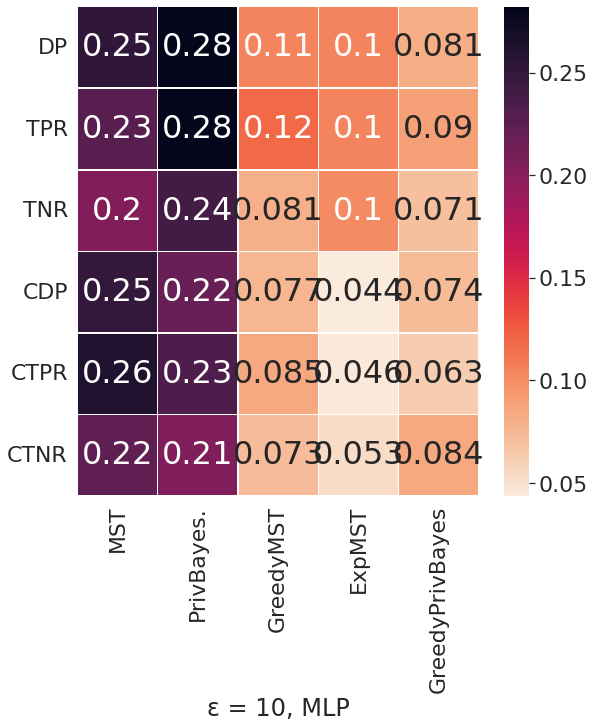

In [101]:
measures = ["DP", "TPR", "TNR", "CDP",
              "CTPR", "CTNR"]
mechanisms = ["MST", "PrivBayes.", "GreedyMST",
           "ExpMST", "GreedyPrivBayes"]

values = np.array([[np.mean(mst_demographic_parity_10), np.mean(privbayes_demographic_parity_10), np.mean(fair_greedy_mst_demographic_parity_10), np.mean(fair_opt_mst_demographic_parity_10), np.mean(fair_privbayes_demographic_parity_10) ],
                   [np.mean(mst_TPRBalance_10), np.mean(privbayes_TPRBalance_10), np.mean(fair_greedy_mst_TPRBalance_10), np.mean(fair_opt_mst_TPRBalance_10), np.mean(fair_privbayes_TPRBalance_10) ],
                    [np.mean(mst_TNRBalance_10), np.mean(privbayes_TNRBalance_10), np.mean(fair_greedy_mst_TNRBalance_10), np.mean(fair_opt_mst_TNRBalance_10), np.mean(fair_privbayes_TNRBalance_10) ],
                    [np.mean(mst_conditional_demographic_parity_10), np.mean(privbayes_conditional_demographic_parity_10), np.mean(fair_greedy_mst_conditional_demographic_parity_10), np.mean(fair_opt_mst_conditional_demographic_parity_10), np.mean(fair_privbayes_conditional_demographic_parity_10) ],
                   [np.mean(mst_conditional_TPRBalance_10), np.mean(privbayes_conditional_TPRBalance_10), np.mean(fair_greedy_mst_conditional_TPRBalance_10), np.mean(fair_opt_mst_conditional_TPRBalance_10), np.mean(fair_privbayes_conditional_TPRBalance_10) ],
                    [np.mean(mst_conditional_TNRBalance_10), np.mean(privbayes_conditional_TNRBalance_10), np.mean(fair_greedy_mst_conditional_TNRBalance_10), np.mean(fair_opt_mst_conditional_TNRBalance_10), np.mean(fair_privbayes_conditional_TNRBalance_10) ]])


plt.figure(figsize=(9, 9))
palette = sns.color_palette("Blues_d",n_colors=15)
palette.reverse()
ax = sns.heatmap(values,annot=True, linewidth=0.5, cmap = sns.cm.rocket_r)
ax.set_xlabel("ε = 10, MLP")
#ax.set_xticks(range(len(mechanisms)))
ax.set_xticklabels(mechanisms,rotation = 90)
#ax.set_yticks(range(len(measures)))
ax.set_yticklabels(measures,rotation = 0)
plt.savefig(artifactspath + 'MLP10.pdf', bbox_inches='tight')
plt.show()





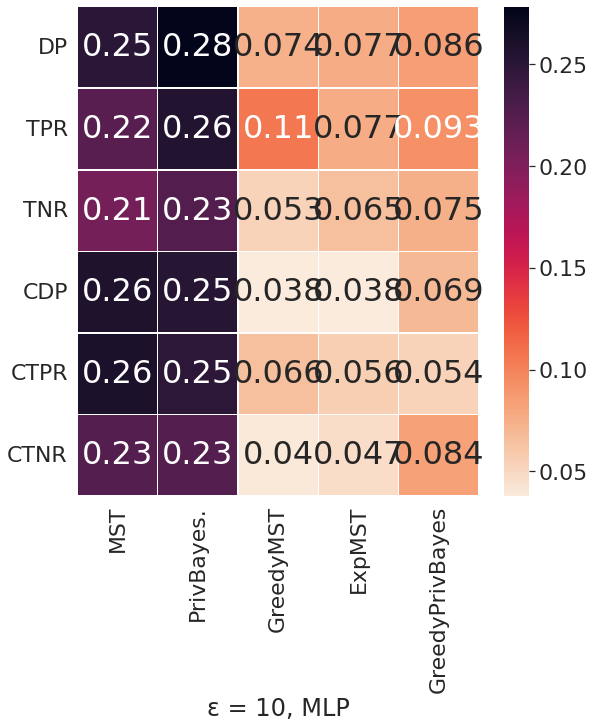

In [102]:
measures = ["DP", "TPR", "TNR", "CDP",
              "CTPR", "CTNR"]
mechanisms = ["MST", "PrivBayes.", "GreedyMST",
           "ExpMST", "GreedyPrivBayes"]

values = np.array([[np.median(mst_demographic_parity_10), np.median(privbayes_demographic_parity_10), np.median(fair_greedy_mst_demographic_parity_10), np.median(fair_opt_mst_demographic_parity_10), np.median(fair_privbayes_demographic_parity_10) ],
                   [np.median(mst_TPRBalance_10), np.median(privbayes_TPRBalance_10), np.median(fair_greedy_mst_TPRBalance_10), np.median(fair_opt_mst_TPRBalance_10), np.median(fair_privbayes_TPRBalance_10) ],
                    [np.median(mst_TNRBalance_10), np.median(privbayes_TNRBalance_10), np.median(fair_greedy_mst_TNRBalance_10), np.median(fair_opt_mst_TNRBalance_10), np.median(fair_privbayes_TNRBalance_10) ],
                    [np.median(mst_conditional_demographic_parity_10), np.median(privbayes_conditional_demographic_parity_10), np.median(fair_greedy_mst_conditional_demographic_parity_10), np.median(fair_opt_mst_conditional_demographic_parity_10), np.median(fair_privbayes_conditional_demographic_parity_10) ],
                   [np.median(mst_conditional_TPRBalance_10), np.median(privbayes_conditional_TPRBalance_10), np.median(fair_greedy_mst_conditional_TPRBalance_10), np.median(fair_opt_mst_conditional_TPRBalance_10), np.median(fair_privbayes_conditional_TPRBalance_10) ],
                    [np.median(mst_conditional_TNRBalance_10), np.median(privbayes_conditional_TNRBalance_10), np.median(fair_greedy_mst_conditional_TNRBalance_10), np.median(fair_opt_mst_conditional_TNRBalance_10), np.median(fair_privbayes_conditional_TNRBalance_10) ]])


plt.figure(figsize=(9, 9))
palette = sns.color_palette("Blues_d",n_colors=15)
palette.reverse()
ax = sns.heatmap(values,annot=True, linewidth=0.5, cmap = sns.cm.rocket_r)
ax.set_xlabel("ε = 10, MLP")
#ax.set_xticks(range(len(mechanisms)))
ax.set_xticklabels(mechanisms,rotation = 90)
#ax.set_yticks(range(len(measures)))
ax.set_yticklabels(measures,rotation = 0)
plt.savefig(artifactspath + 'MLP10median.pdf', bbox_inches='tight')
plt.show()





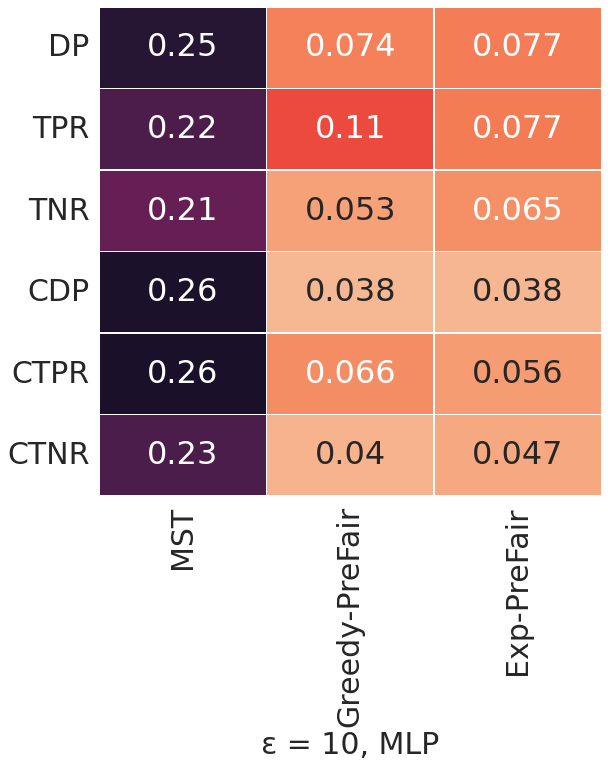

In [148]:
measures = ["DP", "TPR", "TNR", "CDP",
              "CTPR", "CTNR"]
mechanisms = ["MST",  "Greedy-PreFair",
           "Exp-PreFair"]

values = np.array([[np.median(mst_demographic_parity_10),np.median(fair_greedy_mst_demographic_parity_10), np.median(fair_opt_mst_demographic_parity_10) ],
                   [np.median(mst_TPRBalance_10), np.median(fair_greedy_mst_TPRBalance_10), np.median(fair_opt_mst_TPRBalance_10)],
                    [np.median(mst_TNRBalance_10), np.median(fair_greedy_mst_TNRBalance_10), np.median(fair_opt_mst_TNRBalance_10) ],
                    [np.median(mst_conditional_demographic_parity_10),  np.median(fair_greedy_mst_conditional_demographic_parity_10), np.median(fair_opt_mst_conditional_demographic_parity_10) ],
                   [np.median(mst_conditional_TPRBalance_10),  np.median(fair_greedy_mst_conditional_TPRBalance_10), np.median(fair_opt_mst_conditional_TPRBalance_10)],
                    [np.median(mst_conditional_TNRBalance_10), np.median(fair_greedy_mst_conditional_TNRBalance_10), np.median(fair_opt_mst_conditional_TNRBalance_10) ]])


plt.figure(figsize=(9, 9))
palette = sns.color_palette("Blues_d",n_colors=15)
palette.reverse()
ax = sns.heatmap(values,annot=True, linewidth=0.5, cmap = sns.cm.rocket_r,vmin=0, vmax=0.28 ,cbar=False)
ax.set_xlabel("ε = 10, MLP",fontsize=30)
#ax.set_xticks(range(len(mechanisms)))
ax.set_xticklabels(mechanisms,rotation = 90,fontsize=30)
#ax.set_yticks(range(len(measures)))
ax.set_yticklabels(measures,rotation = 0,fontsize=30)
plt.savefig(artifactspath + 'MLP10medianMST.pdf', bbox_inches='tight')
plt.show()





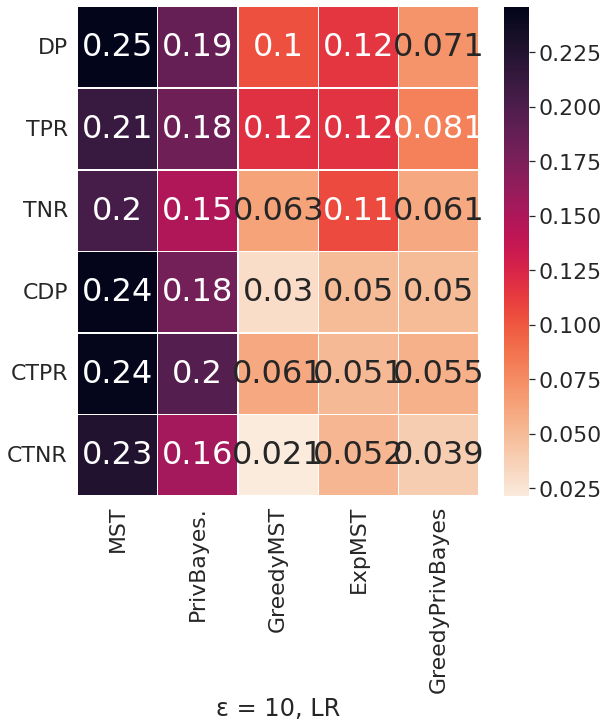

In [104]:
measures = ["DP", "TPR", "TNR", "CDP",
              "CTPR", "CTNR"]
mechanisms = ["MST", "PrivBayes.", "GreedyMST",
           "ExpMST", "GreedyPrivBayes"]

values = np.array([[np.mean(mst_demographic_parity_10LR), np.mean(privbayes_demographic_parity_10LR), np.mean(fair_greedy_mst_demographic_parity_10LR), np.mean(fair_opt_mst_demographic_parity_10LR), np.mean(fair_privbayes_demographic_parity_10LR) ],
                   [np.mean(mst_TPRBalance_10LR), np.mean(privbayes_TPRBalance_10LR), np.mean(fair_greedy_mst_TPRBalance_10LR), np.mean(fair_opt_mst_TPRBalance_10LR), np.mean(fair_privbayes_TPRBalance_10LR) ],
                    [np.mean(mst_TNRBalance_10LR), np.mean(privbayes_TNRBalance_10LR), np.mean(fair_greedy_mst_TNRBalance_10LR), np.mean(fair_opt_mst_TNRBalance_10LR), np.mean(fair_privbayes_TNRBalance_10LR) ],
                    [np.mean(mst_conditional_demographic_parity_10LR), np.mean(privbayes_conditional_demographic_parity_10LR), np.mean(fair_greedy_mst_conditional_demographic_parity_10LR), np.mean(fair_opt_mst_conditional_demographic_parity_10LR), np.mean(fair_privbayes_conditional_demographic_parity_10LR) ],
                   [np.mean(mst_conditional_TPRBalance_10LR), np.mean(privbayes_conditional_TPRBalance_10LR), np.mean(fair_greedy_mst_conditional_TPRBalance_10LR), np.mean(fair_opt_mst_conditional_TPRBalance_10LR), np.mean(fair_privbayes_conditional_TPRBalance_10LR) ],
                    [np.mean(mst_conditional_TNRBalance_10LR), np.mean(privbayes_conditional_TNRBalance_10LR), np.mean(fair_greedy_mst_conditional_TNRBalance_10LR), np.mean(fair_opt_mst_conditional_TNRBalance_10LR), np.mean(fair_privbayes_conditional_TNRBalance_10LR) ]])


plt.figure(figsize=(9, 9))
ax = sns.heatmap(values,annot=True, linewidth=0.5, cmap = sns.cm.rocket_r)
ax.set_xlabel("ε = 10, LR")
#ax.set_xticks(range(len(mechanisms)))
ax.set_xticklabels(mechanisms,rotation = 90)
#ax.set_yticks(range(len(measures)))
ax.set_yticklabels(measures,rotation = 0)
plt.savefig(artifactspath + 'LR10.pdf', bbox_inches='tight')
plt.show()





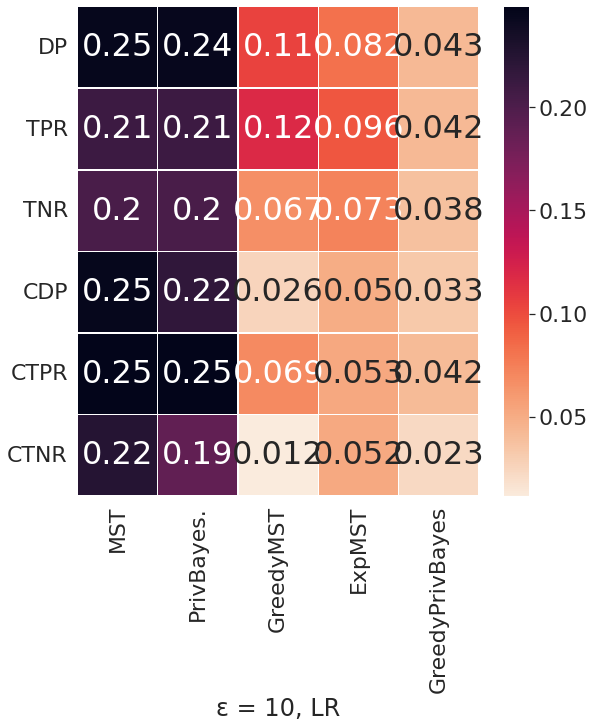

In [105]:
measures = ["DP", "TPR", "TNR", "CDP",
              "CTPR", "CTNR"]
mechanisms = ["MST", "PrivBayes.", "GreedyMST",
           "ExpMST", "GreedyPrivBayes"]

values = np.array([[np.median(mst_demographic_parity_10LR), np.median(privbayes_demographic_parity_10LR), np.median(fair_greedy_mst_demographic_parity_10LR), np.median(fair_opt_mst_demographic_parity_10LR), np.median(fair_privbayes_demographic_parity_10LR) ],
                   [np.median(mst_TPRBalance_10LR), np.median(privbayes_TPRBalance_10LR), np.median(fair_greedy_mst_TPRBalance_10LR), np.median(fair_opt_mst_TPRBalance_10LR), np.median(fair_privbayes_TPRBalance_10LR) ],
                    [np.median(mst_TNRBalance_10LR), np.median(privbayes_TNRBalance_10LR), np.median(fair_greedy_mst_TNRBalance_10LR), np.median(fair_opt_mst_TNRBalance_10LR), np.median(fair_privbayes_TNRBalance_10LR) ],
                    [np.median(mst_conditional_demographic_parity_10LR), np.median(privbayes_conditional_demographic_parity_10LR), np.median(fair_greedy_mst_conditional_demographic_parity_10LR), np.median(fair_opt_mst_conditional_demographic_parity_10LR), np.median(fair_privbayes_conditional_demographic_parity_10LR) ],
                   [np.median(mst_conditional_TPRBalance_10LR), np.median(privbayes_conditional_TPRBalance_10LR), np.median(fair_greedy_mst_conditional_TPRBalance_10LR), np.median(fair_opt_mst_conditional_TPRBalance_10LR), np.median(fair_privbayes_conditional_TPRBalance_10LR) ],
                    [np.median(mst_conditional_TNRBalance_10LR), np.median(privbayes_conditional_TNRBalance_10LR), np.median(fair_greedy_mst_conditional_TNRBalance_10LR), np.median(fair_opt_mst_conditional_TNRBalance_10LR), np.median(fair_privbayes_conditional_TNRBalance_10LR) ]])


plt.figure(figsize=(9, 9))
ax = sns.heatmap(values,annot=True, linewidth=0.5, cmap = sns.cm.rocket_r)
ax.set_xlabel("ε = 10, LR")
#ax.set_xticks(range(len(mechanisms)))
ax.set_xticklabels(mechanisms,rotation = 90)
#ax.set_yticks(range(len(measures)))
ax.set_yticklabels(measures,rotation = 0)
plt.savefig(artifactspath + 'LR10median.pdf', bbox_inches='tight')
plt.show()





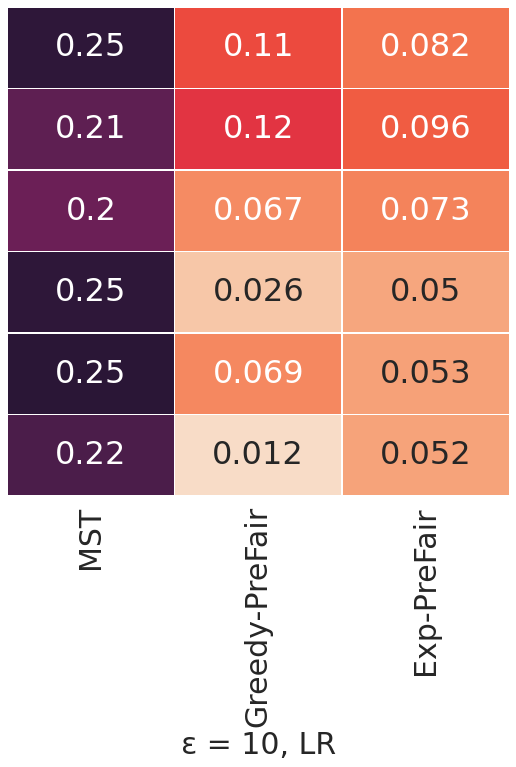

In [146]:
measures = ["DP", "TPR", "TNR", "CDP",
              "CTPR", "CTNR"]
mechanisms = ["MST",  "Greedy-PreFair",
           "Exp-PreFair"]

values = np.array([[np.median(mst_demographic_parity_10LR),np.median(fair_greedy_mst_demographic_parity_10LR), np.median(fair_opt_mst_demographic_parity_10LR) ],
                   [np.median(mst_TPRBalance_10LR), np.median(fair_greedy_mst_TPRBalance_10LR), np.median(fair_opt_mst_TPRBalance_10LR)],
                    [np.median(mst_TNRBalance_10LR), np.median(fair_greedy_mst_TNRBalance_10LR), np.median(fair_opt_mst_TNRBalance_10LR) ],
                    [np.median(mst_conditional_demographic_parity_10LR),  np.median(fair_greedy_mst_conditional_demographic_parity_10LR), np.median(fair_opt_mst_conditional_demographic_parity_10LR) ],
                   [np.median(mst_conditional_TPRBalance_10LR),  np.median(fair_greedy_mst_conditional_TPRBalance_10LR), np.median(fair_opt_mst_conditional_TPRBalance_10LR)],
                    [np.median(mst_conditional_TNRBalance_10LR), np.median(fair_greedy_mst_conditional_TNRBalance_10LR), np.median(fair_opt_mst_conditional_TNRBalance_10LR) ]])


plt.figure(figsize=(9, 9))
palette = sns.color_palette("Blues_d",n_colors=15)
palette.reverse()
ax = sns.heatmap(values,annot=True, linewidth=0.5, cmap = sns.cm.rocket_r,vmin=0, vmax=0.28,cbar=False,yticklabels =False)
ax.set_xlabel("ε = 10, LR",fontsize=30)
#ax.set_xticks(range(len(mechanisms)))
ax.set_xticklabels(mechanisms,rotation = 90,fontsize=30)
#ax.set_yticks(range(len(measures)))
#ax.set_yticklabels(measures,rotation = 0,fontsize=30)
plt.savefig(artifactspath + 'LR10medianMST.pdf', bbox_inches='tight')
plt.show()





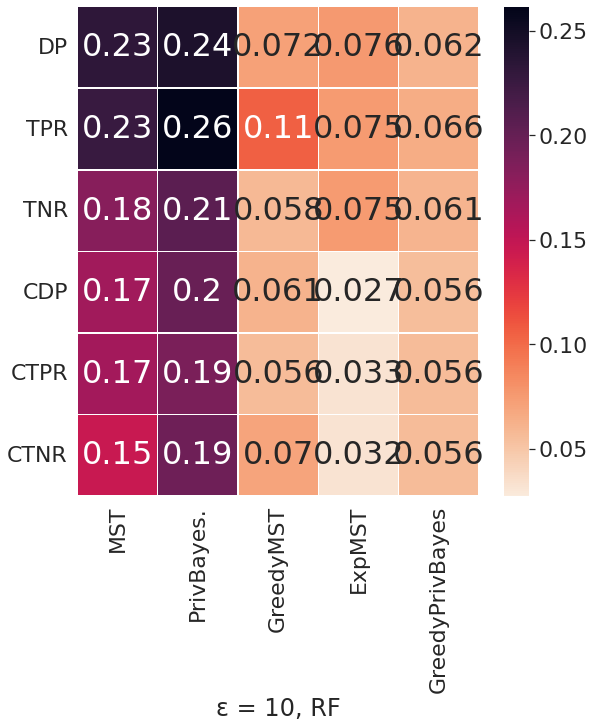

In [107]:
measures = ["DP", "TPR", "TNR", "CDP",
              "CTPR", "CTNR"]
mechanisms = ["MST", "PrivBayes.", "GreedyMST",
           "ExpMST", "GreedyPrivBayes"]

values = np.array([[np.mean(mst_demographic_parity_10RF), np.mean(privbayes_demographic_parity_10RF), np.mean(fair_greedy_mst_demographic_parity_10RF), np.mean(fair_opt_mst_demographic_parity_10RF), np.mean(fair_privbayes_demographic_parity_10RF) ],
                   [np.mean(mst_TPRBalance_10RF), np.mean(privbayes_TPRBalance_10RF), np.mean(fair_greedy_mst_TPRBalance_10RF), np.mean(fair_opt_mst_TPRBalance_10RF), np.mean(fair_privbayes_TPRBalance_10RF) ],
                    [np.mean(mst_TNRBalance_10RF), np.mean(privbayes_TNRBalance_10RF), np.mean(fair_greedy_mst_TNRBalance_10RF), np.mean(fair_opt_mst_TNRBalance_10RF), np.mean(fair_privbayes_TNRBalance_10RF) ],
                    [np.mean(mst_conditional_demographic_parity_10RF), np.mean(privbayes_conditional_demographic_parity_10RF), np.mean(fair_greedy_mst_conditional_demographic_parity_10RF), np.mean(fair_opt_mst_conditional_demographic_parity_10RF), np.mean(fair_privbayes_conditional_demographic_parity_10RF) ],
                   [np.mean(mst_conditional_TPRBalance_10RF), np.mean(privbayes_conditional_TPRBalance_10RF), np.mean(fair_greedy_mst_conditional_TPRBalance_10RF), np.mean(fair_opt_mst_conditional_TPRBalance_10RF), np.mean(fair_privbayes_conditional_TPRBalance_10RF) ],
                    [np.mean(mst_conditional_TNRBalance_10RF), np.mean(privbayes_conditional_TNRBalance_10RF), np.mean(fair_greedy_mst_conditional_TNRBalance_10RF), np.mean(fair_opt_mst_conditional_TNRBalance_10RF), np.mean(fair_privbayes_conditional_TNRBalance_10RF) ]])


plt.figure(figsize=(9, 9))
ax = sns.heatmap(values,annot=True, linewidth=0.5, cmap = sns.cm.rocket_r)
#ax.set_xticks(range(len(mechanisms)))
ax.set_xticklabels(mechanisms,rotation = 90)
ax.set_xlabel("ε = 10, RF")
#ax.set_yticks(range(len(measures)))
ax.set_yticklabels(measures,rotation = 0)
plt.savefig(artifactspath + 'RF10.pdf', bbox_inches='tight')
plt.show()





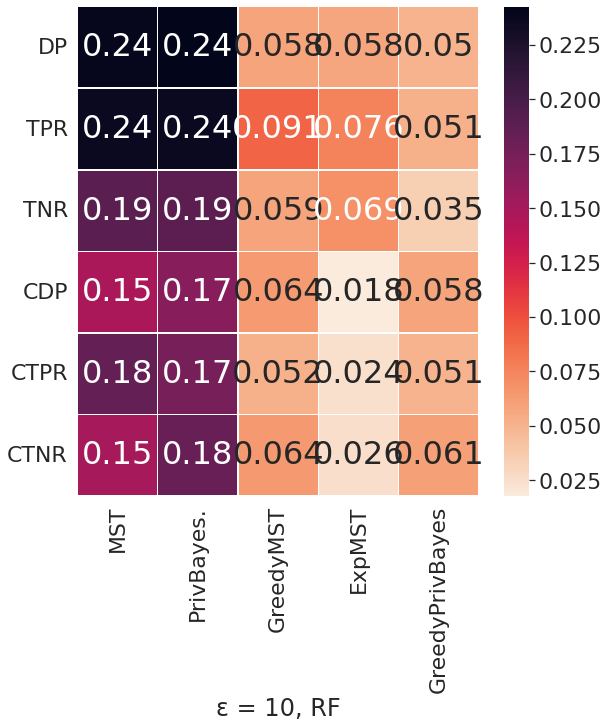

In [108]:
measures = ["DP", "TPR", "TNR", "CDP",
              "CTPR", "CTNR"]
mechanisms = ["MST", "PrivBayes.", "GreedyMST",
           "ExpMST", "GreedyPrivBayes"]

values = np.array([[np.median(mst_demographic_parity_10RF), np.median(privbayes_demographic_parity_10RF), np.median(fair_greedy_mst_demographic_parity_10RF), np.median(fair_opt_mst_demographic_parity_10RF), np.median(fair_privbayes_demographic_parity_10RF) ],
                   [np.median(mst_TPRBalance_10RF), np.median(privbayes_TPRBalance_10RF), np.median(fair_greedy_mst_TPRBalance_10RF), np.median(fair_opt_mst_TPRBalance_10RF), np.median(fair_privbayes_TPRBalance_10RF) ],
                    [np.median(mst_TNRBalance_10RF), np.median(privbayes_TNRBalance_10RF), np.median(fair_greedy_mst_TNRBalance_10RF), np.median(fair_opt_mst_TNRBalance_10RF), np.median(fair_privbayes_TNRBalance_10RF) ],
                    [np.median(mst_conditional_demographic_parity_10RF), np.median(privbayes_conditional_demographic_parity_10RF), np.median(fair_greedy_mst_conditional_demographic_parity_10RF), np.median(fair_opt_mst_conditional_demographic_parity_10RF), np.median(fair_privbayes_conditional_demographic_parity_10RF) ],
                   [np.median(mst_conditional_TPRBalance_10RF), np.median(privbayes_conditional_TPRBalance_10RF), np.median(fair_greedy_mst_conditional_TPRBalance_10RF), np.median(fair_opt_mst_conditional_TPRBalance_10RF), np.median(fair_privbayes_conditional_TPRBalance_10RF) ],
                    [np.median(mst_conditional_TNRBalance_10RF), np.median(privbayes_conditional_TNRBalance_10RF), np.median(fair_greedy_mst_conditional_TNRBalance_10RF), np.median(fair_opt_mst_conditional_TNRBalance_10RF), np.median(fair_privbayes_conditional_TNRBalance_10RF) ]])


plt.figure(figsize=(9, 9))
ax = sns.heatmap(values,annot=True, linewidth=0.5, cmap = sns.cm.rocket_r)
#ax.set_xticks(range(len(mechanisms)))
ax.set_xticklabels(mechanisms,rotation = 90)
ax.set_xlabel("ε = 10, RF")
#ax.set_yticks(range(len(measures)))
ax.set_yticklabels(measures,rotation = 0)
plt.savefig(artifactspath + 'RF10median.pdf', bbox_inches='tight')
plt.show()





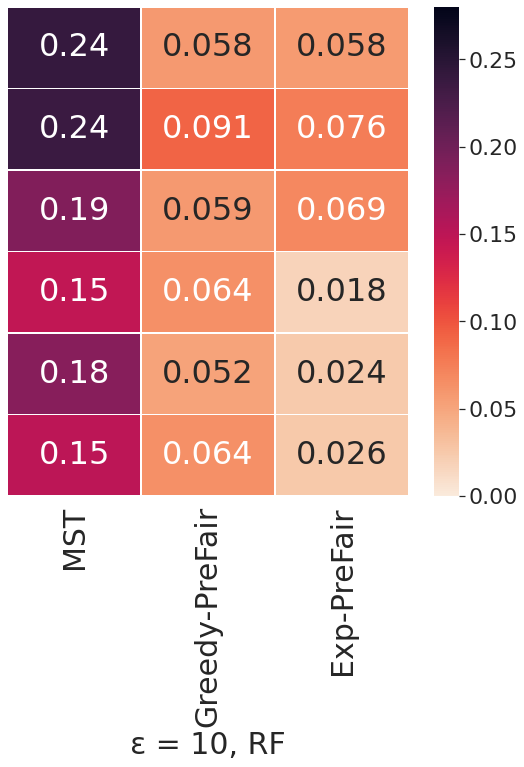

In [147]:
measures = ["DP", "TPR", "TNR", "CDP",
              "CTPR", "CTNR"]
mechanisms = ["MST",  "Greedy-PreFair",
           "Exp-PreFair"]
values = np.array([[np.median(mst_demographic_parity_10RF),np.median(fair_greedy_mst_demographic_parity_10RF), np.median(fair_opt_mst_demographic_parity_10RF) ],
                   [np.median(mst_TPRBalance_10RF), np.median(fair_greedy_mst_TPRBalance_10RF), np.median(fair_opt_mst_TPRBalance_10RF)],
                    [np.median(mst_TNRBalance_10RF), np.median(fair_greedy_mst_TNRBalance_10RF), np.median(fair_opt_mst_TNRBalance_10RF) ],
                    [np.median(mst_conditional_demographic_parity_10RF),  np.median(fair_greedy_mst_conditional_demographic_parity_10RF), np.median(fair_opt_mst_conditional_demographic_parity_10RF) ],
                   [np.median(mst_conditional_TPRBalance_10RF),  np.median(fair_greedy_mst_conditional_TPRBalance_10RF), np.median(fair_opt_mst_conditional_TPRBalance_10RF)],
                    [np.median(mst_conditional_TNRBalance_10RF), np.median(fair_greedy_mst_conditional_TNRBalance_10RF), np.median(fair_opt_mst_conditional_TNRBalance_10RF) ]])


plt.figure(figsize=(9, 9))
palette = sns.color_palette("Blues_d",n_colors=15)
palette.reverse()
ax = sns.heatmap(values,annot=True, linewidth=0.5, cmap = sns.cm.rocket_r,vmin=0, vmax=0.28,yticklabels =False)
ax.set_xlabel("ε = 10, RF",fontsize=30)
#ax.set_xticks(range(len(mechanisms)))
ax.set_xticklabels(mechanisms,rotation = 90,fontsize=30)
#ax.set_yticks(range(len(measures)))
#ax.set_yticklabels(measures,rotation = 0,fontsize=30)
plt.savefig(artifactspath + 'RF10medianMST.pdf', bbox_inches='tight')
plt.show()





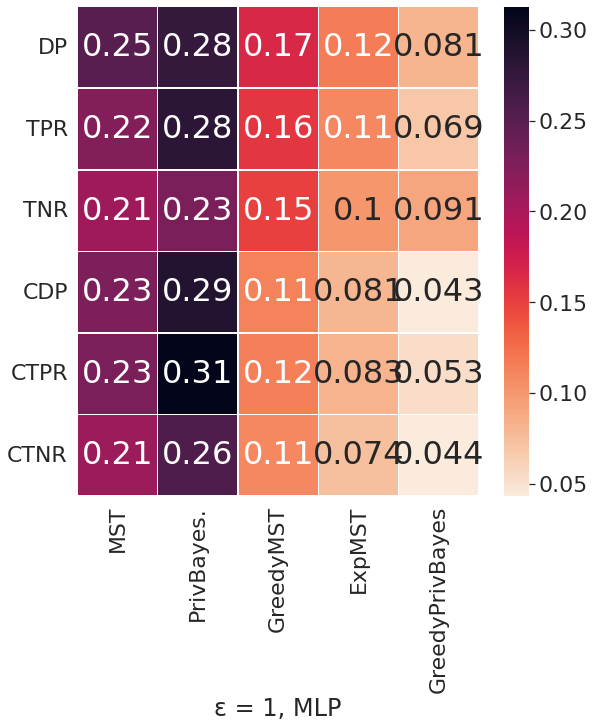

In [110]:
measures = ["DP", "TPR", "TNR", "CDP",
              "CTPR", "CTNR"]
mechanisms = ["MST", "PrivBayes.", "GreedyMST",
           "ExpMST", "GreedyPrivBayes"]

values = np.array([[np.mean(mst_demographic_parity_1), np.mean(privbayes_demographic_parity_1), np.mean(fair_greedy_mst_demographic_parity_1), np.mean(fair_opt_mst_demographic_parity_1), np.mean(fair_privbayes_demographic_parity_1) ],
                   [np.mean(mst_TPRBalance_1), np.mean(privbayes_TPRBalance_1), np.mean(fair_greedy_mst_TPRBalance_1), np.mean(fair_opt_mst_TPRBalance_1), np.mean(fair_privbayes_TPRBalance_1) ],
                    [np.mean(mst_TNRBalance_1), np.mean(privbayes_TNRBalance_1), np.mean(fair_greedy_mst_TNRBalance_1), np.mean(fair_opt_mst_TNRBalance_1), np.mean(fair_privbayes_TNRBalance_1) ],
                    [np.mean(mst_conditional_demographic_parity_1), np.mean(privbayes_conditional_demographic_parity_1), np.mean(fair_greedy_mst_conditional_demographic_parity_1), np.mean(fair_opt_mst_conditional_demographic_parity_1), np.mean(fair_privbayes_conditional_demographic_parity_1) ],
                   [np.mean(mst_conditional_TPRBalance_1), np.mean(privbayes_conditional_TPRBalance_1), np.mean(fair_greedy_mst_conditional_TPRBalance_1), np.mean(fair_opt_mst_conditional_TPRBalance_1), np.mean(fair_privbayes_conditional_TPRBalance_1) ],
                    [np.mean(mst_conditional_TNRBalance_1), np.mean(privbayes_conditional_TNRBalance_1), np.mean(fair_greedy_mst_conditional_TNRBalance_1), np.mean(fair_opt_mst_conditional_TNRBalance_1), np.mean(fair_privbayes_conditional_TNRBalance_1) ]])


plt.figure(figsize=(9, 9))
palette = sns.color_palette("Blues_d",n_colors=15)
palette.reverse()
ax = sns.heatmap(values,annot=True, linewidth=0.5, cmap = sns.cm.rocket_r)
ax.set_xlabel("ε = 1, MLP")
#ax.set_xticks(range(len(mechanisms)))
ax.set_xticklabels(mechanisms,rotation = 90)
#ax.set_yticks(range(len(measures)))
ax.set_yticklabels(measures,rotation = 0)
plt.savefig(artifactspath + 'MLP1.pdf', bbox_inches='tight')
plt.show()





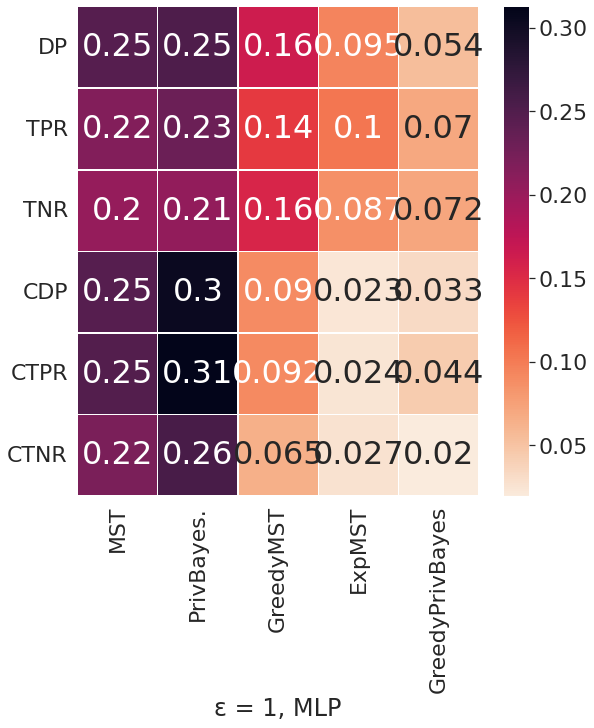

In [111]:
measures = ["DP", "TPR", "TNR", "CDP",
              "CTPR", "CTNR"]
mechanisms = ["MST", "PrivBayes.", "GreedyMST",
           "ExpMST", "GreedyPrivBayes"]

values = np.array([[np.median(mst_demographic_parity_1), np.median(privbayes_demographic_parity_1), np.median(fair_greedy_mst_demographic_parity_1), np.median(fair_opt_mst_demographic_parity_1), np.median(fair_privbayes_demographic_parity_1) ],
                   [np.median(mst_TPRBalance_1), np.median(privbayes_TPRBalance_1), np.median(fair_greedy_mst_TPRBalance_1), np.median(fair_opt_mst_TPRBalance_1), np.median(fair_privbayes_TPRBalance_1) ],
                    [np.median(mst_TNRBalance_1), np.median(privbayes_TNRBalance_1), np.median(fair_greedy_mst_TNRBalance_1), np.median(fair_opt_mst_TNRBalance_1), np.median(fair_privbayes_TNRBalance_1) ],
                    [np.median(mst_conditional_demographic_parity_1), np.median(privbayes_conditional_demographic_parity_1), np.median(fair_greedy_mst_conditional_demographic_parity_1), np.median(fair_opt_mst_conditional_demographic_parity_1), np.median(fair_privbayes_conditional_demographic_parity_1) ],
                   [np.median(mst_conditional_TPRBalance_1), np.median(privbayes_conditional_TPRBalance_1), np.median(fair_greedy_mst_conditional_TPRBalance_1), np.median(fair_opt_mst_conditional_TPRBalance_1), np.median(fair_privbayes_conditional_TPRBalance_1) ],
                    [np.median(mst_conditional_TNRBalance_1), np.median(privbayes_conditional_TNRBalance_1), np.median(fair_greedy_mst_conditional_TNRBalance_1), np.median(fair_opt_mst_conditional_TNRBalance_1), np.median(fair_privbayes_conditional_TNRBalance_1) ]])


plt.figure(figsize=(9, 9))
palette = sns.color_palette("Blues_d",n_colors=15)
palette.reverse()
ax = sns.heatmap(values,annot=True, linewidth=0.5, cmap = sns.cm.rocket_r)
ax.set_xlabel("ε = 1, MLP")
#ax.set_xticks(range(len(mechanisms)))
ax.set_xticklabels(mechanisms,rotation = 90)
#ax.set_yticks(range(len(measures)))
ax.set_yticklabels(measures,rotation = 0)
plt.savefig(artifactspath + 'MLP1median.pdf', bbox_inches='tight')
plt.show()





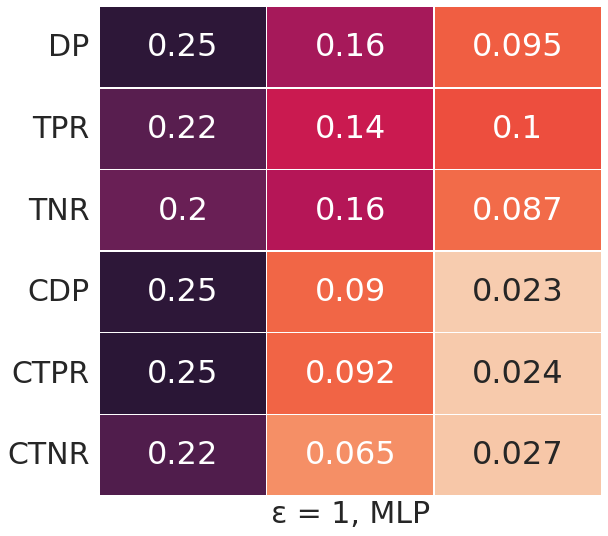

In [112]:
measures = ["DP", "TPR", "TNR", "CDP",
              "CTPR", "CTNR"]
mechanisms = ["MST",  "Greedy-PreFair",
           "Exp-Opt-PreFair"]

values = np.array([[np.median(mst_demographic_parity_1),np.median(fair_greedy_mst_demographic_parity_1), np.median(fair_opt_mst_demographic_parity_1) ],
                   [np.median(mst_TPRBalance_1), np.median(fair_greedy_mst_TPRBalance_1), np.median(fair_opt_mst_TPRBalance_1)],
                    [np.median(mst_TNRBalance_1), np.median(fair_greedy_mst_TNRBalance_1), np.median(fair_opt_mst_TNRBalance_1) ],
                    [np.median(mst_conditional_demographic_parity_1),  np.median(fair_greedy_mst_conditional_demographic_parity_1), np.median(fair_opt_mst_conditional_demographic_parity_1) ],
                   [np.median(mst_conditional_TPRBalance_1),  np.median(fair_greedy_mst_conditional_TPRBalance_1), np.median(fair_opt_mst_conditional_TPRBalance_1)],
                    [np.median(mst_conditional_TNRBalance_1), np.median(fair_greedy_mst_conditional_TNRBalance_1), np.median(fair_opt_mst_conditional_TNRBalance_1) ]])


plt.figure(figsize=(9, 9))
palette = sns.color_palette("Blues_d",n_colors=15)
palette.reverse()
ax = sns.heatmap(values,annot=True, linewidth=0.5, cmap = sns.cm.rocket_r,vmin=0, vmax=0.28,cbar=False ,xticklabels =False)
ax.set_xlabel("ε = 1, MLP",fontsize=30)
#ax.set_xticks(range(len(mechanisms)))
#ax.set_xticklabels(mechanisms,rotation = 90,fontsize=30)
#ax.set_yticks(range(len(measures)))
ax.set_yticklabels(measures,rotation = 0,fontsize=30)
plt.savefig(artifactspath + 'MLP1medianMST.pdf', bbox_inches='tight')
plt.show()





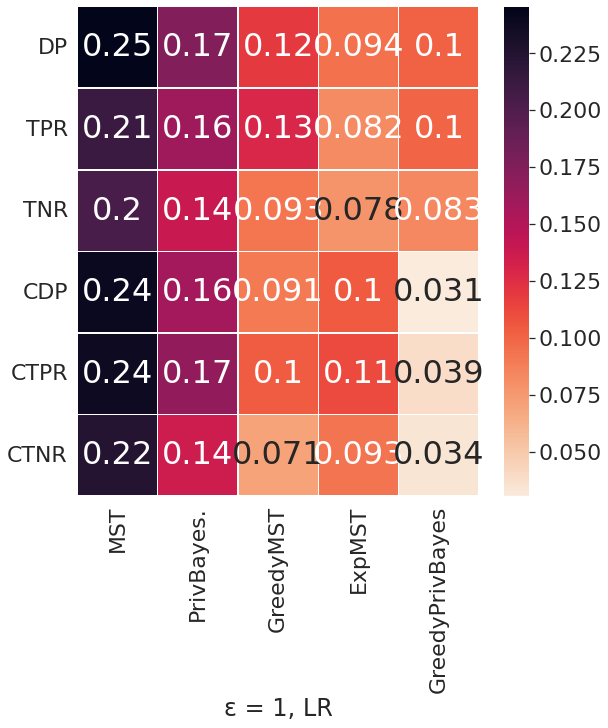

In [113]:
measures = ["DP", "TPR", "TNR", "CDP",
              "CTPR", "CTNR"]
mechanisms = ["MST", "PrivBayes.", "GreedyMST",
           "ExpMST", "GreedyPrivBayes"]

values = np.array([[np.mean(mst_demographic_parity_1LR), np.mean(privbayes_demographic_parity_1LR), np.mean(fair_greedy_mst_demographic_parity_1LR), np.mean(fair_opt_mst_demographic_parity_1LR), np.mean(fair_privbayes_demographic_parity_1LR) ],
                   [np.mean(mst_TPRBalance_1LR), np.mean(privbayes_TPRBalance_1LR), np.mean(fair_greedy_mst_TPRBalance_1LR), np.mean(fair_opt_mst_TPRBalance_1LR), np.mean(fair_privbayes_TPRBalance_1LR) ],
                    [np.mean(mst_TNRBalance_1LR), np.mean(privbayes_TNRBalance_1LR), np.mean(fair_greedy_mst_TNRBalance_1LR), np.mean(fair_opt_mst_TNRBalance_1LR), np.mean(fair_privbayes_TNRBalance_1LR) ],
                    [np.mean(mst_conditional_demographic_parity_1LR), np.mean(privbayes_conditional_demographic_parity_1LR), np.mean(fair_greedy_mst_conditional_demographic_parity_1LR), np.mean(fair_opt_mst_conditional_demographic_parity_1LR), np.mean(fair_privbayes_conditional_demographic_parity_1LR) ],
                   [np.mean(mst_conditional_TPRBalance_1LR), np.mean(privbayes_conditional_TPRBalance_1LR), np.mean(fair_greedy_mst_conditional_TPRBalance_1LR), np.mean(fair_opt_mst_conditional_TPRBalance_1LR), np.mean(fair_privbayes_conditional_TPRBalance_1LR) ],
                    [np.mean(mst_conditional_TNRBalance_1LR), np.mean(privbayes_conditional_TNRBalance_1LR), np.mean(fair_greedy_mst_conditional_TNRBalance_1LR), np.mean(fair_opt_mst_conditional_TNRBalance_1LR), np.mean(fair_privbayes_conditional_TNRBalance_1LR) ]])


plt.figure(figsize=(9, 9))
ax = sns.heatmap(values,annot=True, linewidth=0.5, cmap = sns.cm.rocket_r)
ax.set_xlabel("ε = 1, LR")
#ax.set_xticks(range(len(mechanisms)))
ax.set_xticklabels(mechanisms,rotation = 90)
#ax.set_yticks(range(len(measures)))
ax.set_yticklabels(measures,rotation = 0)
plt.savefig(artifactspath + 'LR1.pdf', bbox_inches='tight')
plt.show()





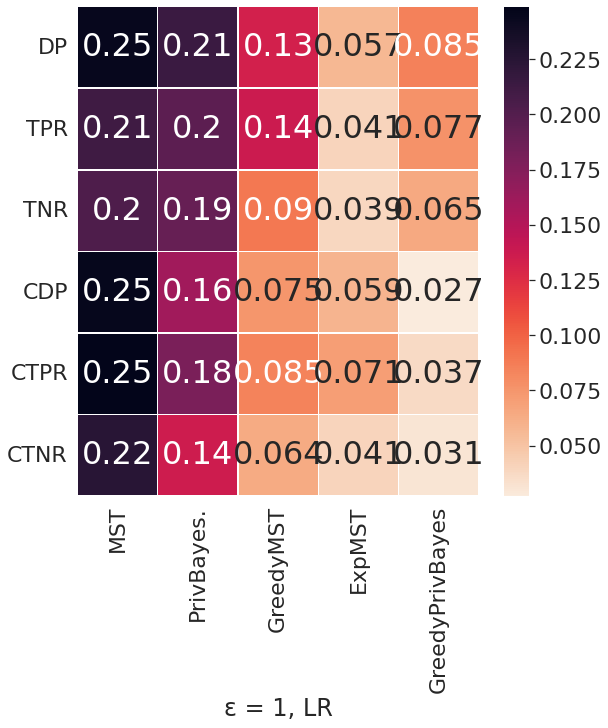

In [114]:
measures = ["DP", "TPR", "TNR", "CDP",
              "CTPR", "CTNR"]
mechanisms = ["MST", "PrivBayes.", "GreedyMST",
           "ExpMST", "GreedyPrivBayes"]

values = np.array([[np.median(mst_demographic_parity_1LR), np.median(privbayes_demographic_parity_1LR), np.median(fair_greedy_mst_demographic_parity_1LR), np.median(fair_opt_mst_demographic_parity_1LR), np.median(fair_privbayes_demographic_parity_1LR) ],
                   [np.median(mst_TPRBalance_1LR), np.median(privbayes_TPRBalance_1LR), np.median(fair_greedy_mst_TPRBalance_1LR), np.median(fair_opt_mst_TPRBalance_1LR), np.median(fair_privbayes_TPRBalance_1LR) ],
                    [np.median(mst_TNRBalance_1LR), np.median(privbayes_TNRBalance_1LR), np.median(fair_greedy_mst_TNRBalance_1LR), np.median(fair_opt_mst_TNRBalance_1LR), np.median(fair_privbayes_TNRBalance_1LR) ],
                    [np.median(mst_conditional_demographic_parity_1LR), np.median(privbayes_conditional_demographic_parity_1LR), np.median(fair_greedy_mst_conditional_demographic_parity_1LR), np.median(fair_opt_mst_conditional_demographic_parity_1LR), np.median(fair_privbayes_conditional_demographic_parity_1LR) ],
                   [np.median(mst_conditional_TPRBalance_1LR), np.median(privbayes_conditional_TPRBalance_1LR), np.median(fair_greedy_mst_conditional_TPRBalance_1LR), np.median(fair_opt_mst_conditional_TPRBalance_1LR), np.median(fair_privbayes_conditional_TPRBalance_1LR) ],
                    [np.median(mst_conditional_TNRBalance_1LR), np.median(privbayes_conditional_TNRBalance_1LR), np.median(fair_greedy_mst_conditional_TNRBalance_1LR), np.median(fair_opt_mst_conditional_TNRBalance_1LR), np.median(fair_privbayes_conditional_TNRBalance_1LR) ]])


plt.figure(figsize=(9, 9))
ax = sns.heatmap(values,annot=True, linewidth=0.5, cmap = sns.cm.rocket_r)
ax.set_xlabel("ε = 1, LR")
#ax.set_xticks(range(len(mechanisms)))
ax.set_xticklabels(mechanisms,rotation = 90)
#ax.set_yticks(range(len(measures)))
ax.set_yticklabels(measures,rotation = 0)
plt.savefig(artifactspath + 'LR1median.pdf', bbox_inches='tight')
plt.show()





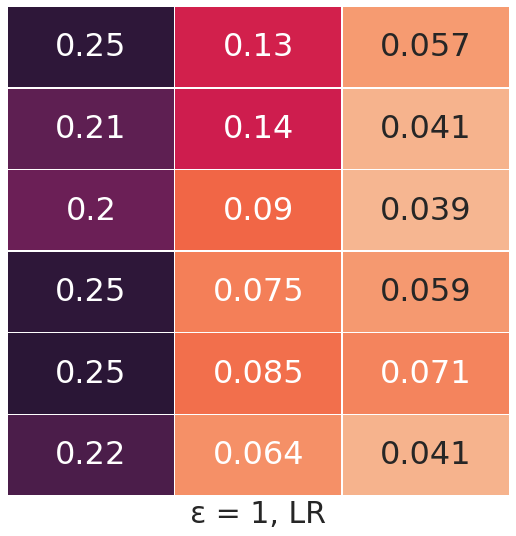

In [115]:
measures = ["DP", "TPR", "TNR", "CDP",
              "CTPR", "CTNR"]
mechanisms = ["MST",  "Greedy-PreFair",
           "Exp-Opt-PreFair"]

values = np.array([[np.median(mst_demographic_parity_1LR),np.median(fair_greedy_mst_demographic_parity_1LR), np.median(fair_opt_mst_demographic_parity_1LR) ],
                   [np.median(mst_TPRBalance_1LR), np.median(fair_greedy_mst_TPRBalance_1LR), np.median(fair_opt_mst_TPRBalance_1LR)],
                    [np.median(mst_TNRBalance_1LR), np.median(fair_greedy_mst_TNRBalance_1LR), np.median(fair_opt_mst_TNRBalance_1LR) ],
                    [np.median(mst_conditional_demographic_parity_1LR),  np.median(fair_greedy_mst_conditional_demographic_parity_1LR), np.median(fair_opt_mst_conditional_demographic_parity_1LR) ],
                   [np.median(mst_conditional_TPRBalance_1LR),  np.median(fair_greedy_mst_conditional_TPRBalance_1LR), np.median(fair_opt_mst_conditional_TPRBalance_1LR)],
                    [np.median(mst_conditional_TNRBalance_1LR), np.median(fair_greedy_mst_conditional_TNRBalance_1LR), np.median(fair_opt_mst_conditional_TNRBalance_1LR) ]])


plt.figure(figsize=(9, 9))
palette = sns.color_palette("Blues_d",n_colors=15)
palette.reverse()
ax = sns.heatmap(values,annot=True, linewidth=0.5, cmap = sns.cm.rocket_r,vmin=0, vmax=0.28,cbar=False ,xticklabels =False,yticklabels =False)
ax.set_xlabel("ε = 1, LR",fontsize=30)
#ax.set_xticks(range(len(mechanisms)))
#ax.set_xticklabels(mechanisms,rotation = 90,fontsize=30)
#ax.set_yticks(range(len(measures)))
#ax.set_yticklabels(measures,rotation = 0,fontsize=30)
plt.savefig(artifactspath + 'LR1medianMST.pdf', bbox_inches='tight')
plt.show()





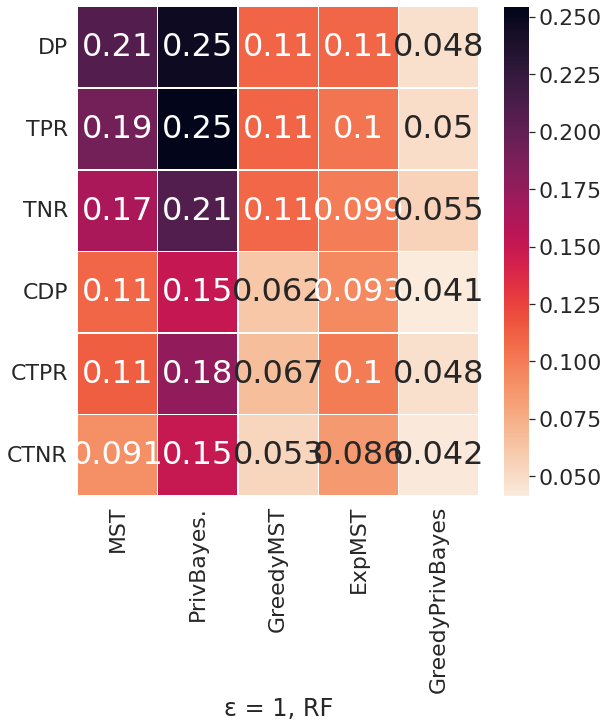

In [116]:
measures = ["DP", "TPR", "TNR", "CDP",
              "CTPR", "CTNR"]
mechanisms = ["MST", "PrivBayes.", "GreedyMST",
           "ExpMST", "GreedyPrivBayes"]

values = np.array([[np.mean(mst_demographic_parity_1RF), np.mean(privbayes_demographic_parity_1RF), np.mean(fair_greedy_mst_demographic_parity_1RF), np.mean(fair_opt_mst_demographic_parity_1RF), np.mean(fair_privbayes_demographic_parity_1RF) ],
                   [np.mean(mst_TPRBalance_1RF), np.mean(privbayes_TPRBalance_1RF), np.mean(fair_greedy_mst_TPRBalance_1RF), np.mean(fair_opt_mst_TPRBalance_1RF), np.mean(fair_privbayes_TPRBalance_1RF) ],
                    [np.mean(mst_TNRBalance_1RF), np.mean(privbayes_TNRBalance_1RF), np.mean(fair_greedy_mst_TNRBalance_1RF), np.mean(fair_opt_mst_TNRBalance_1RF), np.mean(fair_privbayes_TNRBalance_1RF) ],
                    [np.mean(mst_conditional_demographic_parity_1RF), np.mean(privbayes_conditional_demographic_parity_1RF), np.mean(fair_greedy_mst_conditional_demographic_parity_1RF), np.mean(fair_opt_mst_conditional_demographic_parity_1RF), np.mean(fair_privbayes_conditional_demographic_parity_1RF) ],
                   [np.mean(mst_conditional_TPRBalance_1RF), np.mean(privbayes_conditional_TPRBalance_1RF), np.mean(fair_greedy_mst_conditional_TPRBalance_1RF), np.mean(fair_opt_mst_conditional_TPRBalance_1RF), np.mean(fair_privbayes_conditional_TPRBalance_1RF) ],
                    [np.mean(mst_conditional_TNRBalance_1RF), np.mean(privbayes_conditional_TNRBalance_1RF), np.mean(fair_greedy_mst_conditional_TNRBalance_1RF), np.mean(fair_opt_mst_conditional_TNRBalance_1RF), np.mean(fair_privbayes_conditional_TNRBalance_1RF) ]])


plt.figure(figsize=(9, 9))
ax = sns.heatmap(values,annot=True, linewidth=0.5, cmap = sns.cm.rocket_r)
#ax.set_xticks(range(len(mechanisms)))
ax.set_xticklabels(mechanisms,rotation = 90)
ax.set_xlabel("ε = 1, RF")
#ax.set_yticks(range(len(measures)))
ax.set_yticklabels(measures,rotation = 0)
plt.savefig(artifactspath + 'RF1.pdf', bbox_inches='tight')
plt.show()





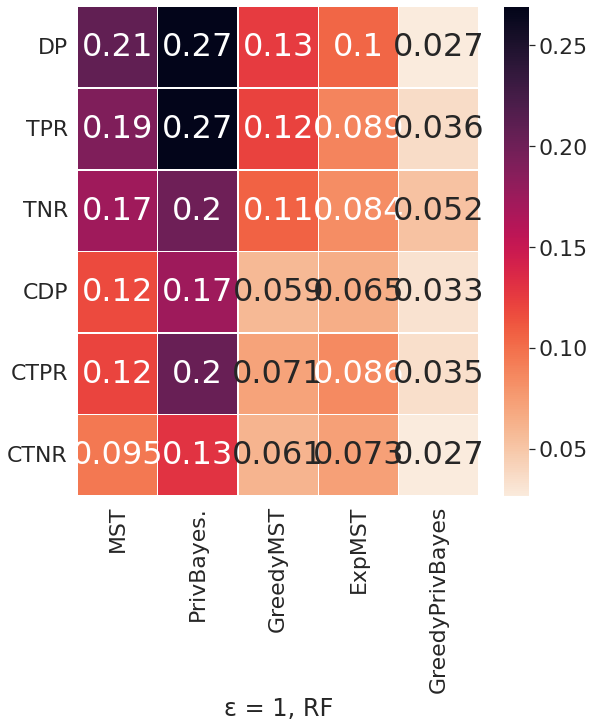

In [117]:
measures = ["DP", "TPR", "TNR", "CDP",
              "CTPR", "CTNR"]
mechanisms = ["MST", "PrivBayes.", "GreedyMST",
           "ExpMST", "GreedyPrivBayes"]

values = np.array([[np.median(mst_demographic_parity_1RF), np.median(privbayes_demographic_parity_1RF), np.median(fair_greedy_mst_demographic_parity_1RF), np.median(fair_opt_mst_demographic_parity_1RF), np.median(fair_privbayes_demographic_parity_1RF) ],
                   [np.median(mst_TPRBalance_1RF), np.median(privbayes_TPRBalance_1RF), np.median(fair_greedy_mst_TPRBalance_1RF), np.median(fair_opt_mst_TPRBalance_1RF), np.median(fair_privbayes_TPRBalance_1RF) ],
                    [np.median(mst_TNRBalance_1RF), np.median(privbayes_TNRBalance_1RF), np.median(fair_greedy_mst_TNRBalance_1RF), np.median(fair_opt_mst_TNRBalance_1RF), np.median(fair_privbayes_TNRBalance_1RF) ],
                    [np.median(mst_conditional_demographic_parity_1RF), np.median(privbayes_conditional_demographic_parity_1RF), np.median(fair_greedy_mst_conditional_demographic_parity_1RF), np.median(fair_opt_mst_conditional_demographic_parity_1RF), np.median(fair_privbayes_conditional_demographic_parity_1RF) ],
                   [np.median(mst_conditional_TPRBalance_1RF), np.median(privbayes_conditional_TPRBalance_1RF), np.median(fair_greedy_mst_conditional_TPRBalance_1RF), np.median(fair_opt_mst_conditional_TPRBalance_1RF), np.median(fair_privbayes_conditional_TPRBalance_1RF) ],
                    [np.median(mst_conditional_TNRBalance_1RF), np.median(privbayes_conditional_TNRBalance_1RF), np.median(fair_greedy_mst_conditional_TNRBalance_1RF), np.median(fair_opt_mst_conditional_TNRBalance_1RF), np.median(fair_privbayes_conditional_TNRBalance_1RF) ]])


plt.figure(figsize=(9, 9))
ax = sns.heatmap(values,annot=True, linewidth=0.5, cmap = sns.cm.rocket_r)
#ax.set_xticks(range(len(mechanisms)))
ax.set_xticklabels(mechanisms,rotation = 90)
ax.set_xlabel("ε = 1, RF")
#ax.set_yticks(range(len(measures)))
ax.set_yticklabels(measures,rotation = 0)
plt.savefig(artifactspath + 'RF1median.pdf', bbox_inches='tight')
plt.show()





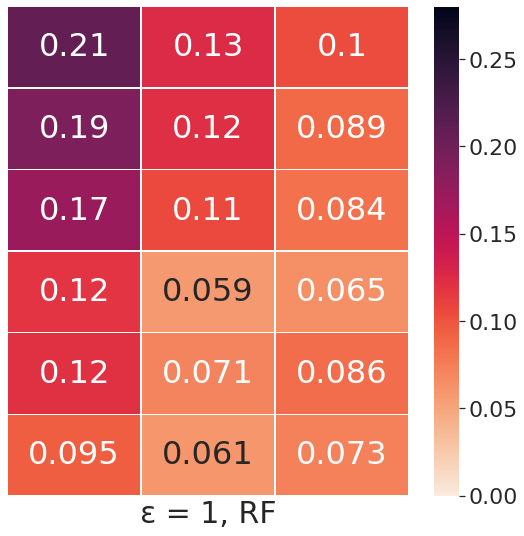

In [118]:
measures = ["DP", "TPR", "TNR", "CDP",
              "CTPR", "CTNR"]
mechanisms = ["MST",  "Greedy-PreFair",
           "Exp-Opt-PreFair"]

values = np.array([[np.median(mst_demographic_parity_1RF),np.median(fair_greedy_mst_demographic_parity_1RF), np.median(fair_opt_mst_demographic_parity_1RF) ],
                   [np.median(mst_TPRBalance_1RF), np.median(fair_greedy_mst_TPRBalance_1RF), np.median(fair_opt_mst_TPRBalance_1RF)],
                    [np.median(mst_TNRBalance_1RF), np.median(fair_greedy_mst_TNRBalance_1RF), np.median(fair_opt_mst_TNRBalance_1RF) ],
                    [np.median(mst_conditional_demographic_parity_1RF),  np.median(fair_greedy_mst_conditional_demographic_parity_1RF), np.median(fair_opt_mst_conditional_demographic_parity_1RF) ],
                   [np.median(mst_conditional_TPRBalance_1RF),  np.median(fair_greedy_mst_conditional_TPRBalance_1RF), np.median(fair_opt_mst_conditional_TPRBalance_1RF)],
                    [np.median(mst_conditional_TNRBalance_1RF), np.median(fair_greedy_mst_conditional_TNRBalance_1RF), np.median(fair_opt_mst_conditional_TNRBalance_1RF) ]])


plt.figure(figsize=(9, 9))
palette = sns.color_palette("Blues_d",n_colors=15)
palette.reverse()
ax = sns.heatmap(values,annot=True, linewidth=0.5, cmap = sns.cm.rocket_r,vmin=0, vmax=0.28 ,xticklabels =False,yticklabels =False)
ax.set_xlabel("ε = 1, RF",fontsize=30)
#ax.set_xticks(range(len(mechanisms)))
#ax.set_xticklabels(mechanisms,rotation = 90,fontsize=30)
#ax.set_yticks(range(len(measures)))
#ax.set_yticklabels(measures,rotation = 0,fontsize=30)
plt.savefig(artifactspath + 'RF1medianMST.pdf', bbox_inches='tight')
plt.show()





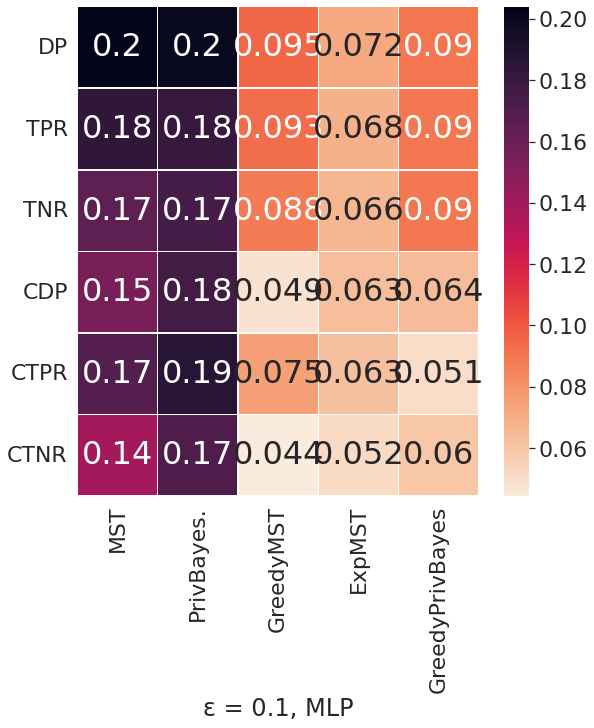

In [119]:
measures = ["DP", "TPR", "TNR", "CDP",
              "CTPR", "CTNR"]
mechanisms = ["MST", "PrivBayes.", "GreedyMST",
           "ExpMST", "GreedyPrivBayes"]

values = np.array([[np.mean(mst_demographic_parity_01), np.mean(privbayes_demographic_parity_01), np.mean(fair_greedy_mst_demographic_parity_01), np.mean(fair_opt_mst_demographic_parity_01), np.mean(fair_privbayes_demographic_parity_01) ],
                   [np.mean(mst_TPRBalance_01), np.mean(privbayes_TPRBalance_01), np.mean(fair_greedy_mst_TPRBalance_01), np.mean(fair_opt_mst_TPRBalance_01), np.mean(fair_privbayes_TPRBalance_01) ],
                    [np.mean(mst_TNRBalance_01), np.mean(privbayes_TNRBalance_01), np.mean(fair_greedy_mst_TNRBalance_01), np.mean(fair_opt_mst_TNRBalance_01), np.mean(fair_privbayes_TNRBalance_01) ],
                    [np.mean(mst_conditional_demographic_parity_01), np.mean(privbayes_conditional_demographic_parity_01), np.mean(fair_greedy_mst_conditional_demographic_parity_01), np.mean(fair_opt_mst_conditional_demographic_parity_01), np.mean(fair_privbayes_conditional_demographic_parity_01) ],
                   [np.mean(mst_conditional_TPRBalance_01), np.mean(privbayes_conditional_TPRBalance_01), np.mean(fair_greedy_mst_conditional_TPRBalance_01), np.mean(fair_opt_mst_conditional_TPRBalance_01), np.mean(fair_privbayes_conditional_TPRBalance_01) ],
                    [np.mean(mst_conditional_TNRBalance_01), np.mean(privbayes_conditional_TNRBalance_01), np.mean(fair_greedy_mst_conditional_TNRBalance_01), np.mean(fair_opt_mst_conditional_TNRBalance_01), np.mean(fair_privbayes_conditional_TNRBalance_01) ]])


plt.figure(figsize=(9, 9))
palette = sns.color_palette("Blues_d",n_colors=15)
palette.reverse()
ax = sns.heatmap(values,annot=True, linewidth=0.5, cmap = sns.cm.rocket_r)
ax.set_xlabel("ε = 0.1, MLP")
#ax.set_xticks(range(len(mechanisms)))
ax.set_xticklabels(mechanisms,rotation = 90)
#ax.set_yticks(range(len(measures)))
ax.set_yticklabels(measures,rotation = 0)
plt.savefig(artifactspath + 'MLP01.pdf', bbox_inches='tight')
plt.show()





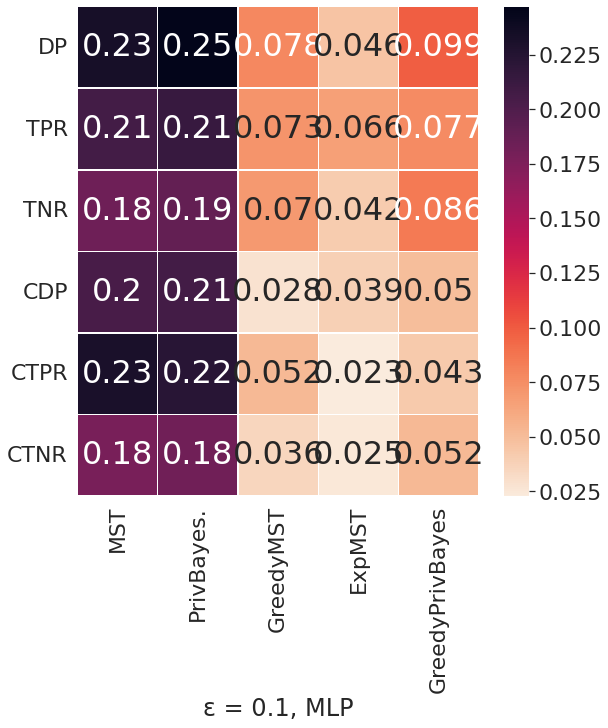

In [120]:
measures = ["DP", "TPR", "TNR", "CDP",
              "CTPR", "CTNR"]
mechanisms = ["MST", "PrivBayes.", "GreedyMST",
           "ExpMST", "GreedyPrivBayes"]

values = np.array([[np.median(mst_demographic_parity_01), np.median(privbayes_demographic_parity_01), np.median(fair_greedy_mst_demographic_parity_01), np.median(fair_opt_mst_demographic_parity_01), np.median(fair_privbayes_demographic_parity_01) ],
                   [np.median(mst_TPRBalance_01), np.median(privbayes_TPRBalance_01), np.median(fair_greedy_mst_TPRBalance_01), np.median(fair_opt_mst_TPRBalance_01), np.median(fair_privbayes_TPRBalance_01) ],
                    [np.median(mst_TNRBalance_01), np.median(privbayes_TNRBalance_01), np.median(fair_greedy_mst_TNRBalance_01), np.median(fair_opt_mst_TNRBalance_01), np.median(fair_privbayes_TNRBalance_01) ],
                    [np.median(mst_conditional_demographic_parity_01), np.median(privbayes_conditional_demographic_parity_01), np.median(fair_greedy_mst_conditional_demographic_parity_01), np.median(fair_opt_mst_conditional_demographic_parity_01), np.median(fair_privbayes_conditional_demographic_parity_01) ],
                   [np.median(mst_conditional_TPRBalance_01), np.median(privbayes_conditional_TPRBalance_01), np.median(fair_greedy_mst_conditional_TPRBalance_01), np.median(fair_opt_mst_conditional_TPRBalance_01), np.median(fair_privbayes_conditional_TPRBalance_01) ],
                    [np.median(mst_conditional_TNRBalance_01), np.median(privbayes_conditional_TNRBalance_01), np.median(fair_greedy_mst_conditional_TNRBalance_01), np.median(fair_opt_mst_conditional_TNRBalance_01), np.median(fair_privbayes_conditional_TNRBalance_01) ]])


plt.figure(figsize=(9, 9))
palette = sns.color_palette("Blues_d",n_colors=15)
palette.reverse()
ax = sns.heatmap(values,annot=True, linewidth=0.5, cmap = sns.cm.rocket_r)
ax.set_xlabel("ε = 0.1, MLP")
#ax.set_xticks(range(len(mechanisms)))
ax.set_xticklabels(mechanisms,rotation = 90)
#ax.set_yticks(range(len(measures)))
ax.set_yticklabels(measures,rotation = 0)
plt.savefig(artifactspath + 'MLP01median.pdf', bbox_inches='tight')
plt.show()





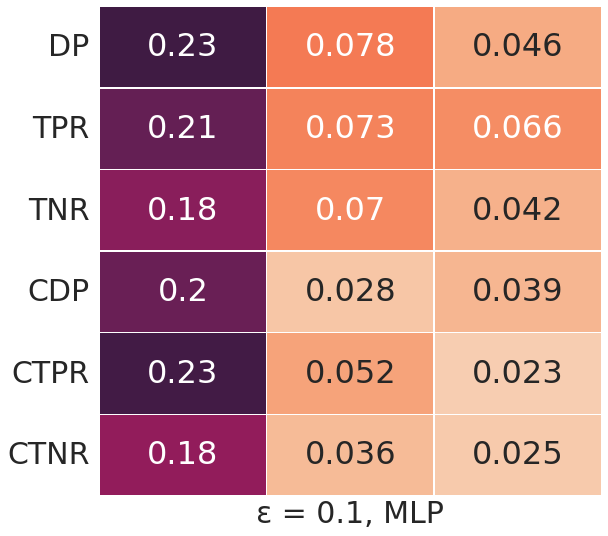

In [121]:
measures = ["DP", "TPR", "TNR", "CDP",
              "CTPR", "CTNR"]
mechanisms = ["MST",  "Greedy-PreFair",
           "Exp-Opt-PreFair"]

values = np.array([[np.median(mst_demographic_parity_01),np.median(fair_greedy_mst_demographic_parity_01), np.median(fair_opt_mst_demographic_parity_01) ],
                   [np.median(mst_TPRBalance_01), np.median(fair_greedy_mst_TPRBalance_01), np.median(fair_opt_mst_TPRBalance_01)],
                    [np.median(mst_TNRBalance_01), np.median(fair_greedy_mst_TNRBalance_01), np.median(fair_opt_mst_TNRBalance_01) ],
                    [np.median(mst_conditional_demographic_parity_01),  np.median(fair_greedy_mst_conditional_demographic_parity_01), np.median(fair_opt_mst_conditional_demographic_parity_01) ],
                   [np.median(mst_conditional_TPRBalance_01),  np.median(fair_greedy_mst_conditional_TPRBalance_01), np.median(fair_opt_mst_conditional_TPRBalance_01)],
                    [np.median(mst_conditional_TNRBalance_01), np.median(fair_greedy_mst_conditional_TNRBalance_01), np.median(fair_opt_mst_conditional_TNRBalance_01) ]])


plt.figure(figsize=(9, 9))
palette = sns.color_palette("Blues_d",n_colors=15)
palette.reverse()
ax = sns.heatmap(values,annot=True, linewidth=0.5, cmap = sns.cm.rocket_r,vmin=0, vmax=0.28,cbar=False ,xticklabels =False)
ax.set_xlabel("ε = 0.1, MLP",fontsize=30)
#ax.set_xticks(range(len(mechanisms)))
#ax.set_xticklabels(mechanisms,rotation = 90,fontsize=30)
#ax.set_yticks(range(len(measures)))
ax.set_yticklabels(measures,rotation = 0,fontsize=30)
plt.savefig(artifactspath + 'MLP01medianMST.pdf', bbox_inches='tight')
plt.show()





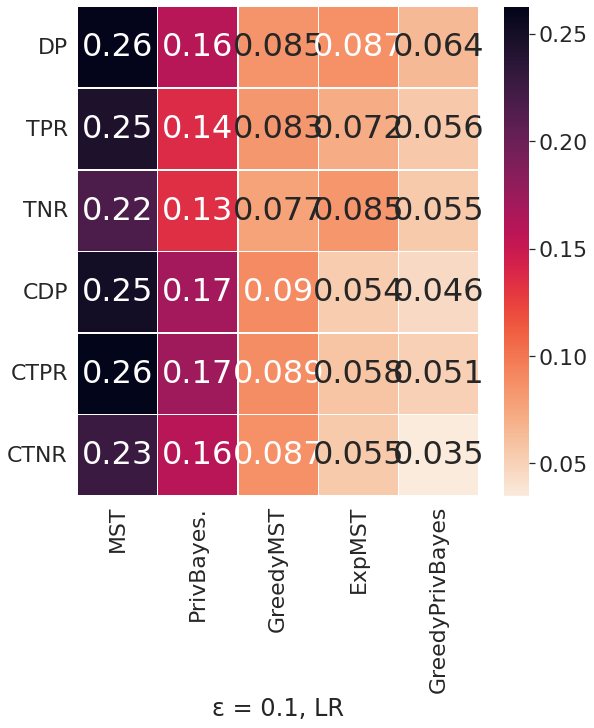

In [122]:
measures = ["DP", "TPR", "TNR", "CDP",
              "CTPR", "CTNR"]
mechanisms = ["MST", "PrivBayes.", "GreedyMST",
           "ExpMST", "GreedyPrivBayes"]

values = np.array([[np.mean(mst_demographic_parity_01LR), np.mean(privbayes_demographic_parity_01LR), np.mean(fair_greedy_mst_demographic_parity_01LR), np.mean(fair_opt_mst_demographic_parity_01LR), np.mean(fair_privbayes_demographic_parity_01LR) ],
                   [np.mean(mst_TPRBalance_01LR), np.mean(privbayes_TPRBalance_01LR), np.mean(fair_greedy_mst_TPRBalance_01LR), np.mean(fair_opt_mst_TPRBalance_01LR), np.mean(fair_privbayes_TPRBalance_01LR) ],
                    [np.mean(mst_TNRBalance_01LR), np.mean(privbayes_TNRBalance_01LR), np.mean(fair_greedy_mst_TNRBalance_01LR), np.mean(fair_opt_mst_TNRBalance_01LR), np.mean(fair_privbayes_TNRBalance_01LR) ],
                    [np.mean(mst_conditional_demographic_parity_01LR), np.mean(privbayes_conditional_demographic_parity_01LR), np.mean(fair_greedy_mst_conditional_demographic_parity_01LR), np.mean(fair_opt_mst_conditional_demographic_parity_01LR), np.mean(fair_privbayes_conditional_demographic_parity_01LR) ],
                   [np.mean(mst_conditional_TPRBalance_01LR), np.mean(privbayes_conditional_TPRBalance_01LR), np.mean(fair_greedy_mst_conditional_TPRBalance_01LR), np.mean(fair_opt_mst_conditional_TPRBalance_01LR), np.mean(fair_privbayes_conditional_TPRBalance_01LR) ],
                    [np.mean(mst_conditional_TNRBalance_01LR), np.mean(privbayes_conditional_TNRBalance_01LR), np.mean(fair_greedy_mst_conditional_TNRBalance_01LR), np.mean(fair_opt_mst_conditional_TNRBalance_01LR), np.mean(fair_privbayes_conditional_TNRBalance_01LR) ]])


plt.figure(figsize=(9, 9))
ax = sns.heatmap(values,annot=True, linewidth=0.5, cmap = sns.cm.rocket_r)
ax.set_xlabel("ε = 0.1, LR")
#ax.set_xticks(range(len(mechanisms)))
ax.set_xticklabels(mechanisms,rotation = 90)
#ax.set_yticks(range(len(measures)))
ax.set_yticklabels(measures,rotation = 0)
plt.savefig(artifactspath + 'LR01.pdf', bbox_inches='tight')
plt.show()





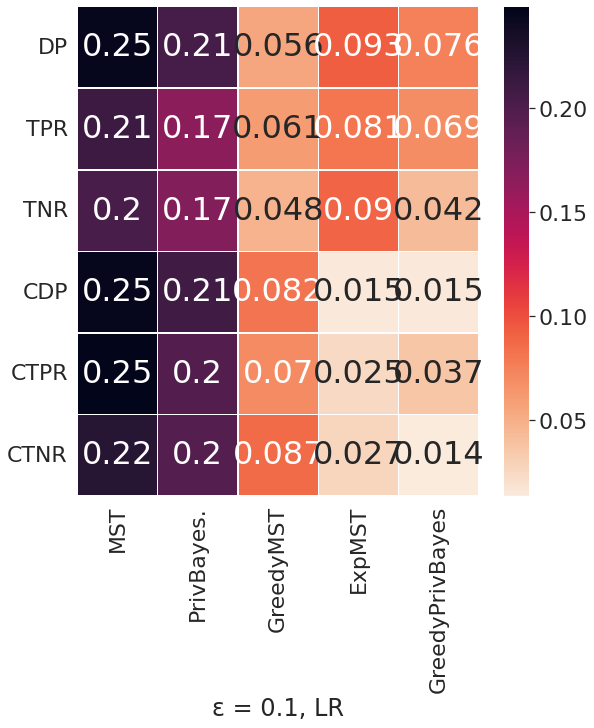

In [123]:
measures = ["DP", "TPR", "TNR", "CDP",
              "CTPR", "CTNR"]
mechanisms = ["MST", "PrivBayes.", "GreedyMST",
           "ExpMST", "GreedyPrivBayes"]

values = np.array([[np.median(mst_demographic_parity_01LR), np.median(privbayes_demographic_parity_01LR), np.median(fair_greedy_mst_demographic_parity_01LR), np.median(fair_opt_mst_demographic_parity_01LR), np.median(fair_privbayes_demographic_parity_01LR) ],
                   [np.median(mst_TPRBalance_01LR), np.median(privbayes_TPRBalance_01LR), np.median(fair_greedy_mst_TPRBalance_01LR), np.median(fair_opt_mst_TPRBalance_01LR), np.median(fair_privbayes_TPRBalance_01LR) ],
                    [np.median(mst_TNRBalance_01LR), np.median(privbayes_TNRBalance_01LR), np.median(fair_greedy_mst_TNRBalance_01LR), np.median(fair_opt_mst_TNRBalance_01LR), np.median(fair_privbayes_TNRBalance_01LR) ],
                    [np.median(mst_conditional_demographic_parity_01LR), np.median(privbayes_conditional_demographic_parity_01LR), np.median(fair_greedy_mst_conditional_demographic_parity_01LR), np.median(fair_opt_mst_conditional_demographic_parity_01LR), np.median(fair_privbayes_conditional_demographic_parity_01LR) ],
                   [np.median(mst_conditional_TPRBalance_01LR), np.median(privbayes_conditional_TPRBalance_01LR), np.median(fair_greedy_mst_conditional_TPRBalance_01LR), np.median(fair_opt_mst_conditional_TPRBalance_01LR), np.median(fair_privbayes_conditional_TPRBalance_01LR) ],
                    [np.median(mst_conditional_TNRBalance_01LR), np.median(privbayes_conditional_TNRBalance_01LR), np.median(fair_greedy_mst_conditional_TNRBalance_01LR), np.median(fair_opt_mst_conditional_TNRBalance_01LR), np.median(fair_privbayes_conditional_TNRBalance_01LR) ]])


plt.figure(figsize=(9, 9))
ax = sns.heatmap(values,annot=True, linewidth=0.5, cmap = sns.cm.rocket_r)
ax.set_xlabel("ε = 0.1, LR")
#ax.set_xticks(range(len(mechanisms)))
ax.set_xticklabels(mechanisms,rotation = 90)
#ax.set_yticks(range(len(measures)))
ax.set_yticklabels(measures,rotation = 0)
plt.savefig(artifactspath + 'LR01median.pdf', bbox_inches='tight')
plt.show()





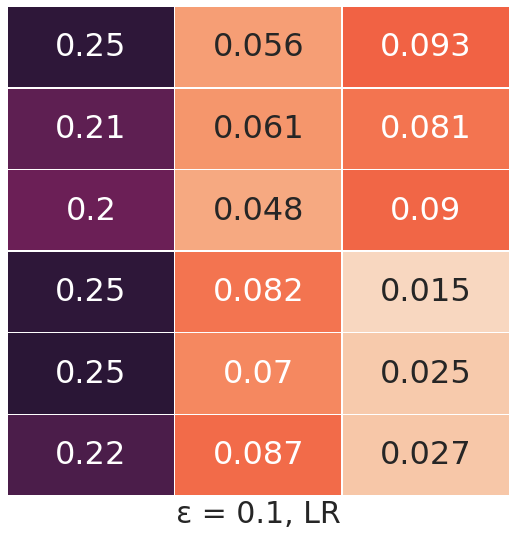

In [124]:
measures = ["DP", "TPR", "TNR", "CDP",
              "CTPR", "CTNR"]
mechanisms = ["MST",  "Greedy-PreFair",
           "Exp-Opt-PreFair"]

values = np.array([[np.median(mst_demographic_parity_01LR),np.median(fair_greedy_mst_demographic_parity_01LR), np.median(fair_opt_mst_demographic_parity_01LR) ],
                   [np.median(mst_TPRBalance_01LR), np.median(fair_greedy_mst_TPRBalance_01LR), np.median(fair_opt_mst_TPRBalance_01LR)],
                    [np.median(mst_TNRBalance_01LR), np.median(fair_greedy_mst_TNRBalance_01LR), np.median(fair_opt_mst_TNRBalance_01LR) ],
                    [np.median(mst_conditional_demographic_parity_01LR),  np.median(fair_greedy_mst_conditional_demographic_parity_01LR), np.median(fair_opt_mst_conditional_demographic_parity_01LR) ],
                   [np.median(mst_conditional_TPRBalance_01LR),  np.median(fair_greedy_mst_conditional_TPRBalance_01LR), np.median(fair_opt_mst_conditional_TPRBalance_01LR)],
                    [np.median(mst_conditional_TNRBalance_01LR), np.median(fair_greedy_mst_conditional_TNRBalance_01LR), np.median(fair_opt_mst_conditional_TNRBalance_01LR) ]])


plt.figure(figsize=(9, 9))
palette = sns.color_palette("Blues_d",n_colors=15)
palette.reverse()
ax = sns.heatmap(values,annot=True, linewidth=0.5, cmap = sns.cm.rocket_r,vmin=0, vmax=0.28,cbar=False ,xticklabels =False,yticklabels =False)
ax.set_xlabel("ε = 0.1, LR",fontsize=30)
#ax.set_xticks(range(len(mechanisms)))
#ax.set_xticklabels(mechanisms,rotation = 90,fontsize=30)
#ax.set_yticks(range(len(measures)))
#ax.set_yticklabels(measures,rotation = 0,fontsize=30)
plt.savefig(artifactspath + 'LR01medianMST.pdf', bbox_inches='tight')
plt.show()





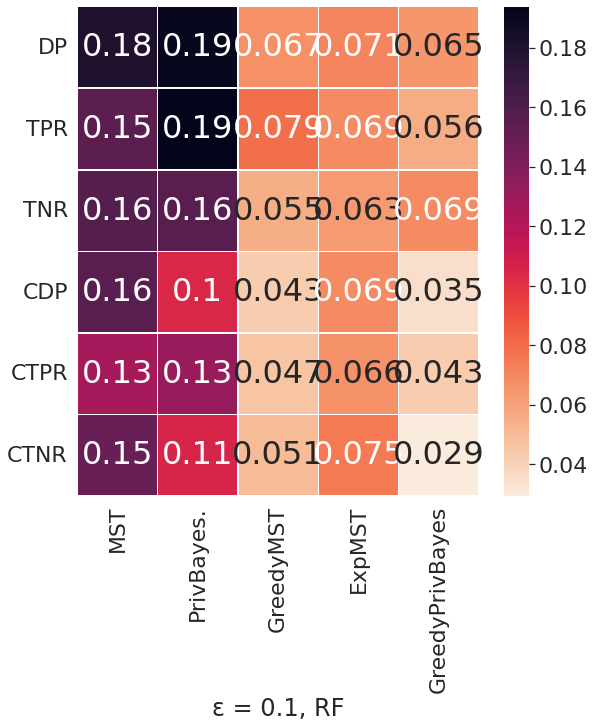

In [125]:
measures = ["DP", "TPR", "TNR", "CDP",
              "CTPR", "CTNR"]
mechanisms = ["MST", "PrivBayes.", "GreedyMST",
           "ExpMST", "GreedyPrivBayes"]

values = np.array([[np.mean(mst_demographic_parity_01RF), np.mean(privbayes_demographic_parity_01RF), np.mean(fair_greedy_mst_demographic_parity_01RF), np.mean(fair_opt_mst_demographic_parity_01RF), np.mean(fair_privbayes_demographic_parity_01RF) ],
                   [np.mean(mst_TPRBalance_01RF), np.mean(privbayes_TPRBalance_01RF), np.mean(fair_greedy_mst_TPRBalance_01RF), np.mean(fair_opt_mst_TPRBalance_01RF), np.mean(fair_privbayes_TPRBalance_01RF) ],
                    [np.mean(mst_TNRBalance_01RF), np.mean(privbayes_TNRBalance_01RF), np.mean(fair_greedy_mst_TNRBalance_01RF), np.mean(fair_opt_mst_TNRBalance_01RF), np.mean(fair_privbayes_TNRBalance_01RF) ],
                    [np.mean(mst_conditional_demographic_parity_01RF), np.mean(privbayes_conditional_demographic_parity_01RF), np.mean(fair_greedy_mst_conditional_demographic_parity_01RF), np.mean(fair_opt_mst_conditional_demographic_parity_01RF), np.mean(fair_privbayes_conditional_demographic_parity_01RF) ],
                   [np.mean(mst_conditional_TPRBalance_01RF), np.mean(privbayes_conditional_TPRBalance_01RF), np.mean(fair_greedy_mst_conditional_TPRBalance_01RF), np.mean(fair_opt_mst_conditional_TPRBalance_01RF), np.mean(fair_privbayes_conditional_TPRBalance_01RF) ],
                    [np.mean(mst_conditional_TNRBalance_01RF), np.mean(privbayes_conditional_TNRBalance_01RF), np.mean(fair_greedy_mst_conditional_TNRBalance_01RF), np.mean(fair_opt_mst_conditional_TNRBalance_01RF), np.mean(fair_privbayes_conditional_TNRBalance_01RF) ]])


plt.figure(figsize=(9, 9))
ax = sns.heatmap(values,annot=True, linewidth=0.5, cmap = sns.cm.rocket_r)
#ax.set_xticks(range(len(mechanisms)))
ax.set_xticklabels(mechanisms,rotation = 90)
ax.set_xlabel("ε = 0.1, RF")
#ax.set_yticks(range(len(measures)))
ax.set_yticklabels(measures,rotation = 0)
plt.savefig(artifactspath + 'RF01.pdf', bbox_inches='tight')
plt.show()





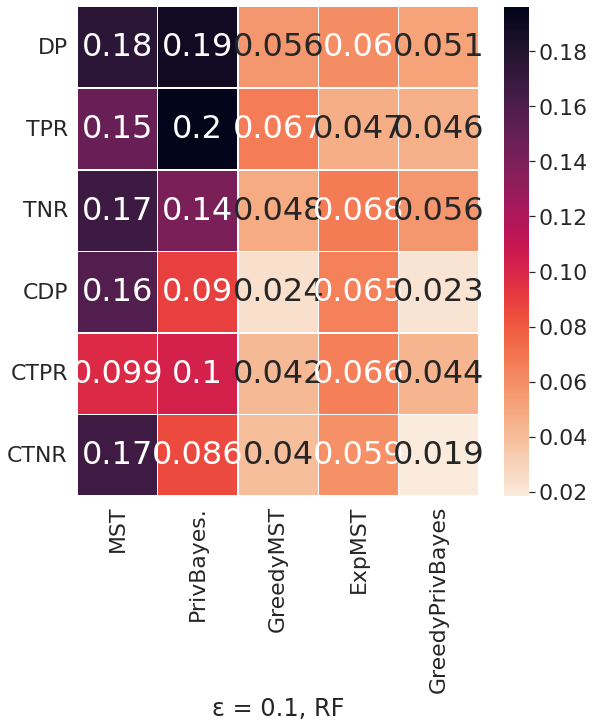

In [126]:
measures = ["DP", "TPR", "TNR", "CDP",
              "CTPR", "CTNR"]
mechanisms = ["MST", "PrivBayes.", "GreedyMST",
           "ExpMST", "GreedyPrivBayes"]

values = np.array([[np.median(mst_demographic_parity_01RF), np.median(privbayes_demographic_parity_01RF), np.median(fair_greedy_mst_demographic_parity_01RF), np.median(fair_opt_mst_demographic_parity_01RF), np.median(fair_privbayes_demographic_parity_01RF) ],
                   [np.median(mst_TPRBalance_01RF), np.median(privbayes_TPRBalance_01RF), np.median(fair_greedy_mst_TPRBalance_01RF), np.median(fair_opt_mst_TPRBalance_01RF), np.median(fair_privbayes_TPRBalance_01RF) ],
                    [np.median(mst_TNRBalance_01RF), np.median(privbayes_TNRBalance_01RF), np.median(fair_greedy_mst_TNRBalance_01RF), np.median(fair_opt_mst_TNRBalance_01RF), np.median(fair_privbayes_TNRBalance_01RF) ],
                    [np.median(mst_conditional_demographic_parity_01RF), np.median(privbayes_conditional_demographic_parity_01RF), np.median(fair_greedy_mst_conditional_demographic_parity_01RF), np.median(fair_opt_mst_conditional_demographic_parity_01RF), np.median(fair_privbayes_conditional_demographic_parity_01RF) ],
                   [np.median(mst_conditional_TPRBalance_01RF), np.median(privbayes_conditional_TPRBalance_01RF), np.median(fair_greedy_mst_conditional_TPRBalance_01RF), np.median(fair_opt_mst_conditional_TPRBalance_01RF), np.median(fair_privbayes_conditional_TPRBalance_01RF) ],
                    [np.median(mst_conditional_TNRBalance_01RF), np.median(privbayes_conditional_TNRBalance_01RF), np.median(fair_greedy_mst_conditional_TNRBalance_01RF), np.median(fair_opt_mst_conditional_TNRBalance_01RF), np.median(fair_privbayes_conditional_TNRBalance_01RF) ]])


plt.figure(figsize=(9, 9))
ax = sns.heatmap(values,annot=True, linewidth=0.5, cmap = sns.cm.rocket_r)
#ax.set_xticks(range(len(mechanisms)))
ax.set_xticklabels(mechanisms,rotation = 90)
ax.set_xlabel("ε = 0.1, RF")
#ax.set_yticks(range(len(measures)))
ax.set_yticklabels(measures,rotation = 0)
plt.savefig(artifactspath + 'RF01median.pdf', bbox_inches='tight')
plt.show()





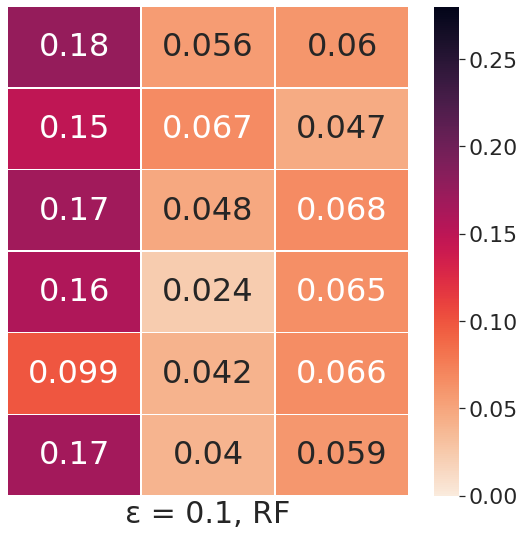

In [127]:
measures = ["DP", "TPR", "TNR", "CDP",
              "CTPR", "CTNR"]
mechanisms = ["MST",  "Greedy-PreFair",
           "Exp-Opt-PreFair"]

values = np.array([[np.median(mst_demographic_parity_01RF),np.median(fair_greedy_mst_demographic_parity_01RF), np.median(fair_opt_mst_demographic_parity_01RF) ],
                   [np.median(mst_TPRBalance_01RF), np.median(fair_greedy_mst_TPRBalance_01RF), np.median(fair_opt_mst_TPRBalance_01RF)],
                    [np.median(mst_TNRBalance_01RF), np.median(fair_greedy_mst_TNRBalance_01RF), np.median(fair_opt_mst_TNRBalance_01RF) ],
                    [np.median(mst_conditional_demographic_parity_01RF),  np.median(fair_greedy_mst_conditional_demographic_parity_01RF), np.median(fair_opt_mst_conditional_demographic_parity_01RF) ],
                   [np.median(mst_conditional_TPRBalance_01RF),  np.median(fair_greedy_mst_conditional_TPRBalance_01RF), np.median(fair_opt_mst_conditional_TPRBalance_01RF)],
                    [np.median(mst_conditional_TNRBalance_01RF), np.median(fair_greedy_mst_conditional_TNRBalance_01RF), np.median(fair_opt_mst_conditional_TNRBalance_01RF) ]])


plt.figure(figsize=(9, 9))
palette = sns.color_palette("Blues_d",n_colors=15)
palette.reverse()
ax = sns.heatmap(values,annot=True, linewidth=0.5, cmap = sns.cm.rocket_r,vmin=0, vmax=0.28,xticklabels =False,yticklabels =False)
ax.set_xlabel("ε = 0.1, RF",fontsize=30)
#ax.set_xticks(range(len(mechanisms)))
#ax.set_xticklabels(mechanisms,rotation = 90,fontsize=30)
#ax.set_yticks(range(len(measures)))
#ax.set_yticklabels(measures,rotation = 0,fontsize=30)
plt.savefig(artifactspath + 'RF01medianMST.pdf', bbox_inches='tight')
plt.show()



